# Аналитичеcкая часть отчета для команды маркетинга перед владельцами продукта

### Описание проекта
Языковая школа "Comet English" предоставляет платформу и инструментарий для всех, кто изучает иностранные языки. На данный момент языковая школа предоставляет курсы на 5 языках: английский, немецкий, французский, испанский и итальянский. В начале 2024 года школа запустила несколько новых для себя напрвлений привлечения, включая бесплатный промо-курс английского, а также платный интенсив. В этом направлении команда маркетинга привлекает новых пользователей как уже стандартными средствами (пробное занятие, доступ к платформе по модели freemium и т.д.), так и с фокусом на новые продукты (промо-курс и интенсив).

### Контекст проекта
По истечению полугода после внедерения промо-курса и интенсива владельцы школы, недовольные показателями, поставили вопрос о дальнейшей целесообразности вложений в маркетинг по направлениям промо-курса и интенсива. Команда маркетинга в свою очередь убеждена, что показатели привлечения достаточно высоки, а слабое привлечение связано со сменой целевой аудитории владельцами школы, а также со сменой креативных концепций в рекламе. Команда маркетинга, являясь заказчиком данного проекта, ставит своей целью убедить владельцев школы в продолжении привлечения по новым продуктам с последовательной марктеинговой стратегией.

### Цели и задачи проекта
Основной целью проекта является подготовка аналитических выводов и визуализаций для отчета команды маркетинга на основе данных рекламных объявлений в РК Яндекс Директа.
Для достижения цели требуется:
- загрузить предоставленные данные;
- предобработать данные;
- провести их исследовательский анализ;
- подготовить анализ показателей рекламных объявлений за отведенный срок;
- выявить факторы таргетинга, при которых рекламные объявления демонстрируют лучшие маркетинговые показатели;
- определить влияние смены целевых признаков аудитории на маркетинговые показатели;
- подготовить дашборд для заказчика;
- подготовить релевантные визуализации с выводами и рекомендациями.

### Описание данных
Для подготовки отчета команда маркетинга располагает данными по проведенным рекламным кампаниям, полученными из рекламного кабинета Яндекс Директ. Также в дополнение к основным данным отчета заказчик предоставил список решений бизнеса, принятых относительно маркетиновой стратегии по новым продуктам (например, изменение целевой аудитории), а также результаты ковнерсионных переходов в платный курс (интенсив). Данные представлены в виде 3 отдельных csv-файлов с следующими полями:
- **`english_course_marketing` — данные по рекламным объявлениям РК за несколько месяцев**:
    - `date` — дата рекламного объявления;
    - `compaign` — название рекламной кампании;
    - `compaign_id` — номер рекламной кампании;
    - `group` — таргет-группа;
    - `group_id` — номер таргет-группы;
    - `ad_id` — номер рекламного объявления;
    - `target` — настройка таргета;
    - `ad_platform` — рекламная площадка;
    - `os` — тип устрйоства (ОС);
    - `sex` — половая принадлежность целевой аудитории;
    - `age` — возрастная группа целевой аудитории;
    - `shows` — число показов рекламного объявления;
    - `clicks` — число кликов рекламного объявления;
    - `cost` — расход рекламного объявления.
<p> <br> </p>
                                                                
- **`english_course_events` — список изменений в признаках целевой аудитории по требованию владельцев продукта**:
    - `date` — дата изменения;
    - `event` — изменение в маркетинговой стратегии.
<p> <br> </p>
- **`english_cr` — показатели конверсии в интенсив**:
    - `date` — дата конверсии в интенсив;
    - `conversions` — число конверсионных переходов в продукт.

Поскольку данные привлечения у заказчика разрознены, а воронка не выстроена, показатели конверсионных переходов требуется только визуализировать в абсолютных значениях.

Заказчик также уточнил, что кампании в данных относятся к продвижению разных продуктов:

<p> <br> </p>

| **Промо-курс**                     | **Интенсив**             |
|:-----------------------------------|:-------------------------|
| eng2_search_promo_course           | eng1_paid                |
| eng4_network_promo_course          | eng2_paid                |
| eng8_network_promo_course          | eng3_network_4_newtext   |
| eng9_network_promo_english_newtext | eng1_search_paid         |
| eng10_network_english_2goals_0-24  | 8eng_network_course_paid |
| 14eng_search_promo_english_course  | eng11_network_bot        |
| 11eng_network_promo_english_course | 12eng_search_course_paid |
| eng6_network_free_english          |                          |
| eng7_network_eng                   |                          |
| eng5_search_free_eng               |                          |

## 1. Загрузка данных
На данном этапе мы загрузим необходимые библиотеки и модули, загрузим представленные данные в датафреймы, а также ознакомимся с располагаемыми данными.
  
  Начнем с загрузки библиотек и модулей, необходимых для анализа данных.

In [1]:
# импортируем необходимые библиотеки и модули
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime as dt
from datetime import timedelta
import missingno as msno

Поскольку у нас в распоряжении 3 csv-файла, загрузим их в отдельные датафреймы и ознакомимся с содержимым.

In [2]:
# загружаем csv-файлы в отдельные датафреймы
data = pd.read_csv('https://drive.google.com')
events = pd.read_csv('https://drive.google.com')
cr = pd.read_csv('https://drive.google.com')

In [3]:
# ознакомимся с данными
display(data.head())
display(events.head())
cr.head()

date   compaign  compaign_id      group    group_id        ad_id  \
0  2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965525   
1  2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965525   
2  2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965525   
3  2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965525   
4  2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965526   

          target ad_platform       os      sex    age  shows  clicks  cost  
0  autotargeting       поиск  Android  мужской  25-34      1       0   0.0  
1  autotargeting       поиск  Android  женский  18-24      1       0   0.0  
2  autotargeting       поиск      iOS  мужской  45-54      1       0   0.0  
3  autotargeting       поиск      iOS  женский  35-44      1       0   0.0  
4  autotargeting       поиск  Android  мужской  25-34      1       0   0.0

date                              event
0  2024-04-02          Сужение критериев ядра ЦА
1  2024-04-07               Тест новых креативов
2  2024-04-22               Тест новых креативов
3  2024-05-09             Изменение критериев ЦА
4  2024-05-24  Перераспределение трафика на сети

date  conversions
0  2024-03-01            6
1  2024-03-02            2
2  2024-03-03            3
3  2024-03-04            0
4  2024-03-05            1

Как мы видим, данные соответствуют описанию. Рассмотрим структуру датафреймов детальнее.

In [4]:
# выведем информационную сводку по датафреймам
display(data.info())
display(events.info())
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102580 entries, 0 to 102579
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         102580 non-null  object 
 1   compaign     102580 non-null  object 
 2   compaign_id  102580 non-null  int64  
 3   group        102580 non-null  object 
 4   group_id     102580 non-null  int64  
 5   ad_id        102580 non-null  int64  
 6   target       102580 non-null  object 
 7   ad_platform  102580 non-null  object 
 8   os           102580 non-null  object 
 9   sex          102580 non-null  object 
 10  age          102580 non-null  object 
 11  shows        102580 non-null  int64  
 12  clicks       102580 non-null  int64  
 13  cost         102580 non-null  float64
dtypes: float64(1), int64(5), object(8)
memory usage: 11.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    6 non-null      object
 1   event   6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         95 non-null     object
 1   conversions  95 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


Относительно целостности данных мы наблюдаем максимальное заполнение записей во всех столбцах `non-null`-значениями, однако во всех датафреймах даты представлены строками, поэтому потребуется конвертация в тип `datetime64[ns]`. Прочие столбцы представлены соответствующими типами данных: названия кампаний `compaign` и групп `group`, а также категориальные переменные типа платформы `ad_platform`, пола `sex` и возраста `age` представлены строковыми значениями. Идентификационные номера (`compaign_id`, `group_id` и `ad_id`) и метрики (`shows`, `clicks` и `conversions`) имеют тип `int64` (за исключением затрат `cost`: там тип — `float64`), поэтому данные столбцы дополнительной конвертации не потребуют.  
Обозрев данные, мы уже наметили план их предобработки, поэтому приступим к следующему этапу.

## 2. Предобработка данных
На данном этапе мы проверим данные на пропуски и дубликаты и устраним их в случае выявления с целью перейти к исследовательскому анализу данных.  
Посмотрим на целостность данных, предварительно создав словарь с названиями и содержимым датафреймов.

In [5]:
# создадим словарь с названиями и самими датафреймами для удобного перебора через цикл
dfs = {'data': data, 'events': events, 'cr': cr}

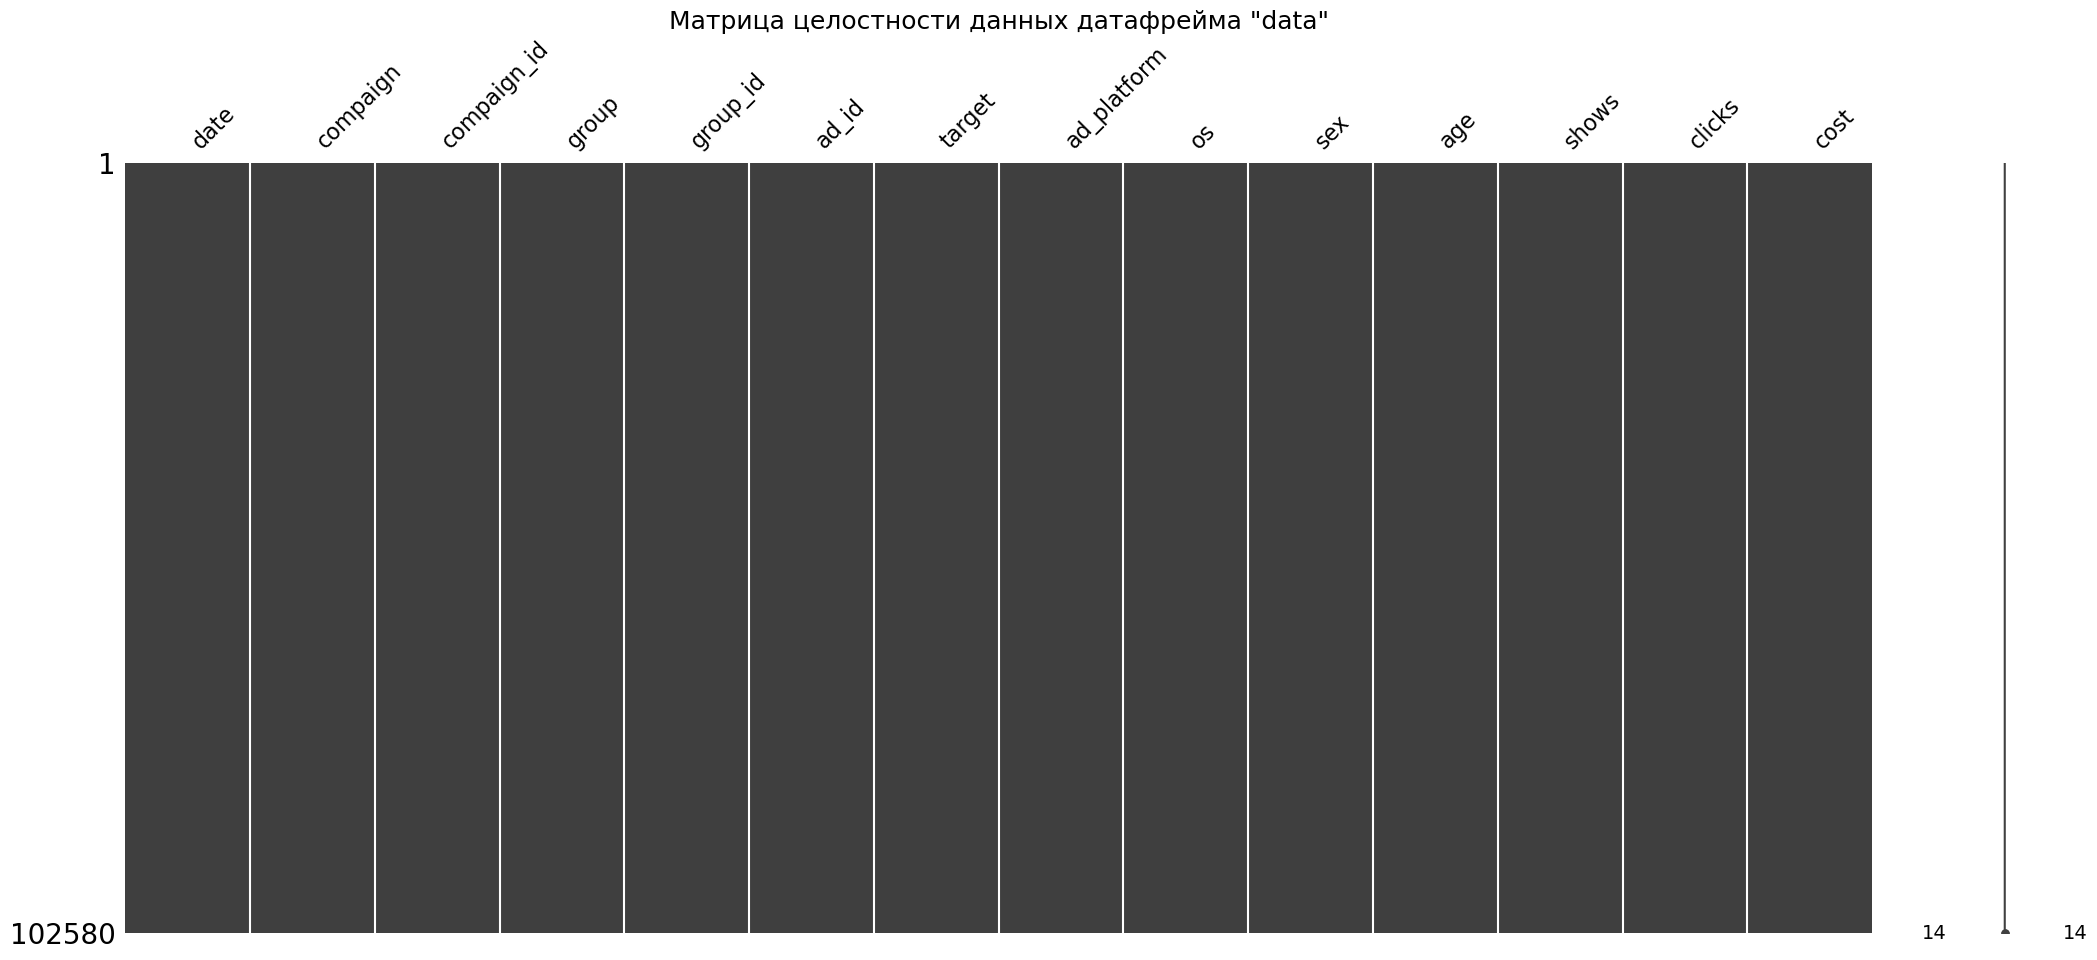

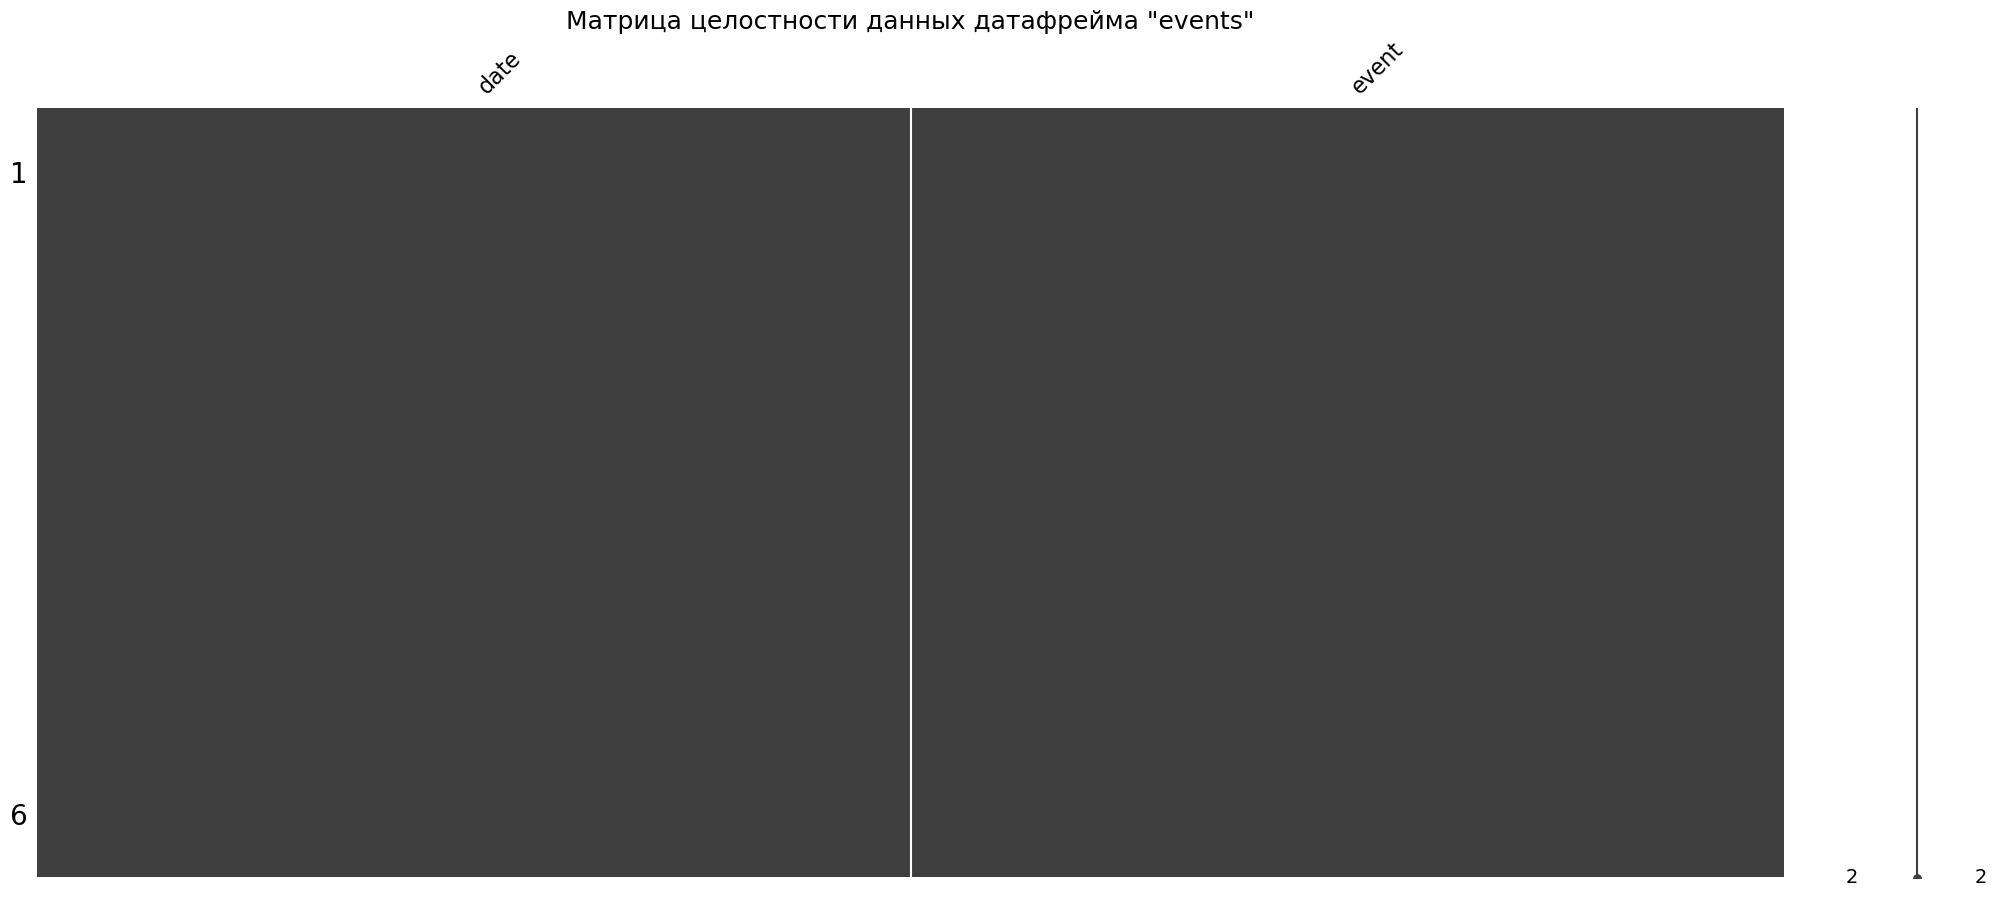

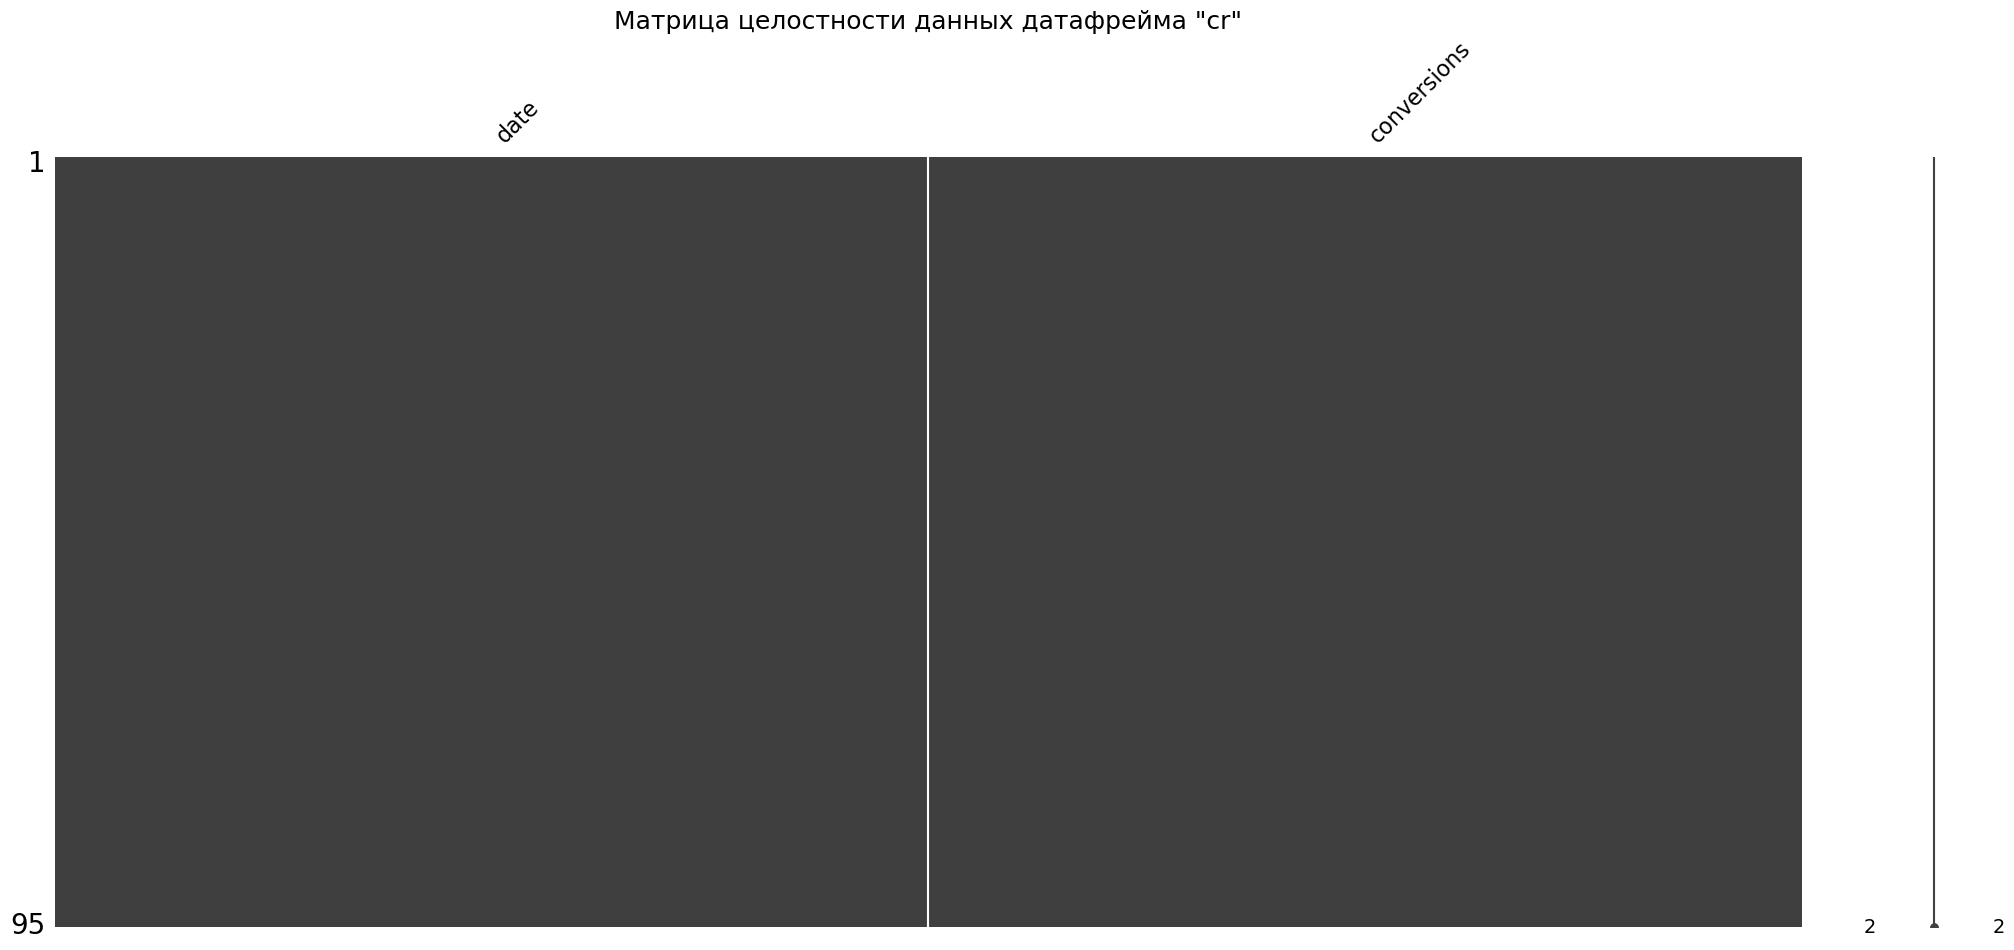

In [6]:
# построим матрицу целостности данных
for name, df in dfs.items():
    msno.matrix(df)
    plt.title(label=f'Матрица целостности данных датафрейма "{name}"', fontdict={'fontsize': 18})
plt.show()

Как и было продемонстрировано в информационной сводке по датафреймам, пропусков не обнаружено, однако следует дополнительно проверить их количество.   
Проверим, действиетльно ли нет пропусков в датафреймах.

In [7]:
# выведем количество пропусков для обоих датафреймов
for name, df in dfs.items():
    print(f'Пропуски по датафрейму "{name}":')
    display(df.isna().sum())
    print()

Пропуски по датафрейму "data":


date           0
compaign       0
compaign_id    0
group          0
group_id       0
ad_id          0
target         0
ad_platform    0
os             0
sex            0
age            0
shows          0
clicks         0
cost           0
dtype: int64


Пропуски по датафрейму "events":


date     0
event    0
dtype: int64


Пропуски по датафрейму "cr":


date           0
conversions    0
dtype: int64

Пропусков действительно нет. Теперь, когда мы избавились от пропусков, проверим категориальные переменные на наличие дубликатов.

In [8]:
# проверим датафреймы на наличие дубликатов
for name, df in dfs.items():
    print(f'Количество дубликатов в датафрейме "{name}": {df.duplicated().sum()}')

Количество дубликатов в датафрейме "data": 0
Количество дубликатов в датафрейме "events": 0
Количество дубликатов в датафрейме "cr": 0


Явных дубликатов в датафреймах не обнаружено. Дополнительно проверим категориальные переменные на наличие неявных дубликатов.

In [9]:
# создадим список категориальных переменных для проверки
categ_var = ['compaign', 'group', 'target', 'ad_platform', 'os', 'sex', 'age']

# через цикл выведем уникальные значения
for var in categ_var:
    display(data[var].unique())

array(['eng1_paid', 'eng2_paid', 'eng2_search_promo_course',
       'eng3_network_4_newtext', 'eng4_network_promo_course',
       'eng1_search_paid', 'eng5_search_free_eng',
       'eng6_network_free_english', 'eng7_network_eng',
       'eng8_network_promo_course', 'eng9_network_promo_english_newtext',
       'eng10_network_english_2goals_0-24', 'eng11_network_bot'],
      dtype=object)

array(['eng1_paid', 'eng2_paid', 'english_keywords', 'eng_audience_all',
       'eng_keywords_banner3', 'eng_keywords_banner4',
       'eng_keywords_banner2', 'eng_course_keywords_banner1',
       'eng_course_keywords_banner2', 'eng_course_keywords_banner3',
       'eng_course_keywords_banner4', 'eng_course_audience_banner_all',
       'british_keywords', 'british_keywords_banner1', 'languages',
       'language_courses', 'british_audience_banner3',
       'british_audience_banner4', 'british_audience_banner1',
       'keywords_languages2_banner1_3', 'native_banner1_3',
       'english_keywords_banner2-mixed', 'english_audience_banner2-mixed',
       'language_keywords_newbanner2', 'language_keywords_newbanner3',
       'language_keywords_newbanner1'], dtype=object)

array(['autotargeting', 'курс английского скачать',
       'языковые курсы -бесплатно -начинающих -нуля -обучения -сливы -скачать',
       'языковые курсы с погружением в среду', 'английский обучение',
       'курсы языковые бесплатно -начинающих', 'преподаватели контакты',
       'курс английского с носителем -распродажа -скидки -купить',
       'курс яндекса английский -скидки -купить',
       'курс english_first -скидки',
       'курсы английского спб -распродажа -скидки',
       'курс испанского -распродажа -скидки',
       'языковые курсы -распродажа -скидки', 'грамматика английского',
       'грамматика французского', 'носитель английского', 'linguoleo',
       'englishfirst -ответы -тесты', 'дуолингво -скачать -ответы',
       'как заговорить на английском', 'записи занятий по английскому',
       'английский для начинающих',
       'курс разговорного английского -распродажа -скидки -купить',
       'курс разговорного английского с носителем -распродажа -скидки -купить',
       

array(['поиск', 'сети'], dtype=object)

array(['Android', 'iOS', 'не определен'], dtype=object)

array(['мужской', 'женский', 'не определен'], dtype=object)

array(['25-34', '18-24', '45-54', '35-44', 'не определен', 'старше 55',
       'младше 18'], dtype=object)

Учитывая представленные уникальные значения в каждой категориальной переменной, мы не находим идентичных по значимости значений, поэтому можем утверждать, что неявных дубликатов в датафрейме нет.  
Относительно датафрейма `events` уже на предварительном этапе можно утверждать, что дубликатов нет ввиду малого объема таблицы, однако проверим уникальные значения столбцов этого датафрейма.

In [10]:
# проверим уникальные значения столбцов датафрейма "events"
for col in events.columns:
    display(events[col].unique())

array(['2024-04-02', '2024-04-07', '2024-04-22', '2024-05-09',
       '2024-05-24', '2024-05-26'], dtype=object)

array(['Сужение критериев ядра ЦА', 'Тест новых креативов',
       'Изменение критериев ЦА', 'Перераспределение трафика на сети'],
      dtype=object)

Синонимичных значений нет.   
Также не забудем, что в расподагаемых датафреймах даты представлены в виде строк, поэтому сконвертируем их в формат `datetime`.

In [11]:
# переведем строки в столбцах "date" в даты через цикл
for df in dfs.values():
    df['date'] = pd.to_datetime(df['date'])

# проверим результат
for name, df in dfs.items():
    print(f'Датафрейм "{name}":')
    print(df['date'].info())

Датафрейм "data":
<class 'pandas.core.series.Series'>
RangeIndex: 102580 entries, 0 to 102579
Series name: date
Non-Null Count   Dtype         
--------------   -----         
102580 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 801.5 KB
None
Датафрейм "events":
<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: date
Non-Null Count  Dtype         
--------------  -----         
6 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 180.0 bytes
None
Датафрейм "cr":
<class 'pandas.core.series.Series'>
RangeIndex: 95 entries, 0 to 94
Series name: date
Non-Null Count  Dtype         
--------------  -----         
95 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 892.0 bytes
None


Теперь даты в датафреймах представлены в формате `datetime64[ns]`.  
Прежде чем завершить предобработку данных, дополнительно понадобиться обогатить датафрейм новым столбцом `direction` с категориальной переменной направления продвижения, т.к. в дальнейшем понадобится анализ относительно как отдельного направления по платному интенсиву, так и промо-курса для контекста оценки рассматриваемого направления.  
Для начала создадим списки направлений с релевантными кампаниями.

In [12]:
# создаем списки из рекламных кампаний и называем их по направлению (продукту)
intensive_course = ['eng1_paid', 'eng2_paid', 'eng3_network_4_newtext', 'eng1_search_paid', 
                    '8eng_network_course_paid', 'eng11_network_bot', '12eng_search_course_paid']

promo_course = ['eng2_search_promo_course', 'eng4_network_promo_course', 'eng8_network_promo_course',
                'eng9_network_promo_english_newtext', 'eng10_network_english_2goals_0-24', '14eng_search_promo_english_course',
                '11eng_network_promo_english_course', 'eng6_network_free_english', 'eng7_network_eng', 'eng5_search_free_eng']

Присвоим каждой записи категорию `direction` через функцию, проверяющую вхождение кампании в списках выше.

In [13]:
# объявим функцию для выявления направления отдельной кампании
def get_direction(compaign):
    if compaign in intensive_course:
        return 'intensive_course'
    else:
        return 'promo_course'

In [14]:
# добавим столбец в датафрейм "data" с направлением 
data['direction'] = data['compaign'].apply(get_direction)

# проверим результат
data['direction'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 102580 entries, 0 to 102579
Series name: direction
Non-Null Count   Dtype 
--------------   ----- 
102580 non-null  object
dtypes: object(1)
memory usage: 801.5+ KB


В результате мы подготовили 3 датафрейма к дальнейшему анализу. Теперь приступаем к исследовательскому анализу данных.

### 3. Исследовательский анализ данных
На данном этапе мы проведем исследовательский анализ данных, включая срок предоставленных данных, распределения показателей, периоды различных кампаний, а также попытаемся выявить взаимосвязи между показателями.  
Для начала выясним, за какой срок представлены данные.

In [15]:
# выведем самую раннюю и самую позднюю дату в столбцах "date"
for name, df in dfs.items():
    print(f'Данные датафрейма "{name}" представлены за период: {df["date"].min()} — {df["date"].max()}')

Данные датафрейма "data" представлены за период: 2024-03-01 00:00:00 — 2024-06-07 00:00:00
Данные датафрейма "events" представлены за период: 2024-04-02 00:00:00 — 2024-05-26 00:00:00
Данные датафрейма "cr" представлены за период: 2024-03-01 00:00:00 — 2024-06-07 00:00:00


Данные в датафреймах `data` и `cr` представлены за период с 1 марта по 7 июня 2024 года, т.е. за 3,25 месяца. События, связанные со сменой маркетинговой стратегии, в датафрейме `events` охватывают период с 2 апреля по 26 мая 2024 г.  
Теперь мы можем провести исследовательский анализ. Начнем с распределения основных показателей объявлений. Поскольку немалая часть объявлений имеет нулевые показатели, то следует ожидать, что визуализация и общая оценка распределений будет сосредоточена на 0 или околонулевых значениях, однако наша задача впоследствии выявить наиболее результативные объявления, поэтому при оценке переменных мы исключим нулевые значения из обзора, чтобы выявить основные меры хотя бы минимально эффективных объявлений.**

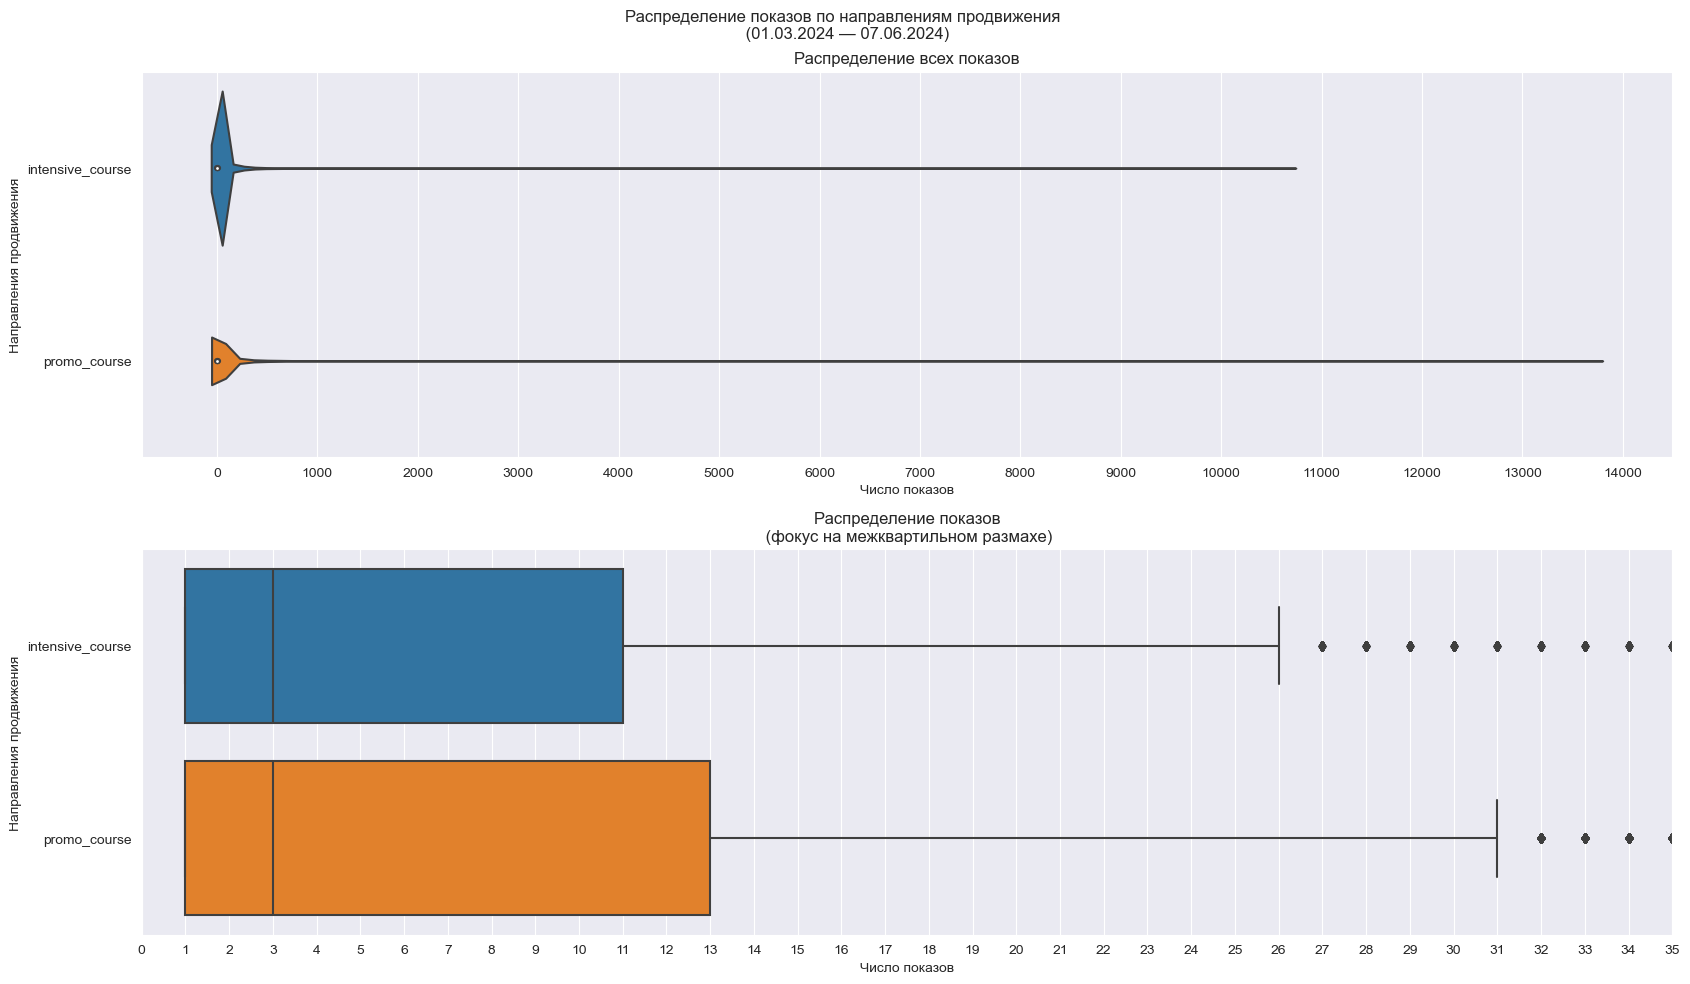

In [16]:
# посмотрим, как распределены просмотры по отдельным направлениям
# отфильтруем те объявления, которые имеют показы (>0)
shows_data = data[data['shows'] > 0]

# установим стиль графиков
sns.set_style('darkgrid')

# зададим размер всей области отображения
plt.figure(figsize=(17, 10))

# зададим общее название
plt.suptitle('Распределение показов по направлениям продвижения \n (01.03.2024 — 07.06.2024)')

# посмотрим скрипичную диаграмму
ax1 = plt.subplot(2, 1, 1)
ax1 = sns.violinplot(data=shows_data, x='shows', y='direction')
ax1.set_title('Распределение всех показов')
plt.xlabel('Число показов')
plt.ylabel('Направления продвижения')
plt.xticks(np.arange(0, 14001, step=1000))

# посмотрим диаграмму размаха с фокусом на МКР
ax2 = plt.subplot(2, 1, 2)
ax2 = sns.boxplot(data=shows_data, x='shows', y='direction')
ax2.set_title('Распределение показов\n (фокус на межквартильном размахе)')
plt.xlabel('Число показов')
plt.ylabel('Направления продвижения')
plt.xlim(0, 35)
plt.xticks(np.arange(0, 36, step=1))
plt.tight_layout()

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('violin_box_shows', dpi=400)

plt.show()

Как мы видим в целом 75% показов отдельных объявлений на всех направлениях распределены в среднем от 1 до 12 с медианой в 3 показа, однако заметны многочисленные выбросы объявлений, получивших показов до 14000. В этом отношении объявления с наибольшими показами представлены по направлениям `promo_course` (< 14000) и `intensive_course` (< 11000). Однако основной массив показов получает скромные значения от 1 до 11. Стабильно немногим выше показы по направлению `promo_course`: до 13 показов у 75% объявлений и до 31 показа у подавляющего большинства объявлений. Направление `intensive_course` демонстрирует немногим меньшие значения: до 11 показов у 75% объявлений и до 26 показов у подавляющего большинства объявлений. 
Теперь рассмотрим, как распределены клики.

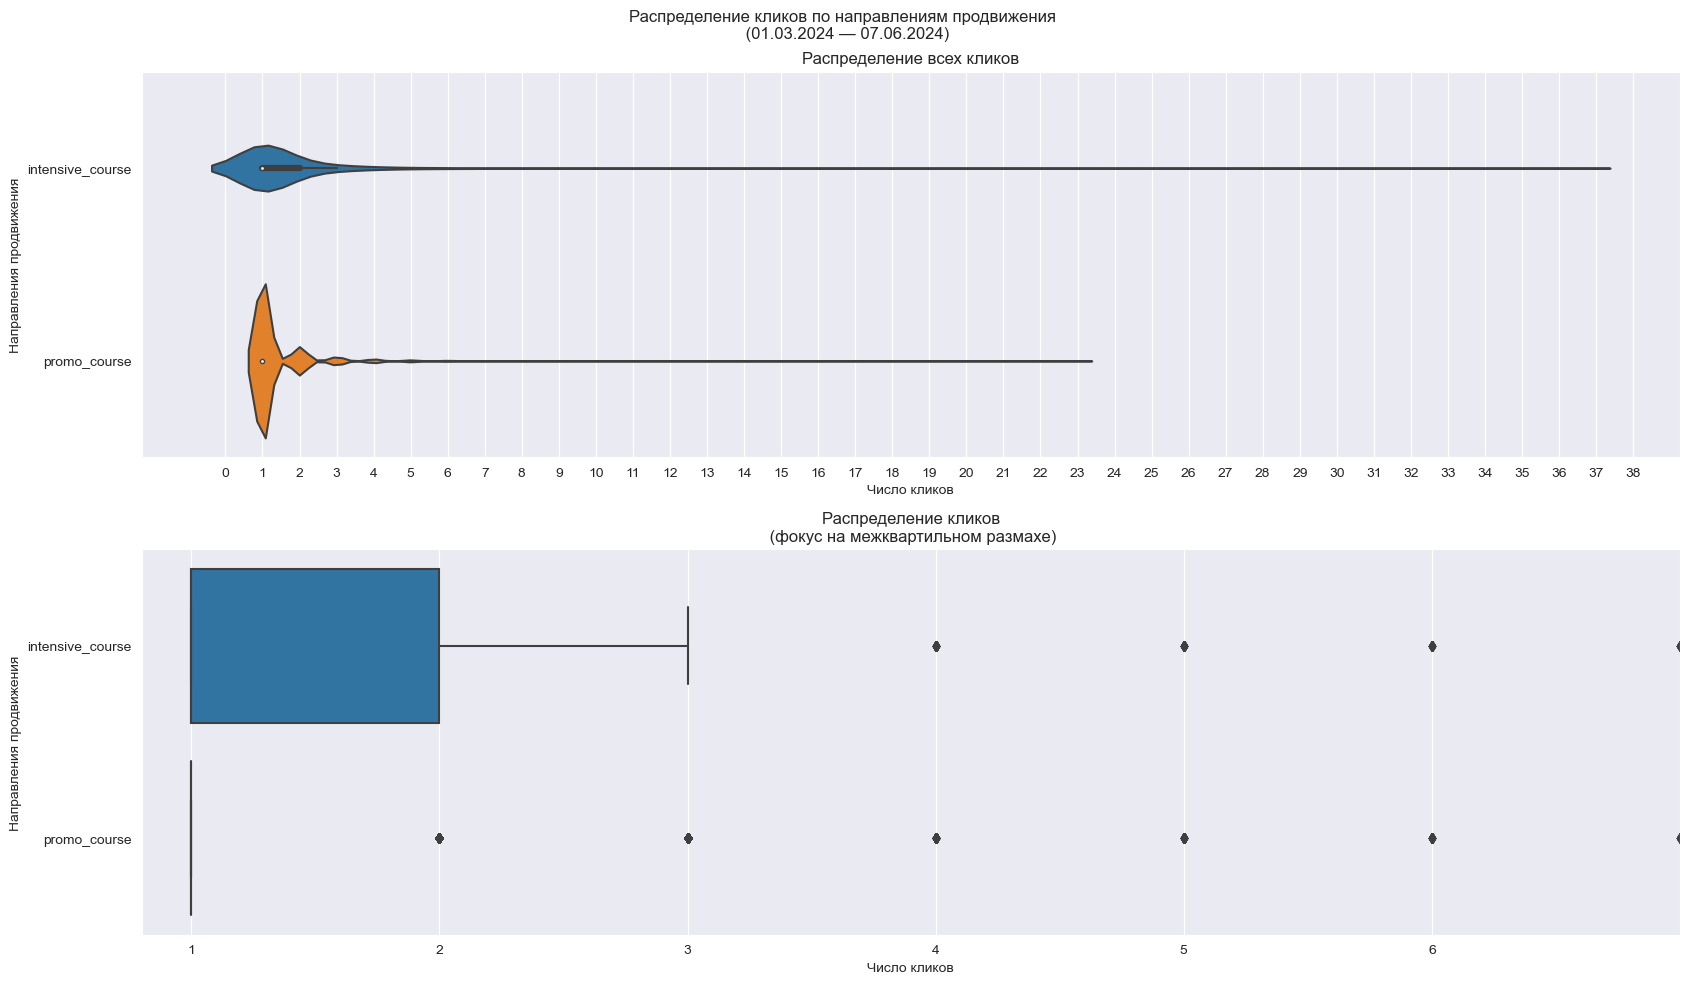

In [17]:
# посмотрим, как распределены клики по отдельным направлениям
# отфильтруем те объявления, которые имеют клики (>0)
clicks_data = data[data['clicks'] > 0]

# зададим размер всей области отображения
plt.figure(figsize=(17, 10))

# зададим общее название
plt.suptitle('Распределение кликов по направлениям продвижения \n (01.03.2024 — 07.06.2024)')

# посмотрим скрипичную диаграмму
ax1 = plt.subplot(2, 1, 1)
ax1 = sns.violinplot(data=clicks_data, x='clicks', y='direction')
ax1.set_title('Распределение всех кликов')
plt.xlabel('Число кликов')
plt.ylabel('Направления продвижения')
plt.xticks(np.arange(0, 39, step=1))

# посмотрим диаграмму размаха с фокусом на МКР
ax2 = plt.subplot(2, 1, 2)
ax2 = sns.boxplot(data=clicks_data, x='clicks', y='direction')
ax2.set_title('Распределение кликов\n (фокус на межквартильном размахе)')
plt.xlabel('Число кликов')
plt.ylabel('Направления продвижения')
plt.xlim(0.8, 7)
plt.xticks(np.arange(1, 7, step=1))
plt.tight_layout()

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('violin_box_clicks', dpi=400)

plt.show()

У подавляющего большинства объявлений общее число кликов равно нулю, и они были отфильтрованы. Если учитывать выбросы, то как направление с большим количеством аномально успешных объявлений по кликам лидирует `intensive_course` (до 36 кликов). У направления `promo_course` показатели кликов относительно аномально успешных объявлений  средние: до 24 кликов. В целом, показатели кликов достаточно низкие. Однако немаловажно и то, какова стоимость этих кликов. Для этого посмотрим, как распределены затраты по объявлениям в разрезе направлений привлечения.

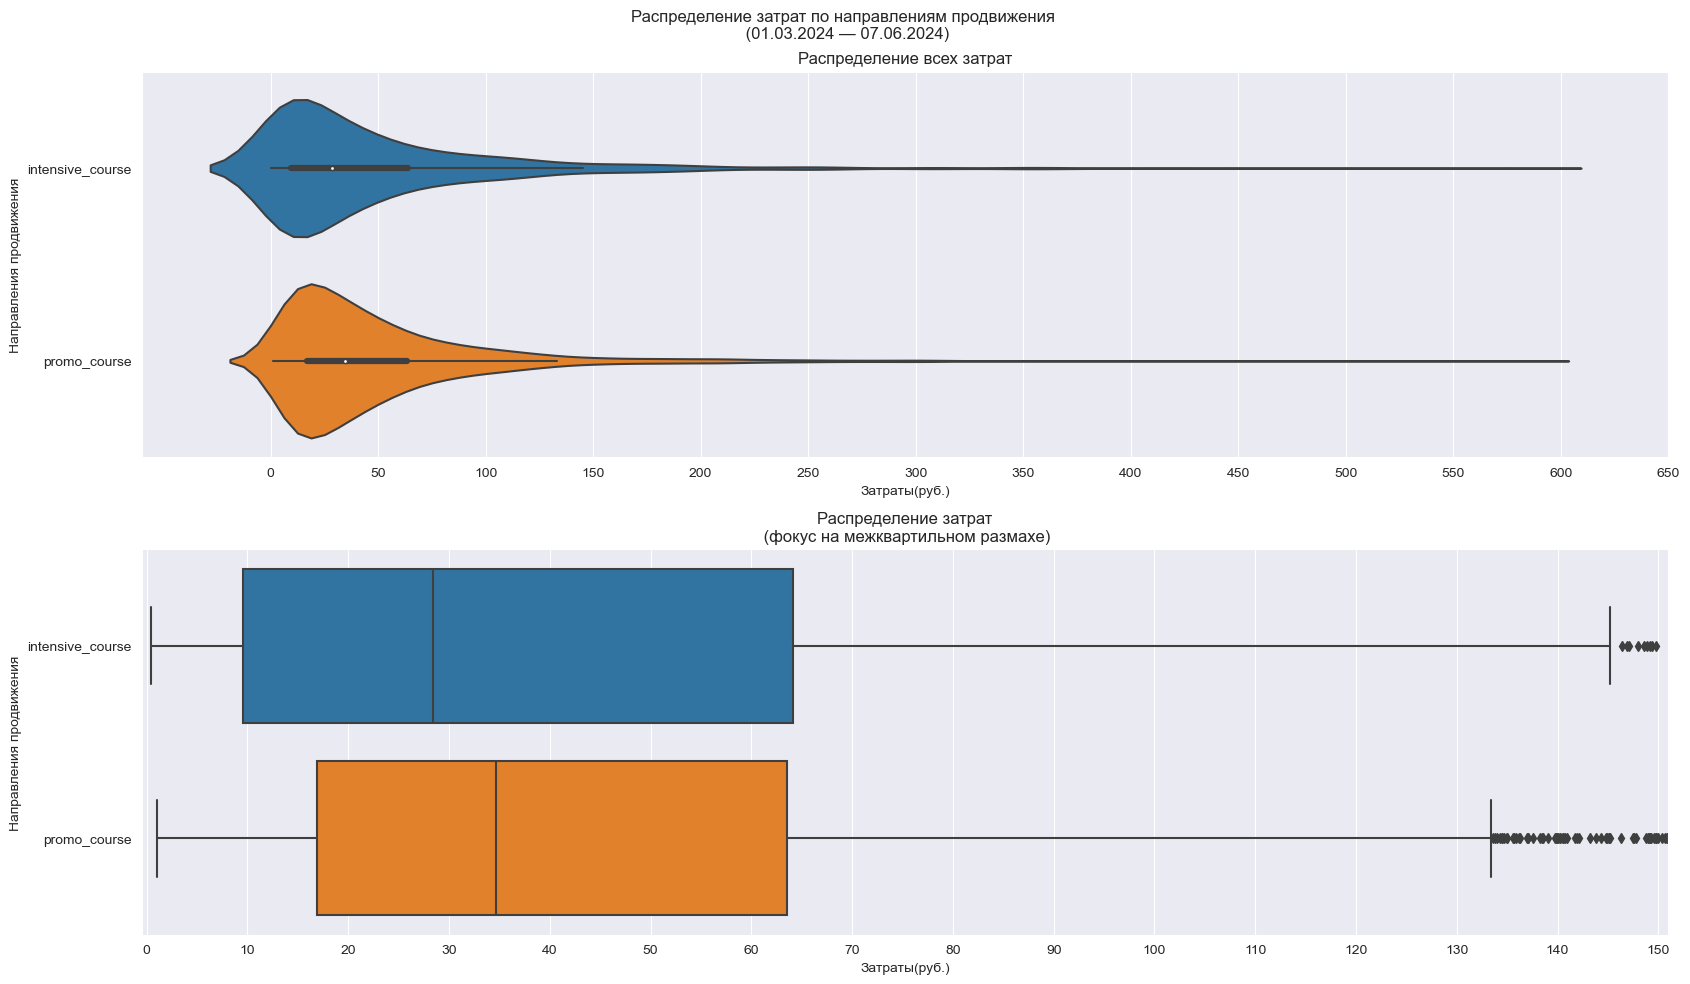

In [18]:
# посмотрим, как распределены затраты на объявления по отдельным направлениям
# отфильтруем те объявления, которые имеют затраты (>0)
costly_data = data[data['cost'] > 0]

# зададим размер всей области отображения
plt.figure(figsize=(17, 10))

# зададим общее название
plt.suptitle('Распределение затрат по направлениям продвижения \n (01.03.2024 — 07.06.2024)')

# посмотрим скрипичную диаграмму
ax1 = plt.subplot(2, 1, 1)
ax1 = sns.violinplot(data=costly_data, x='cost', y='direction')
ax1.set_title('Распределение всех затрат')
plt.xlabel('Затраты(руб.)')
plt.ylabel('Направления продвижения')
plt.xticks(np.arange(0, 651, step=50))

# посмотрим диаграмму размаха с фокусом на МКР
ax2 = plt.subplot(2, 1, 2)
ax2 = sns.boxplot(data=costly_data, x='cost', y='direction')
ax2.set_title('Распределение затрат\n (фокус на межквартильном размахе)')
plt.xlabel('Затраты(руб.)')
plt.ylabel('Направления продвижения')
plt.xlim(-0.5, 151)
plt.xticks(np.arange(0, 151, step=10))
plt.tight_layout()

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('violin_box_cost', dpi=400)

plt.show()

По направлениям `intensive_course` и `promo_course` наблюдается достаточно широкий разброс затрат: подавляющее большинство объявлений по обоим направлениям обходятся до 150 руб. с выбросами до 650 руб. и медианными показателями 28 руб. у `intensive_course` и 34 руб. у `promo_course`.  
Дополнительно посмотрим, как параметры зависят друг от друга. Построим корреляционную матрицу.

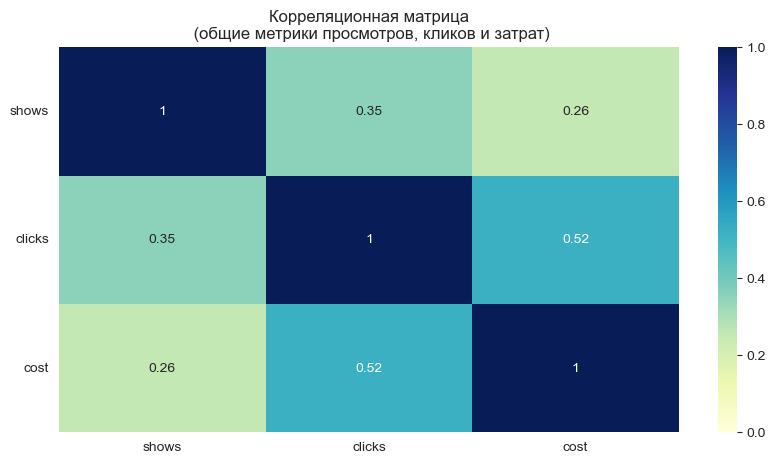

In [19]:
# построим корреляционную матрицу в виде тепловой карты
# зададим размер всей области отображения
plt.figure(figsize=(10, 5))

# построим тепловую карту
ax1 = sns.heatmap(data[['shows', 'clicks', 'cost']].corr(), cmap='YlGnBu', annot=True, vmin=0, vmax=1)
ax1.set_title('Корреляционная матрица\n (общие метрики просмотров, кликов и затрат)')
plt.yticks(rotation=0)

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('common_matrix', dpi=400)

plt.show()

Как мы видим, клики имеют умеренную положительную корреляционную связь с показами (0,35) и заметную связь с затратами, а затраты в свою очередь имеют незначительный коэффициент корреляции относительно показов (0,26), что имеет смысл и отражает бизнес-логику современных рекламных платформ, однако примечательно здесь будет то, насколько отдельные направления демонстрирует подобные корреляционные зависимости. Разделим данные на направления и посмотрим, изменится ли корреляция, беря в качестве гипотезы то, что не все объявления одинаково хорошо конвертируются в клики с той же стоимостью.

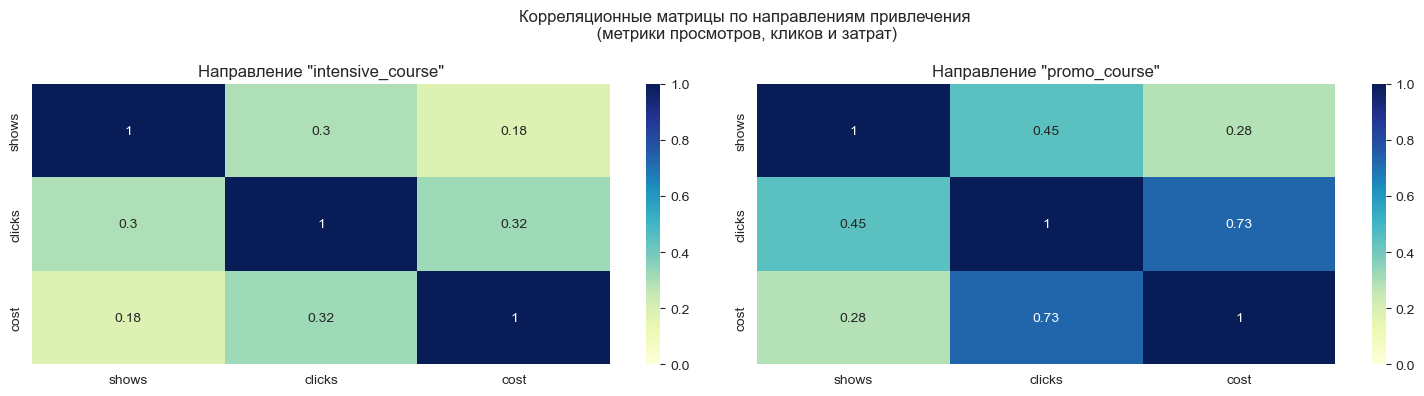

In [20]:
# построим корреляционную матрицу в виде тепловой карты для каждого направления
# зададим размер всей области отображения
plt.figure(figsize=(15, 4))

# создадим счетчик для последовательного расположения матриц
column = 1

# построим тепловые карты для каждого направления
plt.suptitle('Корреляционные матрицы по направлениям привлечения\n (метрики просмотров, кликов и затрат)')
for dir in data['direction'].unique():
    plt.subplot(1, 2, column)
    sns.heatmap(
        data[data['direction'] == dir][['shows', 'clicks', 'cost']].corr(), 
        cmap = 'YlGnBu', 
        annot = True,
        vmin = 0, 
        vmax = 1
    ).set_title(f'Направление "{dir}"')
    column += 1
plt.tight_layout()

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('dir_matrices', dpi=400)

plt.show()

Как мы видим, корреляционные связи между идентичными переменными в разных направлениях изменчивы. Так, по направлению `intensive_course` корреляция между показами и кликами составляет 0,3, что соотвтествует порогу, чтобы отрицать хоть сколь-нибудь значимую линейную связь, а корреляция между показами и затратами и вовсе незначительна (0,18). Уже более умеренная (и ожидаемая) связь присутствует между кликами и затратами (0,32), что значительно меньше аналогичных показателей коэффициента корреляции у прочих направлений продвижения. В сравнении по направлению `promo_course` аналогичные коэффициенты в 1,5-2 раза выше: корреляция кликов и показов - 0,45, кликов и затрат - 0,73, показов и затрат - 0,28. Таким образом, продвижение по направлению `promo_course` демонстрирует умеренную корреляцию между показами и кликами, а также сильную корреляцию между кликами и затратами, что преимущественно объясняется спецификой бизнес-модели рекламных площадок, однако остается неясным, почему у направления `intensive_course` коэффициенты корреляции существенно ниже. В качестве варианта можно предположить, что рост показов намного реже конвертируется в клик, а следовательно и в затраты. Попытаемся найти ответ в диаграмме рассеяния.

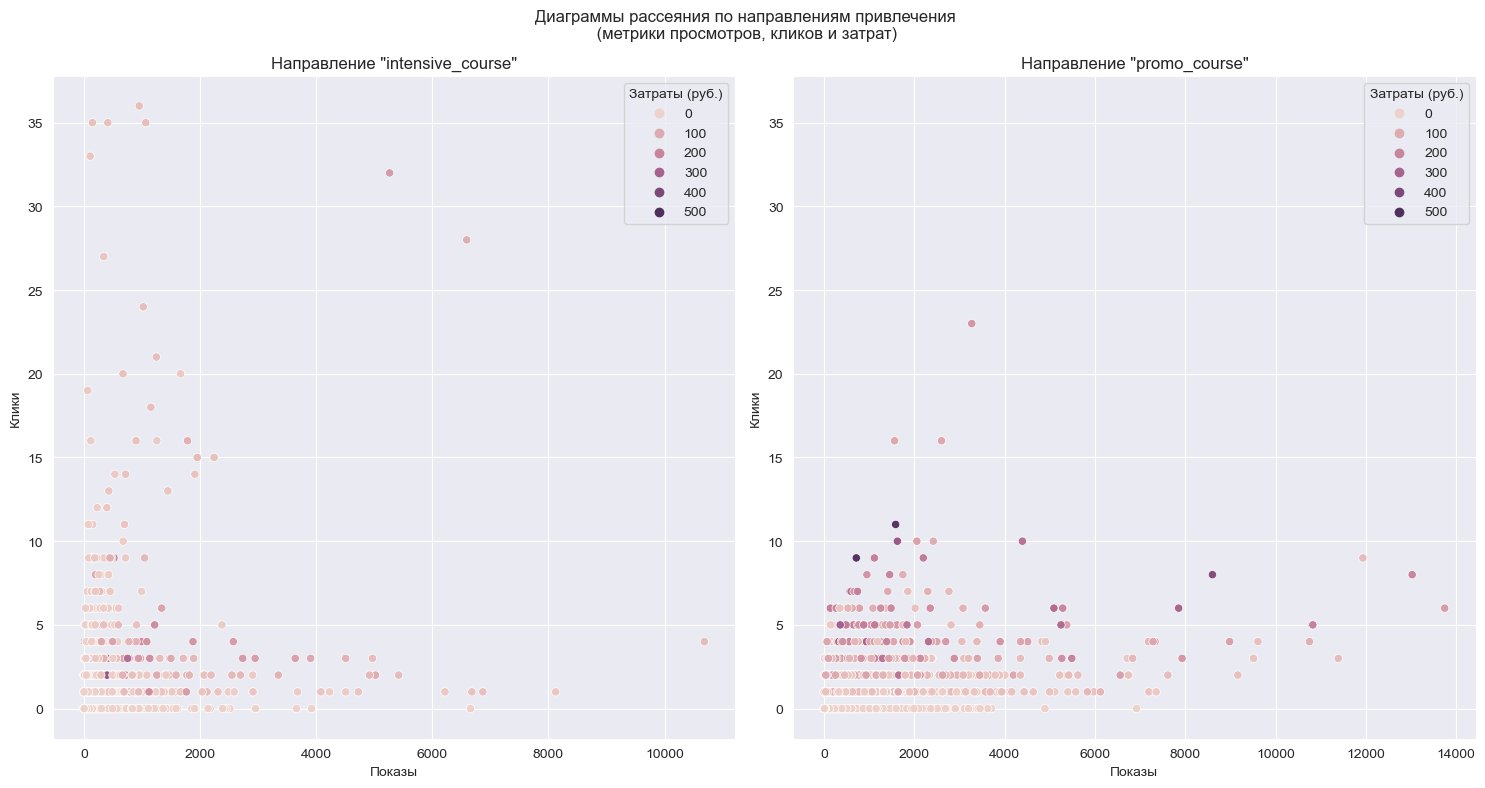

In [21]:
# построим диаграммы рассеяния для каждого направления
# зададим размер всей области отображения и название
plt.figure(figsize=(15, 8))
plt.suptitle('Диаграммы рассеяния по направлениям привлечения\n (метрики просмотров, кликов и затрат)')

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    data = data [data['direction'] == 'intensive_course'], 
    x = 'shows', 
    y = 'clicks', 
    hue = 'cost').set_title('Направление "intensive_course"')
plt.xlabel('Показы')
plt.ylabel('Клики')
plt.legend(title='Затраты (руб.)')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
sns.scatterplot(
    data = data [data['direction'] == 'promo_course'], 
    x = 'shows', 
    y = 'clicks', 
    hue = 'cost').set_title('Направление "promo_course"')
plt.xlabel('Показы')
plt.ylabel('Клики')
plt.legend(title='Затраты (руб.)')

plt.tight_layout()

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('dir_scatters', dpi=400)

plt.show()

Анализируя диаграммы рассеяния, мы можем найти ответ на вопрос, почему по направлению `intensive_course` коэффициенты корреляции ниже, чем у тех же показателей направлению `promo_course`. В общей массе по направлению `intensive_course` мы наблюдаем кучность объявлений с затратами от 0 до 300 руб. на уровне показов до 2000. Особенно важно и то, что самые высокие показатели кликов приходятся на объявления до 2000 показов, т.е. по данному направлению объявления при меньших показах имеют более высокую кликабельность (до 36), чем по направлению `promo_course`. Последнее в свою очередь, наоборот, редко получает до 10 кликов, а по показам мы наблюдаем значения до 14000 показов.  
Также здесь наблюдаются большие затарты (до 500 руб.). Таким образом, по направлению `intensive_course` рекламные объявления при меньших показах и затратах имеют больше кликов, пока объявления по направлению `promo_course` при больших затартах и показах имеют меньше кликов. Отсюда и вытекает слабая корреляция показателей по направлению `intensive_course`.

### Промежуточные выводы
По факту исследовательского анализа данных мы можем резюмировать следующее:
- данные представлены за период 01.03.24 — 07.06.24 (~3,2 месяца);
- большая часть объявлений получает от 1 до 26 показа с медианой в 3 показа;
- редкие объявления по направлениям `intensive_course` и `promo_course` получают до 11000 и 14000 показов соответственно;
- большая часть объявлений не получает кликов;
- из тех объявлений, которые имеют клики, большая часть по направлению `intensive_course` получает до 3 кликов, а по `promo_course` - 1 клик;
- подавляющее большинство объявлений с затратами по всем направлениям обходятся до 150 руб. при следующих медианах:
    - `intensive_course` - 28 р.,
    - `promo_course` - 34 р.;
- редкие объявления по направлению `intensive_course` и `promo_course` обходятся в сумму до 600 руб.;
- общая корреляция между показами и кликами имеет умеренный характер, пока корреляция между показами и затратами незначительна;
- коэффициенты корреляции между показами, кликами и затратами по направлению `intensive_course` ниже `promo_course` ввиду низких затрат на объявление при высоких показателях кликов.

## 4. Анализ общих маркетинговых показателей
На данном этапе мы рассмотрим общие метрики маркетинговой деятельности команды. Для начала подготовим данные, создав сводную таблицу, по которой затем будем анализировать метрики.

In [22]:
# сгруппируем данные по дням и сохраним в отдельный датафрейм
results_per_date = data.groupby('date')[['shows', 'clicks', 'cost']].agg('sum').reset_index()

# проверим результат
results_per_date.head()

date  shows  clicks     cost
0 2024-03-01   2187      21   649.10
1 2024-03-02   1722      17   475.87
2 2024-03-03   2195      30  1392.43
3 2024-03-04   2191      23  2001.21
4 2024-03-05   2431      32  2717.55

In [23]:
# рассчитаем CTR и CPC
results_per_date['ctr'] = ((results_per_date['clicks'] / results_per_date['shows'])*100).round(2)
results_per_date['cpc'] = results_per_date['cost'] / results_per_date['clicks']

# заменим бесконечность на 0
results_per_date = results_per_date.replace([np.inf, -np.inf], np.nan)

# проверим результат
results_per_date.head()

date  shows  clicks     cost   ctr        cpc
0 2024-03-01   2187      21   649.10  0.96  30.909524
1 2024-03-02   1722      17   475.87  0.99  27.992353
2 2024-03-03   2195      30  1392.43  1.37  46.414333
3 2024-03-04   2191      23  2001.21  1.05  87.009130
4 2024-03-05   2431      32  2717.55  1.32  84.923438

In [24]:
# добавим скользящее среднее для выявленных метрик
for metric in ['shows', 'clicks', 'cost', 'ctr', 'cpc']:
    results_per_date['rolling'+'_'+metric] = results_per_date[metric].rolling(5).mean()

# проверим результат
results_per_date.head()

date  shows  clicks     cost   ctr        cpc  rolling_shows  \
0 2024-03-01   2187      21   649.10  0.96  30.909524            NaN   
1 2024-03-02   1722      17   475.87  0.99  27.992353            NaN   
2 2024-03-03   2195      30  1392.43  1.37  46.414333            NaN   
3 2024-03-04   2191      23  2001.21  1.05  87.009130            NaN   
4 2024-03-05   2431      32  2717.55  1.32  84.923438         2145.2   

   rolling_clicks  rolling_cost  rolling_ctr  rolling_cpc  
0             NaN           NaN          NaN          NaN  
1             NaN           NaN          NaN          NaN  
2             NaN           NaN          NaN          NaN  
3             NaN           NaN          NaN          NaN  
4            24.6      1447.232        1.138    55.449756

Метрики готовы, и теперь мы можем визуализировать их. Для визуализации готовы не только сами метрики, но показатели скользящего среднего для них с окном в 5 дней. Также для контекста добавим медианные показатели для контекста сравнения.

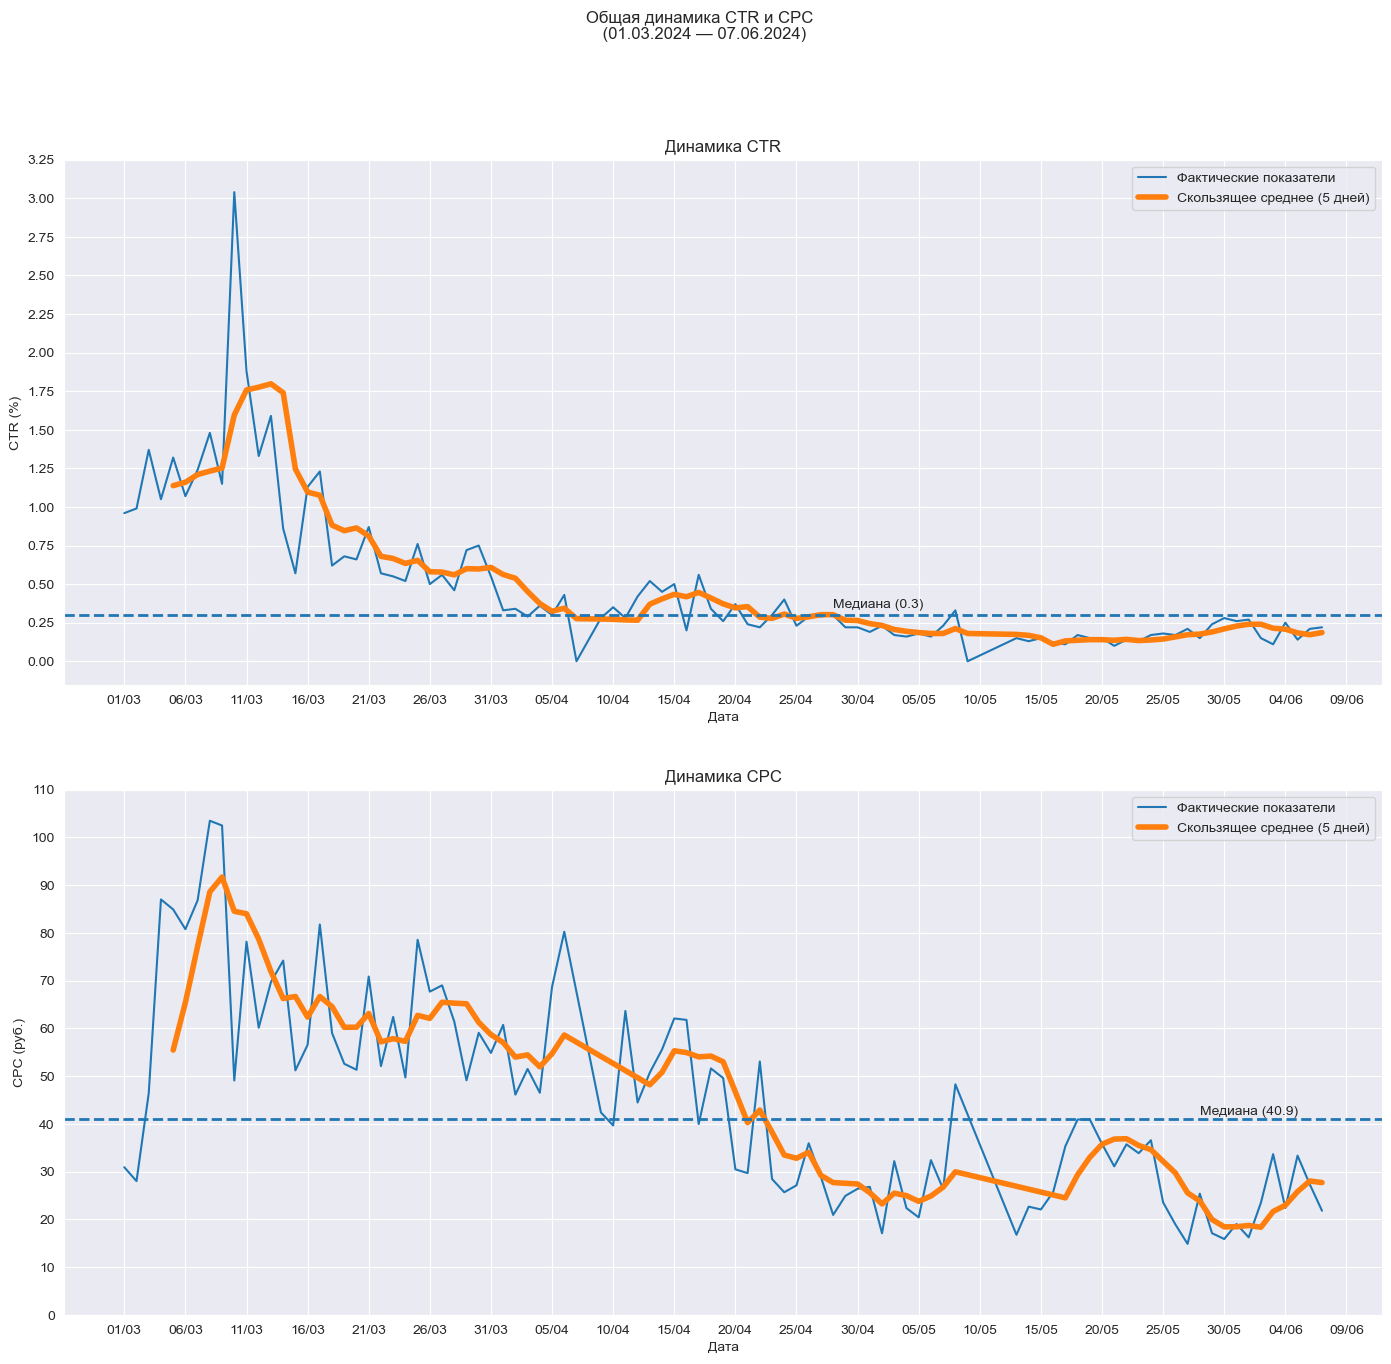

In [25]:
# визуализируем динамику метрик CTR и CPC
# зададим размер всей области отображения
plt.figure(figsize=(17, 15))

# зададим общее название
plt.suptitle('Общая динамика CTR и CPC \n (01.03.2024 — 07.06.2024)')

# посмотрим график CTR по дням
ax1 = plt.subplot(2, 1, 1)
ax1 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'ctr',
    label = 'Фактические показатели'
)
ax1 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'rolling_ctr',
    label = 'Скользящее среднее (5 дней)',
    linewidth = 4
)
ax1.set_title('Динамика CTR')
plt.xlabel('Дата')
plt.ylabel('CTR (%)')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.yticks(np.arange(0, 3.26, step=0.25))
plt.axhline(y=results_per_date['ctr'].median(), linestyle='--', linewidth=2)
plt.annotate(text=f'Медиана ({results_per_date["ctr"].median():.1f})', xy=(dt(2024, 4, 28), (results_per_date['ctr'].median())+.05))

# посмотрим график CPC по дням
ax2 = plt.subplot(2, 1, 2)
ax2 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'cpc',
    label = 'Фактические показатели'
)
ax2 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'rolling_cpc',
    linewidth = 4,
    label = 'Скользящее среднее (5 дней)'
)
ax2.set_title('Динамика CPC')
plt.xlabel('Дата')
plt.ylabel('CPC (руб.)')
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.yticks(np.arange(0, 111, step=10))
plt.axhline(y=results_per_date['cpc'].median(), linestyle='--', linewidth=2)
plt.annotate(text=f'Медиана ({results_per_date["cpc"].median():.1f})', xy=(dt(2024, 5, 28), (results_per_date["cpc"].median()+1)))

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('total_ctr_cpc', dpi=600)

plt.show()

Метрика CTR в среднем на протяжении первого месяца наблюдений (~до 17.03) держится в диапазоне 1-1,75, а на протяжении апреля держится медианного уровня (0,3), после чего до конца периода спадает на уровень 0,1. В абсолютных значениях CTR достигает пика 10 марта (3%).  
Намного более последовательной выступает CPC: затраты за клик в выражении скользящего среднего начала марта (1.03-9.03) резко растет с 55 до 90 руб. за клик, а затем за период 15.03-20.04 наблюдается постепенный спад метрики в диапазоне 50-70. К концу апреля CPC падает ниже медианного уровня (40,9 руб.) и постепенно снижается в диапазоне 20-35 руб. В абсолютных значениях пик CPC приходится на 7-8 марта - около 105 руб., минимальное значение - 15 руб. 27.05.  
Отдельно стоит отметить положительную динамику CPC в контексте динамики CTR: при умеренной волатильности CTR общий тренд CPC остается нисходящим даже при слабом подъеме в показателях CTR в начале июня.  
Дополним наши наблюдения динамикой общих метрик кампаний (показы, клики и затраты).

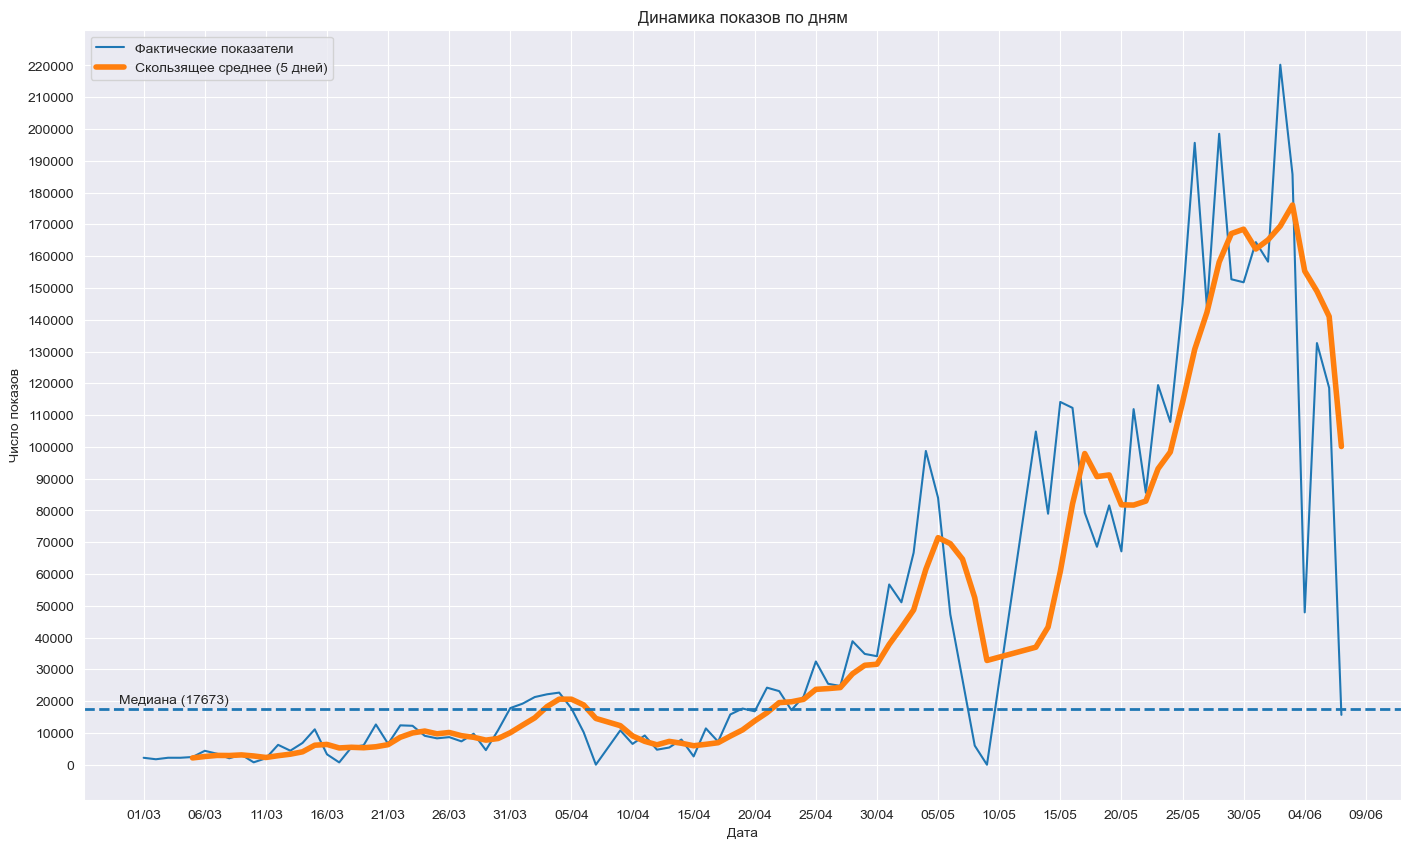

In [26]:
# посмотрим график показов по дням
# зададим размер всей области отображения
plt.figure(figsize=(17, 10))

ax1 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'shows',
    label = 'Фактические показатели'
)
ax1 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'rolling_shows',
    linewidth = 4,
    label = 'Скользящее среднее (5 дней)'
)
ax1.set_title('Динамика показов по дням')
plt.xlabel('Дата')
plt.ylabel('Число показов')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.yticks(np.arange(0, 220001, step=10000))
plt.axhline(y=results_per_date['shows'].median(), linestyle='--', linewidth=2)
plt.annotate(
    text = f'Медиана ({results_per_date["shows"].median():.0f})', 
    xy = (dt(2024, 2, 28), (results_per_date["shows"].median()+1500))
)

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('total_shows', dpi=600)

plt.show()

Относительно показов за рассматриваемый срок мы наблюдаем постепенный рост показов до начала апреля в пределах до 10000 показов. Достигнув пика за краткосрочный период в 20000, показы в середине апреля падают до уровня 5000, чтобы уже с конца апреля до начала июня резко возрасти и достигнуть абсолютного пика за период в 220000 показов. За последние дни июня наблюдается резкий спад с сохранением показателей на уровне медианы (17673). 

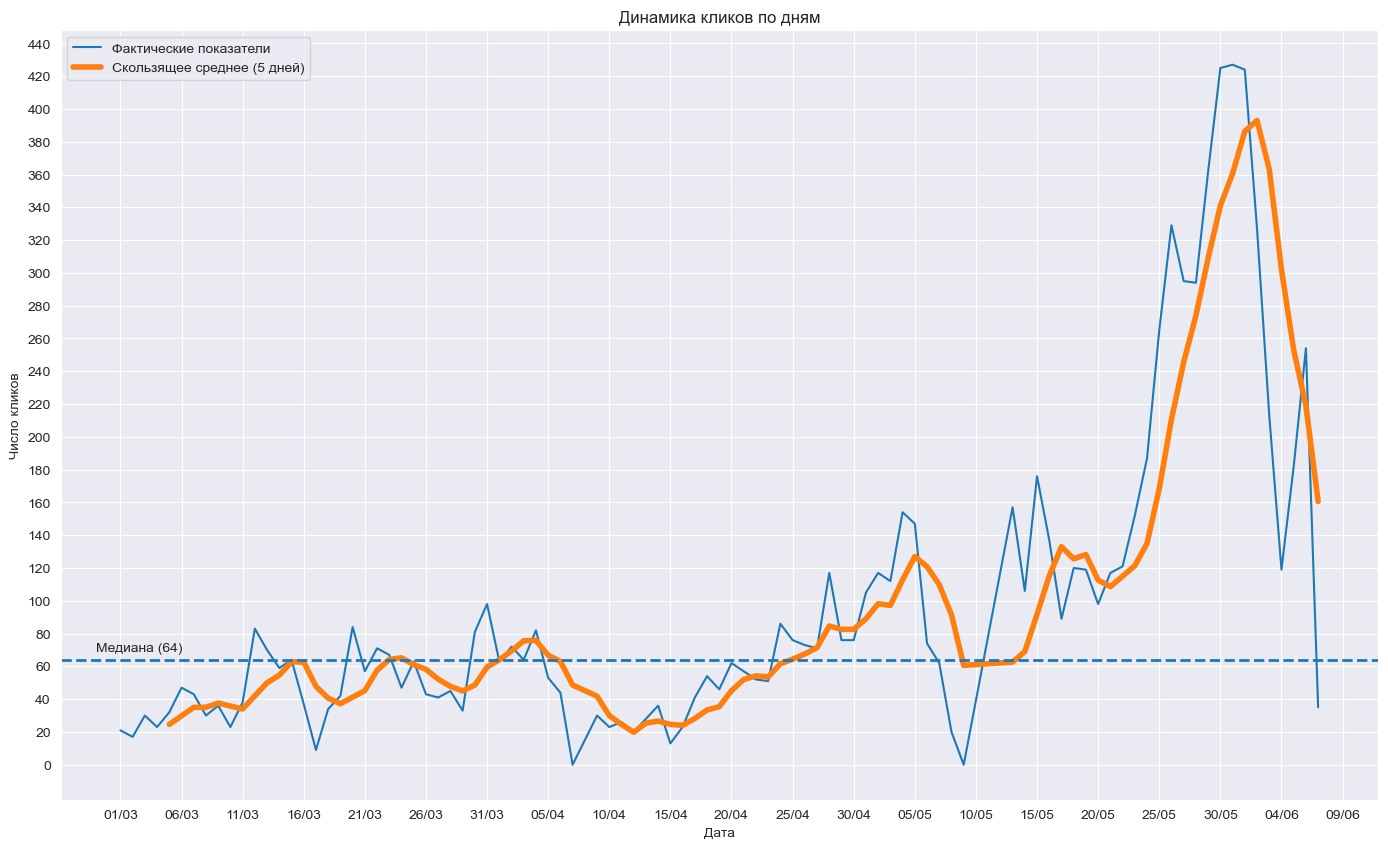

In [27]:
# посмотрим график кликов по дням
# зададим размер всей области отображения
plt.figure(figsize=(17, 10))

ax1 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'clicks',
    label = 'Фактические показатели'
)
ax1 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'rolling_clicks',
    linewidth = 4,
    label = 'Скользящее среднее (5 дней)'
)
ax1.set_title('Динамика кликов по дням')
plt.xlabel('Дата')
plt.ylabel('Число кликов')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.yticks(np.arange(0, 441, step=20))
plt.axhline(y=results_per_date['clicks'].median(), linestyle='--', linewidth=2)
plt.annotate(
    text = f'Медиана ({results_per_date["clicks"].median():.0f})', 
    xy = (dt(2024, 2, 28), (results_per_date["clicks"].median()+5))
)

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('total_clicks', dpi=600)

plt.show()

Клики ожидаемо повторяют тренд показов, однако наблюдается большая волатильность: до начала апреля количество кликов варьировалось на уровне 20-70 кликов, а уже далее, достигнув уровня медианы в 64 клика, наблюдается заметный спад до начальных показателей в 20-40 кликов. Так же, как и с показами, конец апреля становится отправной точкой постепенного роста кликов, что впоследствии приведет к пику в 420 показов на конец мая / начало июня. К 9 июня наблюдается спад показателя кликов до медианных значений. 

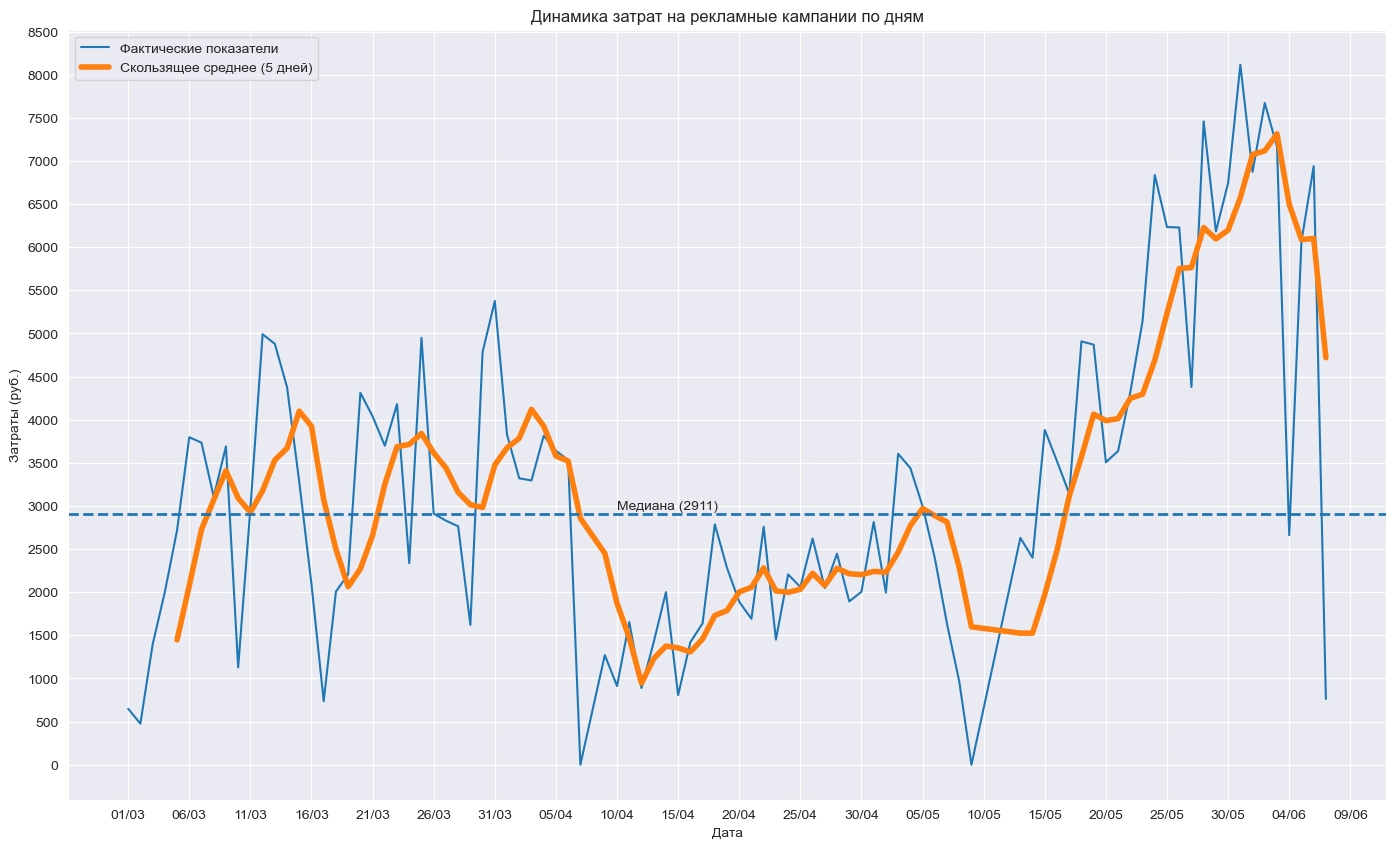

In [28]:
# посмотрим график затрат на рекламные кампании по дням
# зададим размер всей области отображения
plt.figure(figsize=(17, 10))

ax1 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'cost',
    label = 'Фактические показатели'
)
ax1 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'rolling_cost',
    linewidth = 4,
    label = 'Скользящее среднее (5 дней)'
)
ax1.set_title('Динамика затрат на рекламные кампании по дням')
plt.xlabel('Дата')
plt.ylabel('Затраты (руб.)')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.yticks(np.arange(0, 8501, step=500))
plt.axhline(y=results_per_date['cost'].median(), linestyle='--', linewidth=2)
plt.annotate(text=f'Медиана ({results_per_date["cost"].median():.0f})', xy=(dt(2024, 4, 10), (results_per_date["cost"].median()+50)))

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('total_cost', dpi=600)

plt.show()

Тренд затрат на рекламные кампании лишь частично повторяет динамику показов и кликов за рассматриваемые 3 месяца. В начале марта наблюдается рост затрат с уровня 500 руб. до менее устойчивого уровня в 2000-4000 руб. В начале апреля наблюдается сильный спад до начальных значений 1000-2000 руб., чтобы затем к началу мая достигнуть медианы в 2911 руб. Заметный краткосрочный спад в середине мая скорее всего связан с майскими праздниками, поскольку уже далее до начала июня наблюдается резкий взлет затрат до уровня 6000-8000 руб. с пиком в >8000 руб. за день. К 9 июня происходит резкий спад затрат до 1000 руб.  
Учитывая все три тренда по показам, кликам и затратам, мы наблюдаем последовательное изменение показов и кликов, но расхождение в характере затрат, что указывает на стабильность конвертации показов в клики, однако не всегда затраты пропорциональны кликам, особенно в период с февраля по начало апреля.  
Дополним наши наблюдения динамикой затрат, для чего добавим кумулятивные затраты в таблицу.

In [29]:
# добавим столбец с кумулятивной суммой всех затрат за период
results_per_date['cumulative_cost'] = results_per_date['cost'].cumsum()

# проверим результат
results_per_date.head()

date  shows  clicks     cost   ctr        cpc  rolling_shows  \
0 2024-03-01   2187      21   649.10  0.96  30.909524            NaN   
1 2024-03-02   1722      17   475.87  0.99  27.992353            NaN   
2 2024-03-03   2195      30  1392.43  1.37  46.414333            NaN   
3 2024-03-04   2191      23  2001.21  1.05  87.009130            NaN   
4 2024-03-05   2431      32  2717.55  1.32  84.923438         2145.2   

   rolling_clicks  rolling_cost  rolling_ctr  rolling_cpc  cumulative_cost  
0             NaN           NaN          NaN          NaN           649.10  
1             NaN           NaN          NaN          NaN          1124.97  
2             NaN           NaN          NaN          NaN          2517.40  
3             NaN           NaN          NaN          NaN          4518.61  
4            24.6      1447.232        1.138    55.449756          7236.16

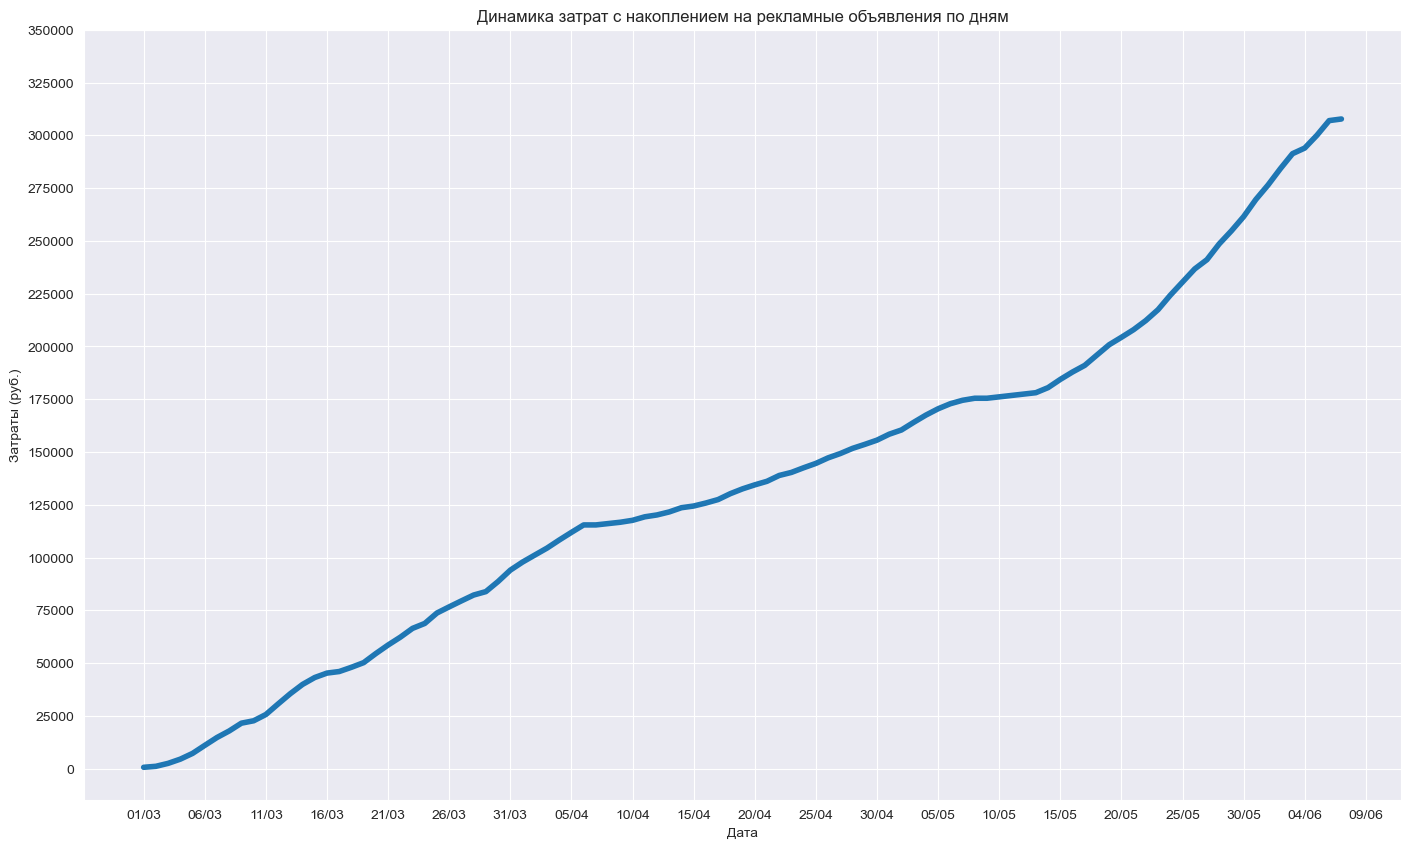

In [30]:
# посмотрим кумулятивный график затрат на рекламные кампании по дням
# зададим размер всей области отображения
plt.figure(figsize=(17, 10))

ax1 = sns.lineplot(
    data = results_per_date, 
    x = 'date', 
    y = 'cumulative_cost',
    linewidth = 4
)
ax1.set_title('Динамика затрат с накоплением на рекламные объявления по дням')
plt.xlabel('Дата')
plt.ylabel('Затраты (руб.)')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.yticks(np.arange(0, 350001, step=25000))

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('cost_cumul', dpi=600)

plt.show()

На фоне прочих метрик, кумулятивно затраты за весь период растут достаточно равномерно с небольшим увеличением в начале апреля и июня. Резких скачков не наблюдается, а суммарно за весь отчетный период на продвижение через РК было потрачено около 310000 руб.

### Промежуточные выводы
В качестве результата данного этапа мы можем резюмировать следующее:
- общий CTR с медианой за весь период 0,3% имеет волатильный характер в диапазоне от 0,1 до 0,75%;
- общий CTR достигает пикового значений за рассматриваемый период 10 марта (3%);
- общий CPC с медианой 40,9 руб. постепенно снижается от диапазона 50-90 руб. в марте до 10-30 руб. в мае-июне;
- существенный спад CPC фиксируется в конце апреля;
- общие показы рекламных объявлений с медианой в 17673 показов преимущественно держатся на уровне до 20000 показов;
- длительная положительная динамика в показах отмечается с конца апреля до начала июня с пиком в 220000 показов 2 июня;
- общие показатели кликов с медианой в 64 клика повторяют тренд показов, однако имеют тенденцию к росту с диапазона 20-80 кликов в марте на уровень 80-160 кликов на конец мая;
- в общих показателях кол-ва кликов наблюдается резкий положительный рост в период с середины мая до начала июня с пиком в 420 кликов, что повторяет положительную динамику по показам;
- затраты на рекламные кампании за весь период составляют около 310000 руб. с медианой в 2911 руб.;
- затраты повторяют тренды показов и кликов лишь частично: уровень 2000-4000 руб. с начала марта по начало апреля спускается на уровень 1000-3000 руб. до середины мая, где уже наблюдается синхронный с показами и кликами всплеск затрат на уровне 7000-8000 руб. к началу июня, а затем уровень затрат резко спадает на уровень около 1000 руб.

## 5. Маркетинговые показатели отдельных направлений продвижения
Теперь рассмотрим те же показатели, но в разрезе направлений продвижения. Для этого создадим новую таблицу.

In [31]:
# сгруппируем данные по дням и направлениям
dir_results_per_date = data.groupby(['date', 'direction'])[['shows', 'clicks', 'cost']].agg('sum').reset_index()
dir_results_per_date.head()

date         direction  shows  clicks     cost
0 2024-03-01  intensive_course   2187      21   649.10
1 2024-03-02  intensive_course   1722      17   475.87
2 2024-03-03  intensive_course   2195      30  1392.43
3 2024-03-04  intensive_course   2188      22  1811.83
4 2024-03-04      promo_course      3       1   189.38

In [32]:
# рассчитаем CTR и CPC
dir_results_per_date['ctr'] = ((dir_results_per_date['clicks'] / dir_results_per_date['shows'])*100).round(2)
dir_results_per_date['cpc'] = dir_results_per_date['cost'] / dir_results_per_date['clicks']

# заменим бесконечность на 0
dir_results_per_date = dir_results_per_date.replace([np.inf, -np.inf], np.nan)

# проверим результат
dir_results_per_date.head()

date         direction  shows  clicks     cost    ctr         cpc
0 2024-03-01  intensive_course   2187      21   649.10   0.96   30.909524
1 2024-03-02  intensive_course   1722      17   475.87   0.99   27.992353
2 2024-03-03  intensive_course   2195      30  1392.43   1.37   46.414333
3 2024-03-04  intensive_course   2188      22  1811.83   1.01   82.355909
4 2024-03-04      promo_course      3       1   189.38  33.33  189.380000

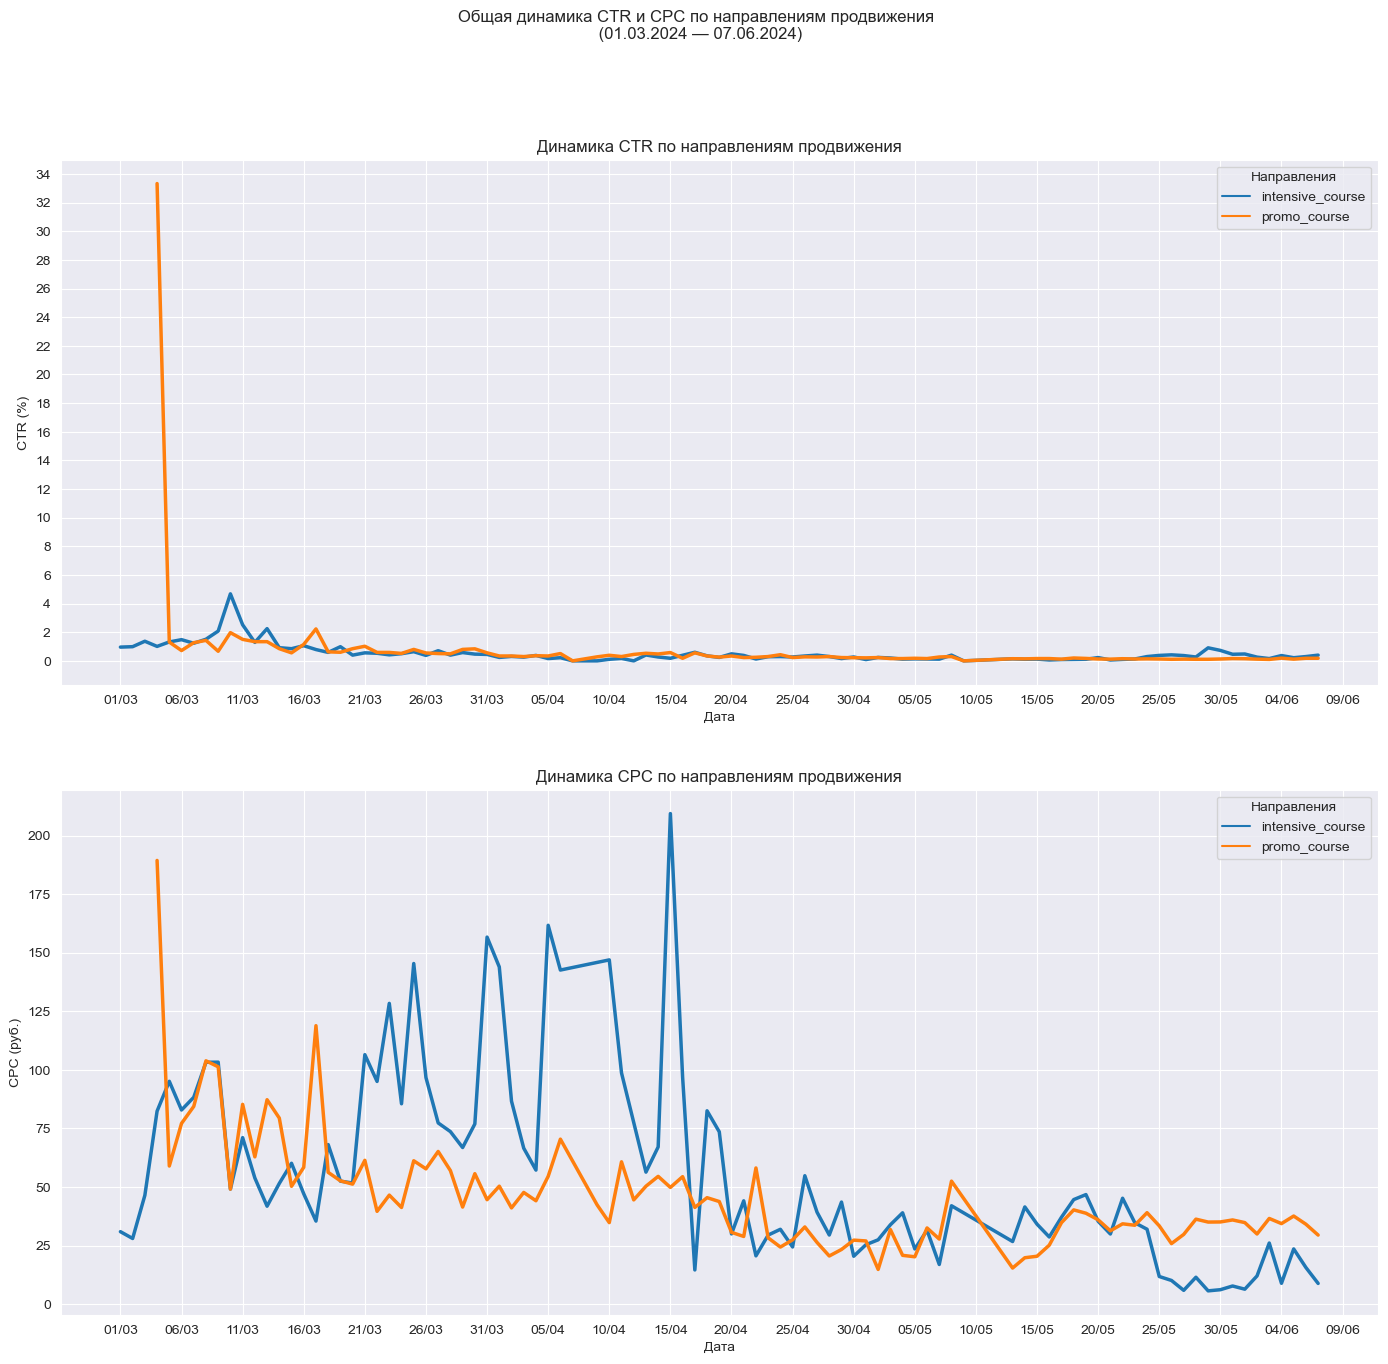

In [33]:
# визуализируем динамику метрик CTR и CPC в разрезе ноаправлений
# зададим размер всей области отображения
plt.figure(figsize=(17, 15))

# зададим общее название
plt.suptitle('Общая динамика CTR и CPC по направлениям продвижения \n (01.03.2024 — 07.06.2024)')

# посмотрим график CTR по дням
ax1 = plt.subplot(2, 1, 1)
ax1 = sns.lineplot(
    data = dir_results_per_date, 
    x = 'date', 
    y = 'ctr',
    hue = 'direction',
    linewidth = 2.5
)
ax1.set_title('Динамика CTR по направлениям продвижения')
plt.xlabel('Дата')
plt.ylabel('CTR (%)')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.yticks(np.arange(0, 34.1, step=2))
#plt.ylim(0, 10.1)
plt.legend(title='Направления')

# посмотрим график CPC по дням
ax2 = plt.subplot(2, 1, 2)
ax2 = sns.lineplot(
    data = dir_results_per_date, 
    x = 'date', 
    y = 'cpc',
    hue = 'direction',
    linewidth = 2.5
)
ax2.set_title('Динамика CPC по направлениям продвижения')
plt.xlabel('Дата')
plt.ylabel('CPC (руб.)')
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.legend(title='Направления')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('dir_ctr_cpc', dpi=600)

plt.show()

Большую часть рассматриваемого периода активно продвигались оба направления `intensive_course` и `promo_course`. Высокий старт CTR по направлению `promo_course` (>30%) к началу марта падает до уровня ниже 1% вплоть до начала июня. Похожим образом дело обстоит и с направлением `intensive_course`: CTR в начале марта держится на уровне 2% с пиком 10.03 в 5%. Далее CTR до начала июня так же держится на уровне ниже 1%.  
CPC по направлениям имеет достаточно волатильный характер: до середины марта метрика у направлений `intensive_course` и `promo_course` держится в диапазоне 25-125 руб. Если CPC по направлению `promo_course` постепенно уменьшается с уровня 50-125 руб. в начале марте, то уже далее до середины апреля уровень CPC снижается до 25-75 руб. и становится относительно стабильным вплоть до конца отчетного периода на уровне 25-50 руб. CPC по направлению `intensive_course` имеет крайне нестабильный характер: постепенное увеличение уровня метрики с 25-75 руб. в начале марта разрастается до уровня 50-150 руб. и достигает пика 15 апреля в CPC свыше 200 руб. Затем CPC по данному направлению резко спадает и до конца мая имеет диапазон 25-50 руб., а уже в июне CPC снижается на уровень до 30 руб.

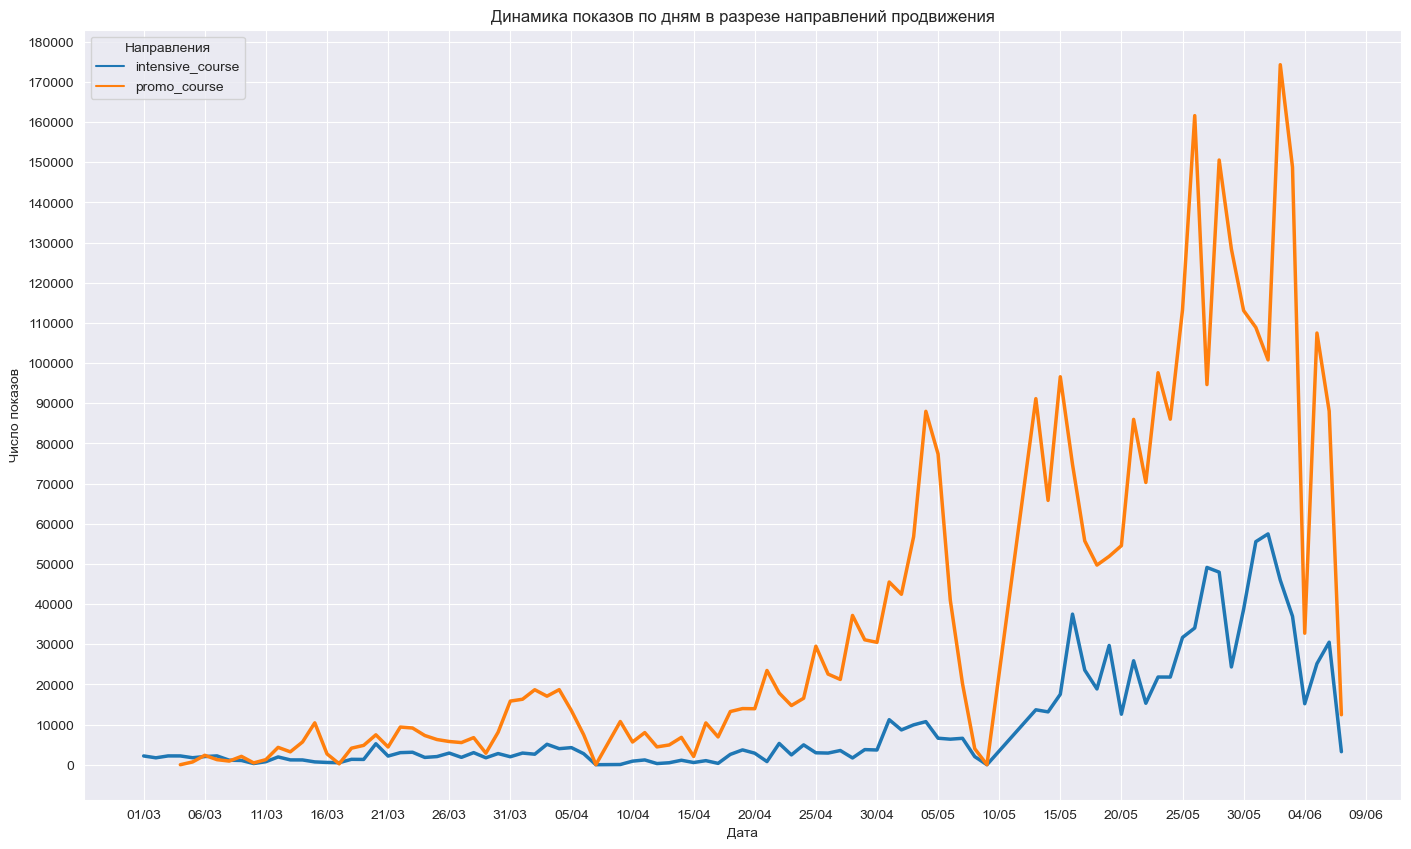

In [34]:
# посмотрим график показов по дням
# зададим размер всей области отображения
plt.figure(figsize=(17, 10))

ax1 = sns.lineplot(
    data = dir_results_per_date, 
    x = 'date', 
    y = 'shows',
    hue = 'direction',
    linewidth = 2.5
)
ax1.set_title('Динамика показов по дням в разрезе направлений продвижения')
plt.xlabel('Дата')
plt.ylabel('Число показов')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.yticks(np.arange(0, 180001, step=10000))
plt.legend(title='Направления')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('dir_shows', dpi=600)

plt.show()

Показы по направлениям `promo_course` и `intensive_course` весь март держатся до 10000 с небольшим всплеском в метрике до 20000 по направлению `promo_course` в конце марта и начале апреля. С середины апреля начинается постепенный рост показов до пиковых уровней для направлений: 175000 показов для `promo_course` и свыше 60000 показов для `intensive_course` в первых числах июня. Затем наблюдается резкий спад до уровня показов 0-10000 показов.

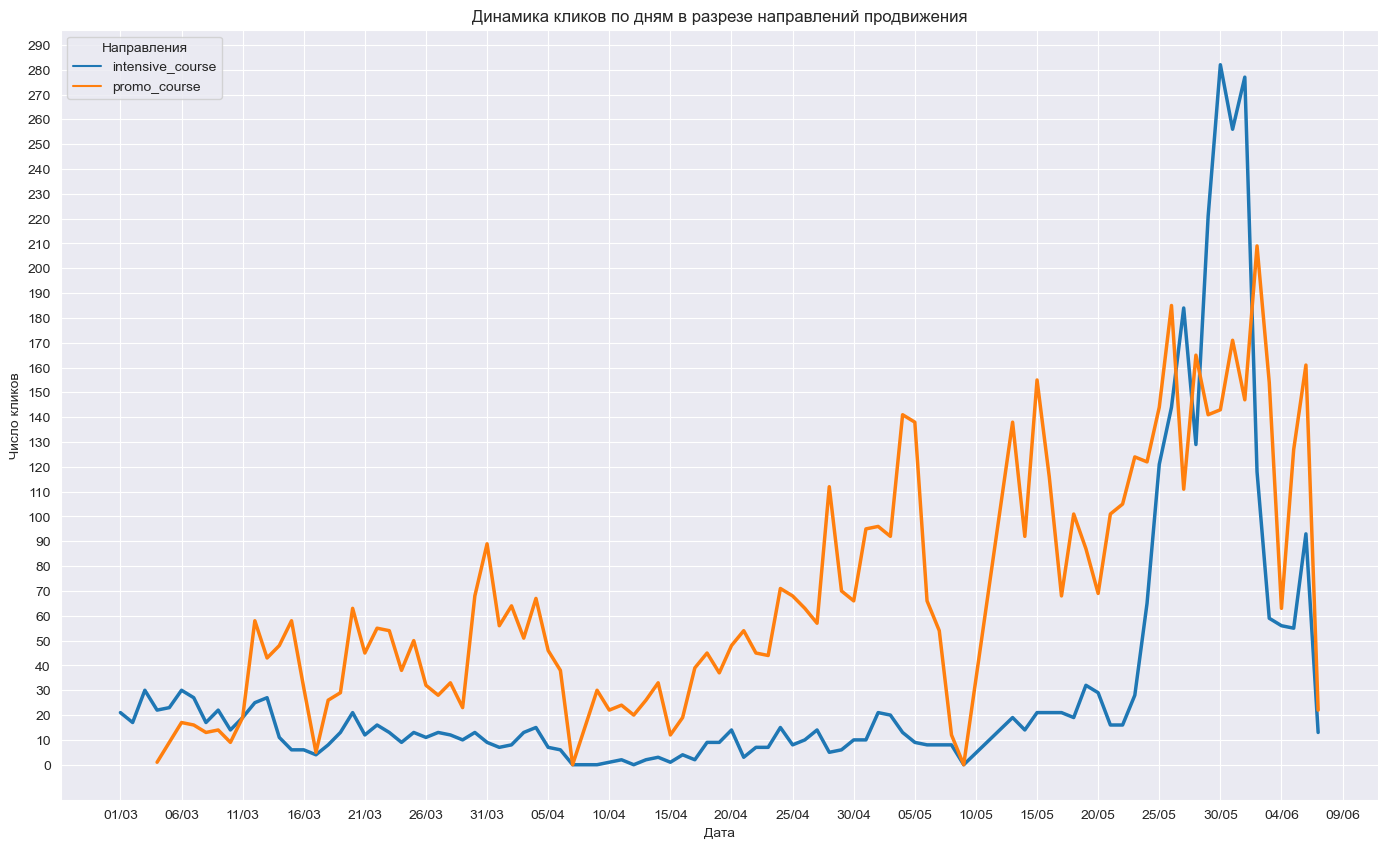

In [35]:
# посмотрим график кликов по дням в разрезе направлений
# зададим размер всей области отображения
plt.figure(figsize=(17, 10))

ax1 = sns.lineplot(
    data = dir_results_per_date, 
    x = 'date', 
    y = 'clicks',
    hue = 'direction',
    linewidth = 2.5
)
ax1.set_title('Динамика кликов по дням в разрезе направлений продвижения')
plt.xlabel('Дата')
plt.ylabel('Число кликов')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.yticks(np.arange(0, 291, step=10))
plt.legend(title='Направления')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('dir_clicks', dpi=600)

plt.show()

По количеству кликов мы наблюдаем следующие характеры трендов: по направлению `intensive_course` средний старт в начале марта на уровне 20-30 кликов сменяется постепенным снижением количества на уровень до 0-20 кликов до середины мая, а по направлению `promo_course` клики фиксируются с начала марта до середины апреля на уровне 20-70 кликов. С конца апреля уровень кликов по этому направлению увеличивается до 70-150 с пиком 210 на начало июня. По направлению `intensive_course` конец мая и начало июня показывает резкий скачок до значений 250-280 кликов. 

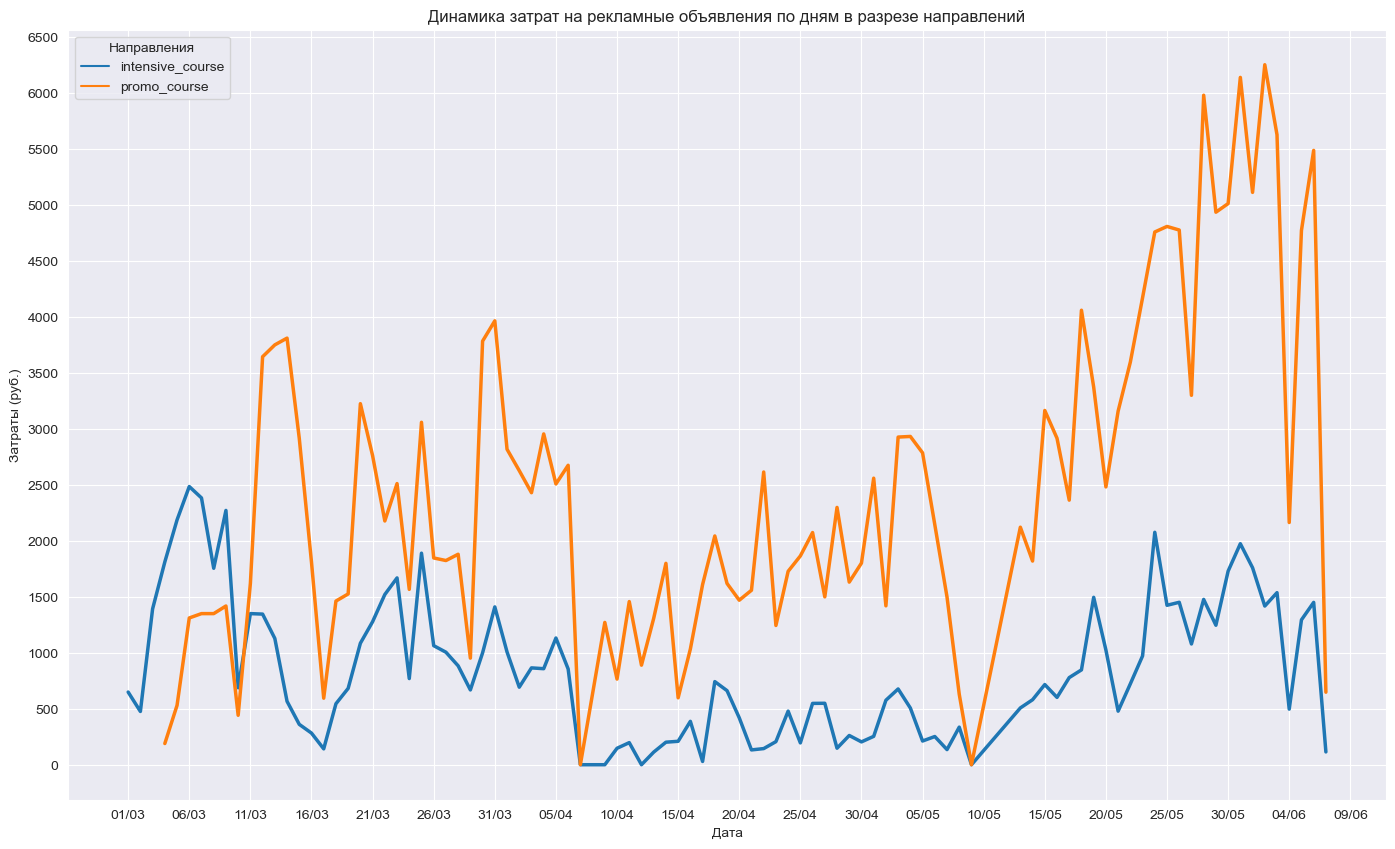

In [36]:
# посмотрим график затрат на рекламные объявления по дням в разрезе направлений
# зададим размер всей области отображения
plt.figure(figsize=(17, 10))

ax1 = sns.lineplot(
    data = dir_results_per_date, 
    x = 'date', 
    y = 'cost',
    hue = 'direction',
    linewidth = 2.5
)
ax1.set_title('Динамика затрат на рекламные объявления по дням в разрезе направлений')
plt.xlabel('Дата')
plt.ylabel('Затраты (руб.)')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.yticks(np.arange(0, 6501, step=500))
plt.legend(title='Направления')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('total_cost', dpi=600)

plt.show()

Затраты по направлениям `promo_course` и `intensive_course` характеризуются сильными скачками на разных временных отрезках. По направлению `promo_course` старт в марте достигает значений до 1500 руб., а затем выходит на уровень 1000-3000 до начала апреля с редкими скачками до 3500-4000 руб. По направлению `intensive_course` значения несколько ниже: в начале марта затраты варьируются от 500 до 2000 руб. с редкими пиками до 2500 руб. После резко спада затрат до 0 в начале апреля тренды по направлениям немного снижают свой уровень: по направлению `intensive_course` затраты держать до 1000 руб. с редкими превышениями в пределах 1000 руб., а по направлению `promo_course` уровень остается почти таким же - 1000-2500 руб. с превышениями до 3000 руб. В мае, когда показатели показов и кликов по обоим направлениям достигают пиковых значений, мы наблюдаем умеренный рост по направлению `intensive_course` до уровня 500-1500 руб. с редкими превышениями до 2000 руб., а также резкий скачок затрат по направлению `promo_course` с размахом 2500-5500 руб. и с пиками > 6000 руб.  
Рассматривая затраты, следует уделить внимание и эффекту, который дают более высокие затраты: при самых высоких затратах по направлению `promo_course` в мае (почти вдвое), только показы демонстрируют соразмерный рост, пока клики повысились лишь на четверть от прежних значений. В этом отношении эффект по соотношению затрат и кликов по направлению `intensive_course` выходит сильнее, т.к. при повышении затрат в 2 раза количество показов выросло соразмерно затратам, а количество кликов возросло в 10(!) раз.

### Промежуточные выводы
В качестве результата данного этапа мы можем резюмировать следующее:
- CTR по направлениям `promo_course` и `intensive_course` на протяжении большей части периода держится на уровне до 1%;
- CTR по направлению `promo_course` начал с аномально высокого показателя CTR свыше 32%, а затем упал до уровня 2% с постепенным падением на общий уровень до 1% к концу марта;
- CPC по направлениям `promo_course` и `intensive_course` до середины апреля имеет крайне волатильный характер с диапазоном 25-150 руб. по направлению `intensive_course` и с диапазоном 30-100 руб. по направлению `promo_course`;
- CPC по направлениям `promo_course` и `intensive_course` с середины апреля стабилизируется на уровне до 50 руб. по обоим направлениям;
- до мая показы по обоим направления `promo_course` и `intensive_course` держатся на уровне до 20000 показов, а в мае показы резко возрастают: по направлению `promo_course` показы достигают уровня 100000-170000 показов, а по направлению `intensive_course` - 20000-60000 показов;
- клики по направлениям `promo_course` и `intensive_course` до конца мая изменяются по-разному: по направлению `promo_course` фиксируется постепенный рост с уровня 20-60 в марте до уровня 70-130 кликов мае, пока по направлению `intensive_course` показы держатся на уровне до 20 показов;
- конец мая / начало июня по обоим направлениям отмечается увеличение кликов: резкий скачок по направлению `intensive_course` до уровня 250-280 кликов, и умеренный подъем по направлению `promo_course` до уровня 140-180 кликов;
- по затратам рекламные объявления в разных направлениях придерживаются разного уровня: по направлению `intensive_course` мартовский уровень в 500-2000 руб. в апреле и до середины мая сменяется уровнем до 500 руб.;
- по направлению `promo_course` мартовский уровень затрат 1000-3000 руб. сменяется уровнем 500-2500 руб. до начала мая;
- вторая половина мая демонстрирует самые высокие показатели затрат по обоим направлениям: умеренный подъем по направлению `intensive_course` на уровень 1000-2000 руб., и высокий скачок по направлению `promo_course` на уровень 5000-6000 руб.

## 6. Рекламные объявления и факторы их успешности
На данном этапе мы рассмотрим самые результативные объявления. Для этого мы составим несколько топов и попытаемся выявить факторы, которые ведут объявления к высоким показателям кликабельности и меньшему CPC, а также к высоким показам и кликам. Отдельно затраты рассмтаривать не будем, т.к. данная метрика во многом оценивается по результативности.  
Для этого создадим датафрейм `ads_data` с ключевыми метриками для рекламных объявлений.

In [37]:
# создадим датафрейм со всеми рекламными объявлениями и агрегируем их показатели, включая направление продвижения
ads_data = data.groupby('ad_id')[['shows', 'clicks', 'cost', 'direction']].agg(
    {'shows': 'sum', 'clicks': 'sum', 'cost': 'sum', 'direction': pd.Series.mode}).reset_index()

# добавим метрики CTR и CPC для каждого объявления
ads_data['ctr'] = ((ads_data['clicks'] / ads_data['shows'])*100).round(2)
ads_data['cpc'] = ads_data['cost'] / ads_data['clicks']

# заменим бесконечность на 0
ads_data = ads_data.replace([np.inf, -np.inf], np.nan)


# проверим результат
ads_data.head()

ad_id  shows  clicks   cost         direction   ctr    cpc
0  15880800053      4       0   0.00  intensive_course  0.00    NaN
1  15880800055     47       1  65.91  intensive_course  2.13  65.91
2  15880800057      2       0   0.00  intensive_course  0.00    NaN
3  15880800058      7       0   0.00  intensive_course  0.00    NaN
4  15880800060      5       0   0.00  intensive_course  0.00    NaN

In [38]:
# подготовим топ-20 объявлений по анализируемым переменным 
top_20_ctr = ads_data.sort_values(by='ctr', ascending=False)[:20].reset_index(drop=False) # сохраняем старую индексацию для дальнейшей фильтрации
top_20_cpc = ads_data.sort_values(by='cpc', ascending=True)[:20].reset_index(drop=False) # сортировка от меньшего, т.к. нас интересует меньший CPC
top_20_shows = ads_data.sort_values(by='shows', ascending=False)[:20].reset_index(drop=False)
top_20_clicks = ads_data.sort_values(by='clicks', ascending=False)[:20].reset_index(drop=False)

# проверим результат
display(top_20_ctr.head())
display(top_20_cpc.head())
display(top_20_shows.head())
display(top_20_clicks.head())

index        ad_id  shows  clicks   cost         direction    ctr    cpc
0     12  15880800069      4       1  45.40  intensive_course  25.00  45.40
1    330  15948297892      6       1  25.05      promo_course  16.67  25.05
2    362  15952370278      7       1  36.82      promo_course  14.29  36.82
3    114  15892965560      8       1  22.46  intensive_course  12.50  22.46
4    120  15892965566      8       1  51.34  intensive_course  12.50  51.34

index        ad_id  shows  clicks     cost         direction   ctr  \
0    612  16207114683   5168     141   202.45  intensive_course  2.73   
1    613  16207114684  26079     569  1178.69  intensive_course  2.18   
2    220  15917783853   1964       2     4.63  intensive_course  0.10   
3    608  16207114679   1561      37   107.60  intensive_course  2.37   
4    617  16207114688   6748      87   264.74  intensive_course  1.29   

        cpc  
0  1.435816  
1  2.071511  
2  2.315000  
3  2.908108  
4  3.042989

index        ad_id   shows  clicks     cost     direction   ctr        cpc
0    523  16006167270  223148     134  5854.90  promo_course  0.06  43.693284
1    504  15993715410  140030     150  5040.03  promo_course  0.11  33.600200
2    191  15917754162  127978     149  8851.94  promo_course  0.12  59.408993
3    537  16006167718  125349      71  2820.71  promo_course  0.06  39.728310
4    490  15993715396  119332     227  6665.94  promo_course  0.19  29.365374

index        ad_id   shows  clicks      cost         direction   ctr  \
0    613  16207114684   26079     569   1178.69  intensive_course  2.18   
1    251  15917784058   82179     274  11777.62      promo_course  0.33   
2    490  15993715396  119332     227   6665.94      promo_course  0.19   
3    610  16207114681   32803     206    838.52  intensive_course  0.63   
4    504  15993715410  140030     150   5040.03      promo_course  0.11   

         cpc  
0   2.071511  
1  42.984015  
2  29.365374  
3   4.070485  
4  33.600200

Теперь, когда данные основных метрик по рекламным объявлениям-лидерам готовы, мы можем выявить их наиболее типичные характеристики. Посмотрим на топ-20 объявлений по макcимальному CTR и минимальному CPC.

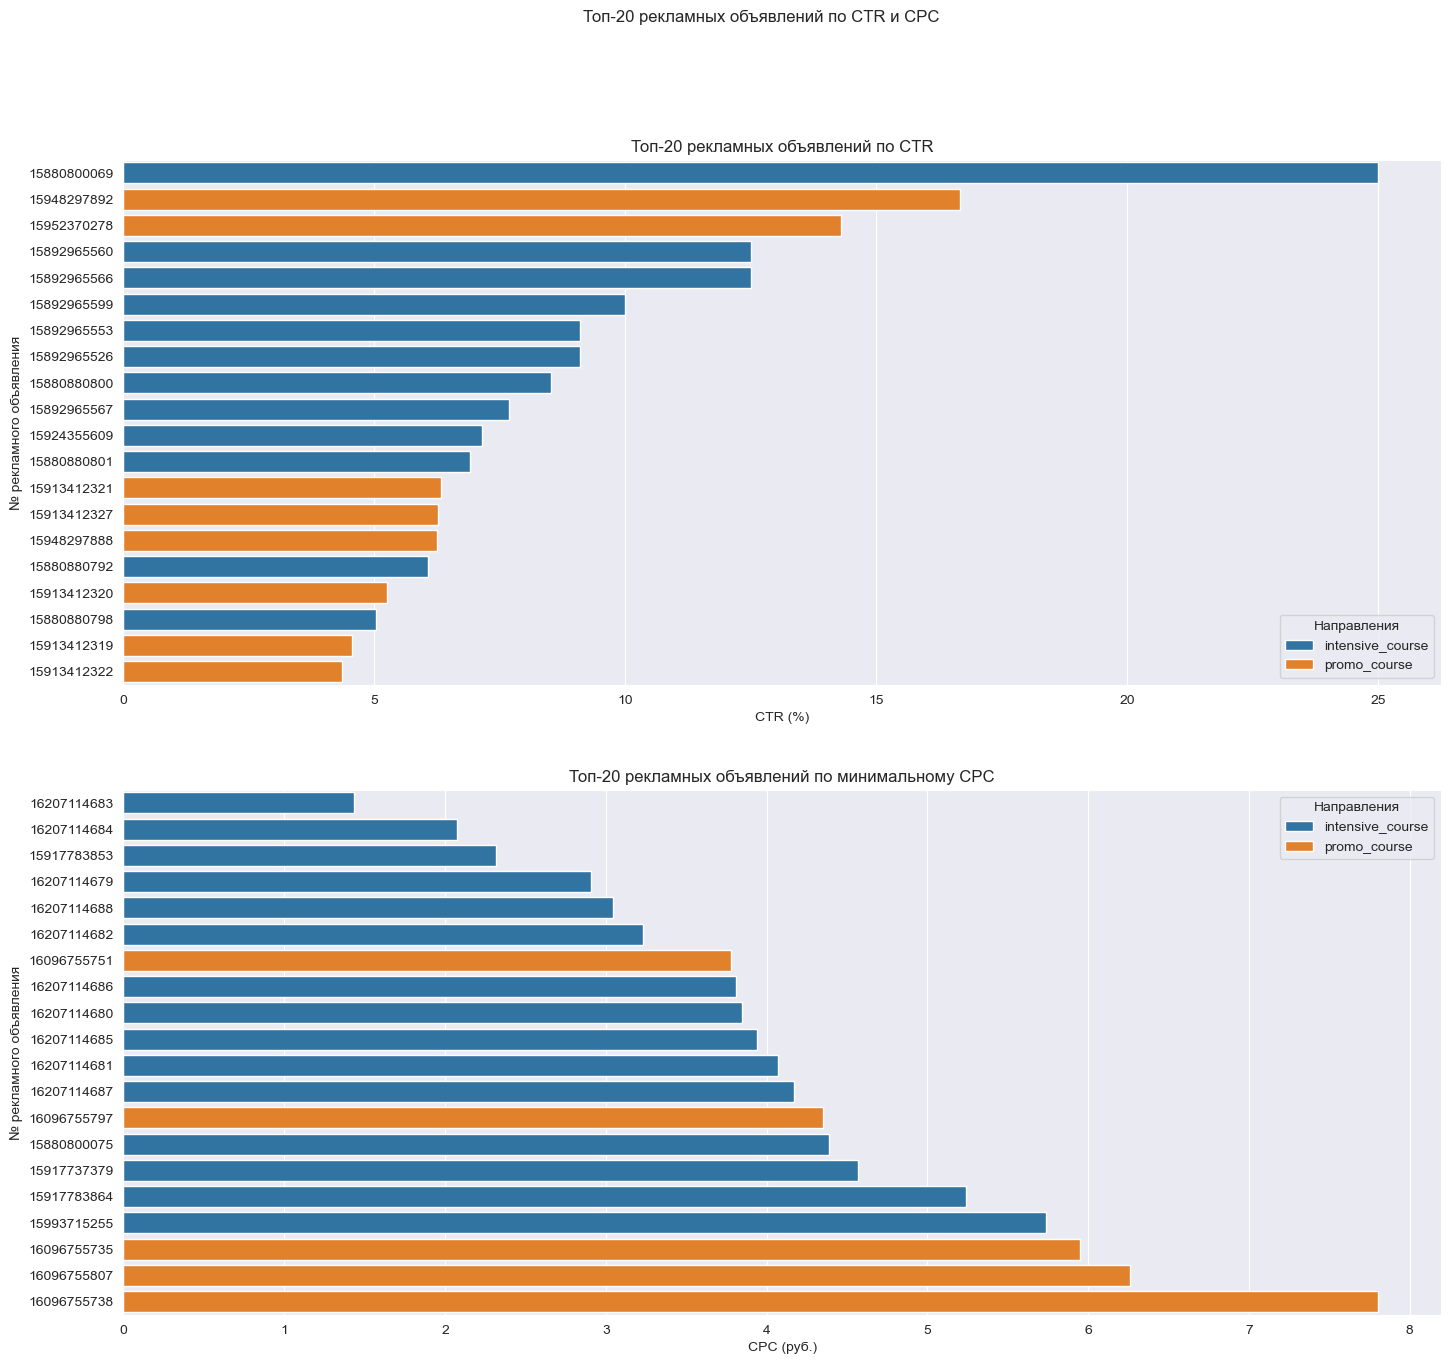

In [39]:
# построим топ-20 самых успешных рекламных объявлений по CTR и CPC
# зададим размер всей области отображения
plt.figure(figsize=(17, 15))

# зададим общее название
plt.suptitle('Топ-20 рекламных объявлений по CTR и CPC')

# зададим порядок
hue_order=top_20_ctr['direction'].unique()

# посмотрим топ-20 по CTR
ax1 = plt.subplot(2, 1, 1)
ax1 = sns.barplot(
    data = top_20_ctr,
    x = 'ctr', 
    y = 'ad_id', 
    hue = 'direction',
    orient = 'h',
    dodge = False,
    order = top_20_ctr['ad_id'],
    hue_order = hue_order
)
ax1.set_title('Топ-20 рекламных объявлений по CTR')
plt.xlabel('CTR (%)')
plt.ylabel('№ рекламного объявления')
plt.legend(title='Направления')
plt.xticks(np.arange(0, 26, step=5))

# посмотрим топ-20 по CPC
ax2 = plt.subplot(2, 1, 2)
ax2 = sns.barplot(
    data = top_20_cpc,
    x = 'cpc', 
    y = 'ad_id', 
    hue = 'direction',
    orient = 'h',
    dodge = False,
    order = top_20_cpc['ad_id'],
    hue_order = hue_order
)
ax2.set_title('Топ-20 рекламных объявлений по минимальному CPC')
plt.xlabel('CPC (руб.)')
plt.ylabel('№ рекламного объявления')
plt.legend(title='Направления')
plt.xticks(np.arange(0, 8.1, step=1))

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('top20_ctr_cpc', dpi=600)

plt.show()

Как мы видим, наиболее высокие показатели CTR наблюдаются преимущественно у объявлений по направлению `intensive_course` с лидером по показателю в 25%. По CPC самый низкий результат по направлению `promo_course` (~1,5 руб.).
Так же визуализируем лидеров по показам и кликам.

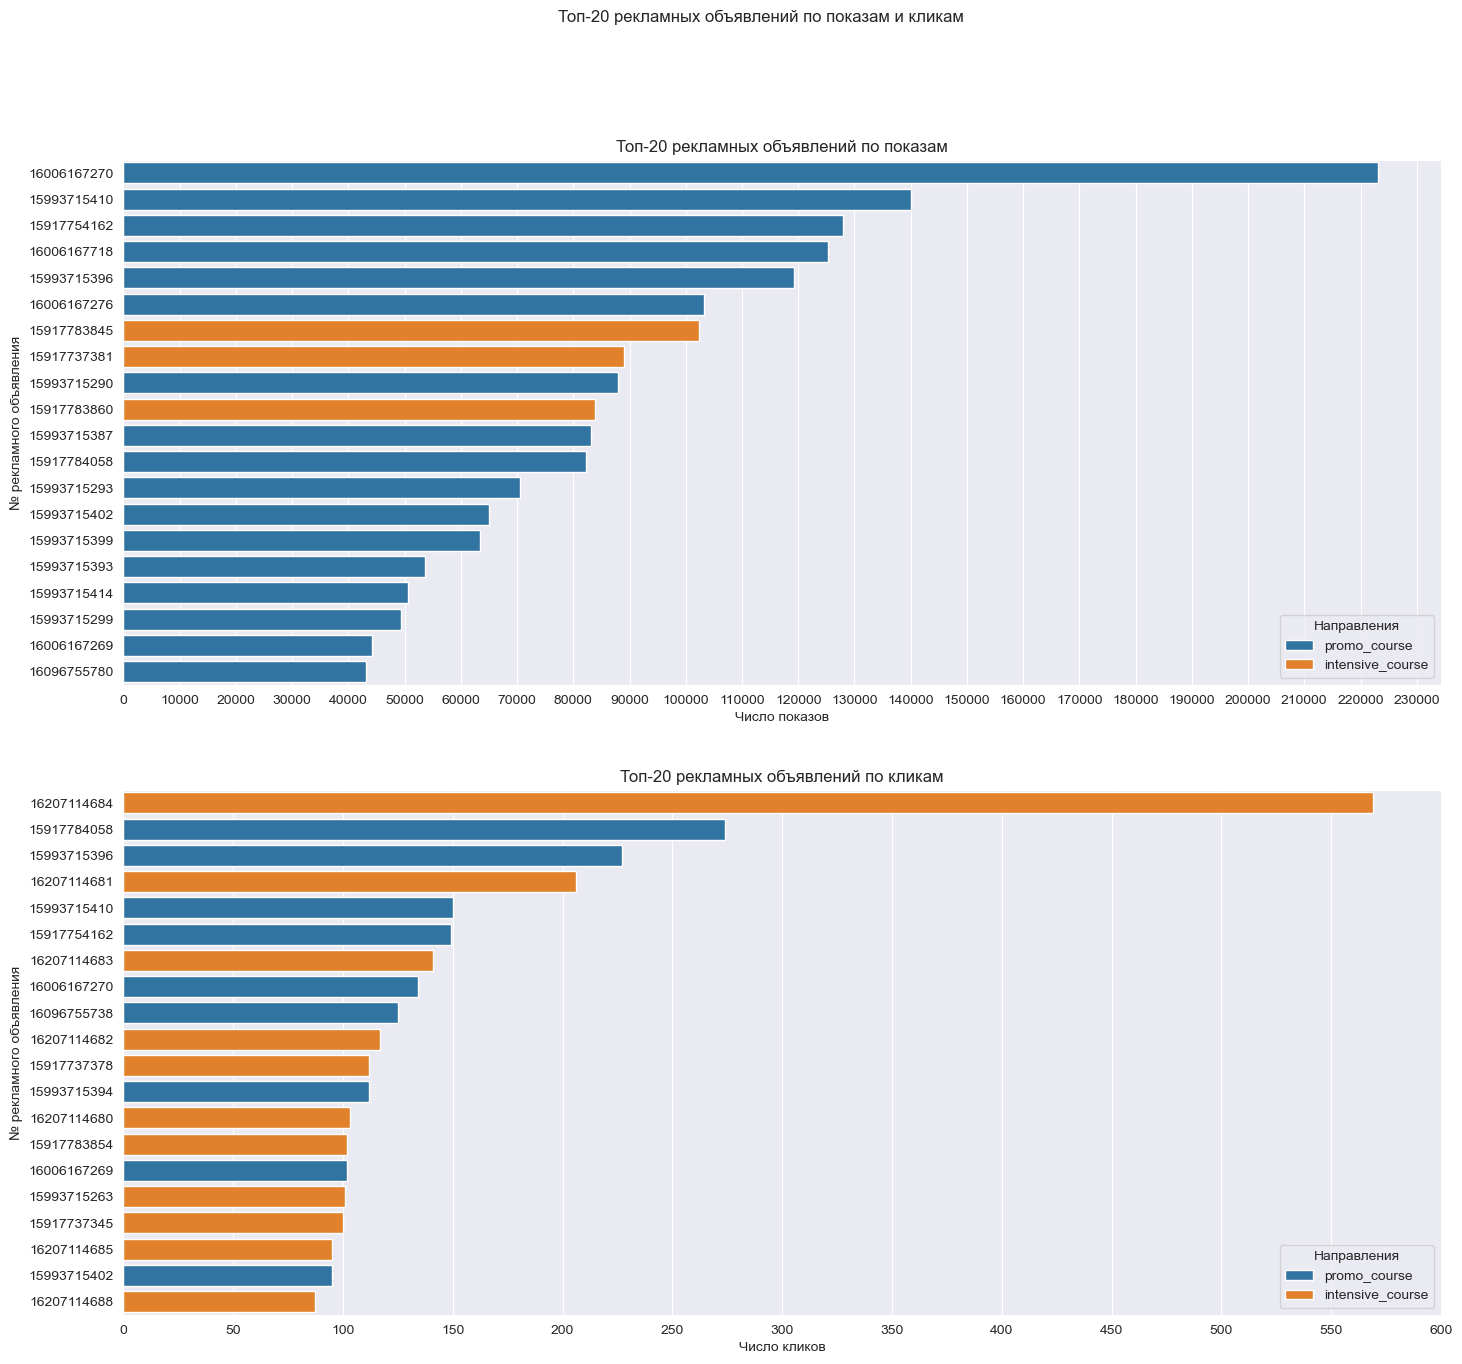

In [40]:
# построим топ-20 самых успешных рекламных объявлений по показам и кликам
# зададим размер всей области отображения
plt.figure(figsize=(17, 15))

# зададим общее название
plt.suptitle('Топ-20 рекламных объявлений по показам и кликам')

# зададим порядок
hue_order=top_20_shows['direction'].unique()

# посмотрим топ-20 по CTR
ax1 = plt.subplot(2, 1, 1)
ax1 = sns.barplot(
    data = top_20_shows,
    x = 'shows', 
    y = 'ad_id', 
    hue = 'direction',
    orient = 'h',
    dodge = False,
    order = top_20_shows['ad_id'],
    hue_order = hue_order
)
ax1.set_title('Топ-20 рекламных объявлений по показам')
plt.xlabel('Число показов')
plt.ylabel('№ рекламного объявления')
plt.legend(title='Направления')
plt.xticks(np.arange(0, 230001, step=10000))

# посмотрим топ-20 по кликам
ax2 = plt.subplot(2, 1, 2)
ax2 = sns.barplot(
    data = top_20_clicks,
    x = 'clicks', 
    y = 'ad_id', 
    hue = 'direction',
    orient = 'h',
    dodge = False,
    order = top_20_clicks['ad_id'],
    hue_order = hue_order
)
ax2.set_title('Топ-20 рекламных объявлений по кликам')
plt.xlabel('Число кликов')
plt.ylabel('№ рекламного объявления')
plt.legend(title='Направления')
plt.xticks(np.arange(0, 601, step=50))

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('top20_shows_clicks', dpi=600)

plt.show()

Как мы видим, по показам и кликам направления отличаются почти симметрично: по показам большая часть лидирующих объявлений относятся к направлению `promo_course`, пока по кликам большая часть лидеров принадлежат направлению `intensive_course`.
Отберем данные из исходного датафрейма с индексами объявлений-лидеров.

In [41]:
# отфильтруем данные по объявлениям с самыми низкими CPC и самыми высокими CTR в отдельные датафреймы
best_ctr_data = data[data.index.isin(top_20_ctr['index'])]
best_cpc_data = data[data.index.isin(top_20_cpc['index'])]
best_shows_data = data[data.index.isin(top_20_shows['index'])]
best_clicks_data = data[data.index.isin(top_20_clicks['index'])]

# проверим результат
display(best_ctr_data.head(2))
display(best_cpc_data.head(2))
display(best_shows_data.head(2))
display(best_clicks_data.head(2))

date   compaign  compaign_id      group    group_id        ad_id  \
12 2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965527   
69 2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965551   

           target ad_platform            os      sex        age  shows  \
12  autotargeting       поиск  не определен  женский  старше 55      2   
69  autotargeting       поиск       Android  мужской  старше 55      1   

    clicks  cost         direction  
12       0   0.0  intensive_course  
69       0   0.0  intensive_course

date   compaign  compaign_id      group    group_id        ad_id  \
18  2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965527   
177 2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965576   

            target ad_platform            os      sex    age  shows  clicks  \
18   autotargeting       поиск       Android  женский  35-44      4       0   
177  autotargeting       поиск  не определен  мужской  45-54      1       0   

     cost         direction  
18    0.0  intensive_course  
177   0.0  intensive_course

date   compaign  compaign_id      group    group_id        ad_id  \
179 2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965576   
191 2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965576   

            target ad_platform            os      sex        age  shows  \
179  autotargeting       поиск  не определен  женский      35-44      1   
191  autotargeting       поиск       Android  женский  старше 55      8   

     clicks  cost         direction  
179       0   0.0  intensive_course  
191       0   0.0  intensive_course

date   compaign  compaign_id      group    group_id        ad_id  \
167 2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965574   
176 2024-03-01  eng1_paid    107849000  eng1_paid  5408843157  15892965576   

            target ad_platform            os      sex    age  shows  clicks  \
167  autotargeting        сети  не определен  мужской  25-34      1       0   
176  autotargeting       поиск  не определен  мужской  35-44      1       0   

     cost         direction  
167   0.0  intensive_course  
176   0.0  intensive_course

Подготовив данные для выявления факторов успеха рекламных объявлений (высокие показы, клики, CTR и низкий CPC), мы можем посмотреть, как распределены представленные переменные в каждой из лидирующих групп (датафреймов выше).

### 6.1. Фактор таргета рекламных объявлений
Посмотрим, какой таргетинг наиболее частотен среди лидеров по анализируемым метрикам (CTR, CPC, клики и показы). Поскольку объявления-лидеры могут иметь один и тот же номер с разными целевыми признаками, мы будем считать количество всех объявлений, а не количество уникальных.

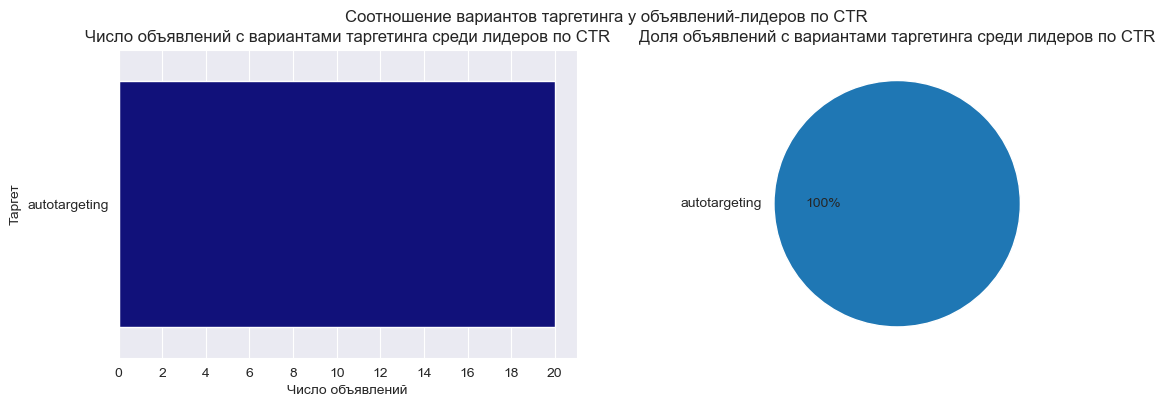

In [42]:
# посчитаем, сколько объявлений приходится на тот или иной тип таргета
ctr_target_pivot = best_ctr_data.pivot_table(
    index = 'target',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(13, 4))

# зададим общее название
plt.suptitle('Соотношение вариантов таргетинга у объявлений-лидеров по CTR')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = ctr_target_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'target',
    color = 'darkblue'
)
ax1.set_title('Число объявлений с вариантами таргетинга среди лидеров по CTR')
plt.xlabel('Число объявлений')
plt.ylabel('Таргет')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(ctr_target_pivot['ad_id'], labels=ctr_target_pivot['target'], autopct='%1.0f%%')
plt.title('Доля объявлений с вариантами таргетинга среди лидеров по CTR')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('ctr_target_share', dpi=600)

plt.show()

Все объявления имеют автотаргетинг. Дополним наши наблюдения лидерами по CPC.

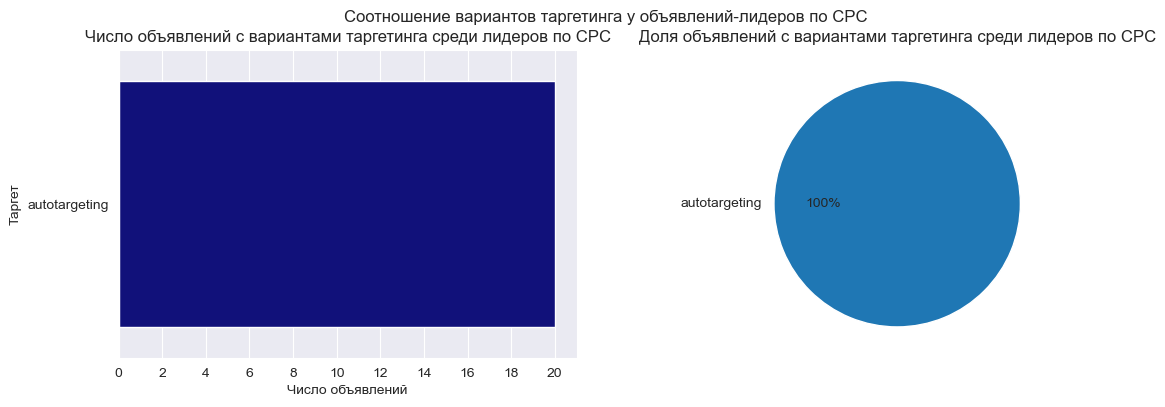

In [43]:
# посчитаем, сколько объявлений приходится на тот или иной тип таргета
cpc_target_pivot = best_cpc_data.pivot_table(
    index = 'target',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(13, 4))

# зададим общее название
plt.suptitle('Соотношение вариантов таргетинга у объявлений-лидеров по CPC')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = cpc_target_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'target',
    color = 'darkblue'
)
ax1.set_title('Число объявлений с вариантами таргетинга среди лидеров по CPC')
plt.xlabel('Число объявлений')
plt.ylabel('Таргет')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(cpc_target_pivot['ad_id'], labels=cpc_target_pivot['target'], autopct='%1.0f%%')
plt.title('Доля объявлений с вариантами таргетинга среди лидеров по CPC')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('cpc_target_share', dpi=600)

plt.show()

Относительно CPC мы также наблюдаем абсолютное использование варианта таргета `autotargeting`.  
Посмотрим теперь, какой таргетинг доминирует по показам и кликам.

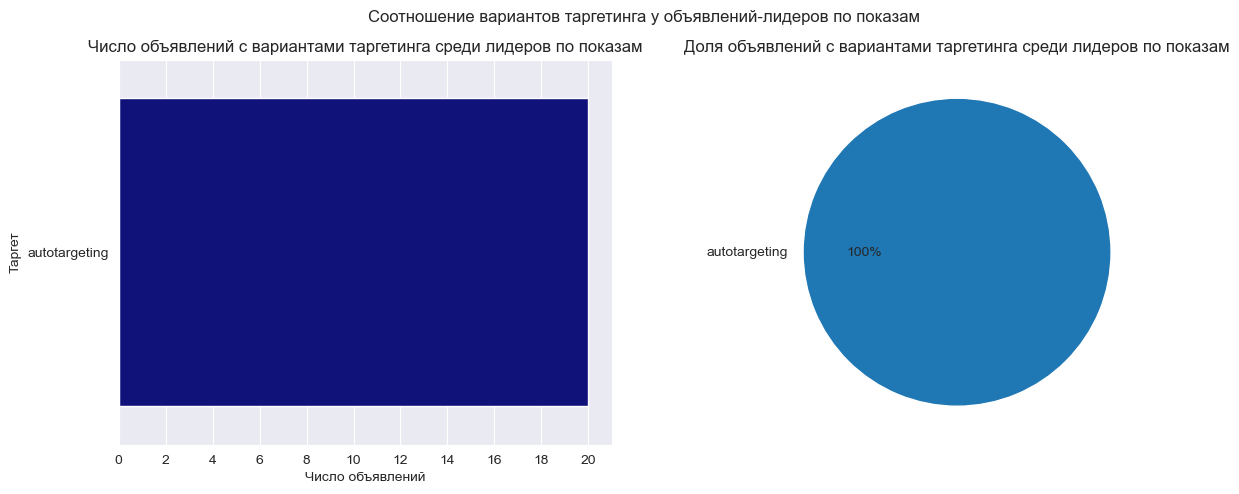

In [44]:
# посчитаем, сколько объявлений приходится на тот или иной тип таргета
shows_target_pivot = best_shows_data.pivot_table(
    index = 'target',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(14, 5))

# зададим общее название
plt.suptitle('Соотношение вариантов таргетинга у объявлений-лидеров по показам')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = shows_target_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'target',
    color = 'darkblue'
)
ax1.set_title('Число объявлений с вариантами таргетинга среди лидеров по показам')
plt.xlabel('Число объявлений')
plt.ylabel('Таргет')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(shows_target_pivot['ad_id'], labels=shows_target_pivot['target'], autopct='%1.0f%%')
plt.title('Доля объявлений с вариантами таргетинга среди лидеров по показам')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('shows_target_share', dpi=600)

plt.show()

Результат такой же: все объявления, лидирующие по показам, имеют автотаргетинг. И завершим обзор фактора таргетинга кликами.

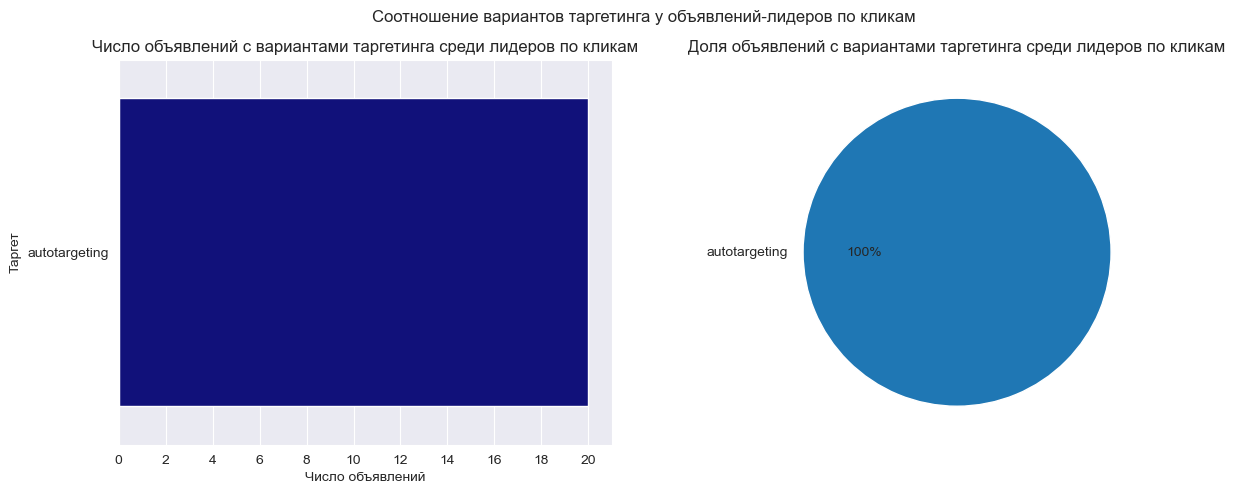

In [45]:
# посчитаем, сколько объявлений приходится на тот или иной тип таргета
clicks_target_pivot = best_clicks_data.pivot_table(
    index = 'target',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(14, 5))

# зададим общее название
plt.suptitle('Соотношение вариантов таргетинга у объявлений-лидеров по кликам')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = clicks_target_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'target',
    color = 'darkblue'
)
ax1.set_title('Число объявлений с вариантами таргетинга среди лидеров по кликам')
plt.xlabel('Число объявлений')
plt.ylabel('Таргет')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(clicks_target_pivot['ad_id'], labels=clicks_target_pivot['target'], autopct='%1.0f%%')
plt.title('Доля объявлений с вариантами таргетинга среди лидеров по кликам')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('clicks_target_share', dpi=600)

plt.show()

Объявления, лидирующие по кликам, не отличаются по таргетингу от прочих лидеров: все объявления имеют автотаргетинг.  
Таким образом, мы можем утверждать, что автотаргетинг положительно влияет на метрики, а точнее то, что он выполняет в полной мере выполняет свою функцию. Более того, автотаргетинг достаточно распространен в датафрейме, поэтому выделять данную переменную как отличительную не следует.  
Теперь рассмотрим фактор платформы рекламных объявлений.

### 6.2. Фактор платформы
Посмотрим, какие платформы рекламных объявлений встречаются чаще всего среди лидеров по рассматриваемым метрикам.

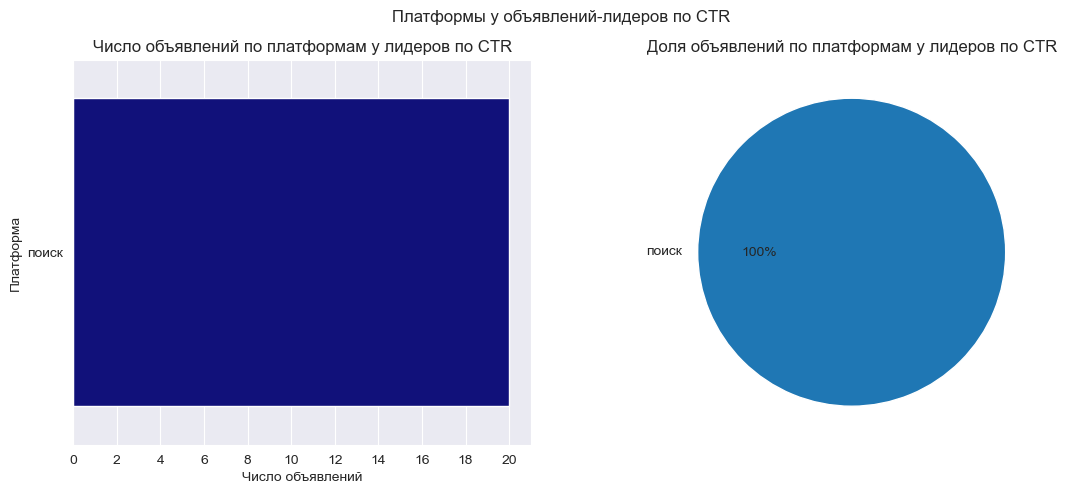

In [46]:
# посчитаем, сколько объявлений приходится на ту или иную платформу
ctr_platform_pivot = best_ctr_data.pivot_table(
    index = 'ad_platform',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(13, 5))

# зададим общее название
plt.suptitle('Платформы у объявлений-лидеров по CTR')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = ctr_platform_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'ad_platform',
    color = 'darkblue'
)
ax1.set_title('Число объявлений по платформам у лидеров по CTR')
plt.xlabel('Число объявлений')
plt.ylabel('Платформа')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(ctr_platform_pivot['ad_id'], labels=ctr_platform_pivot['ad_platform'], autopct='%1.0f%%')
plt.title('Доля объявлений по платформам у лидеров по CTR')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('ctr_platform_share', dpi=600)

plt.show()

Среди наиболее успешных объявлений по CTR 100% продвигались в поиске. Дополним наблюдения по CPC.

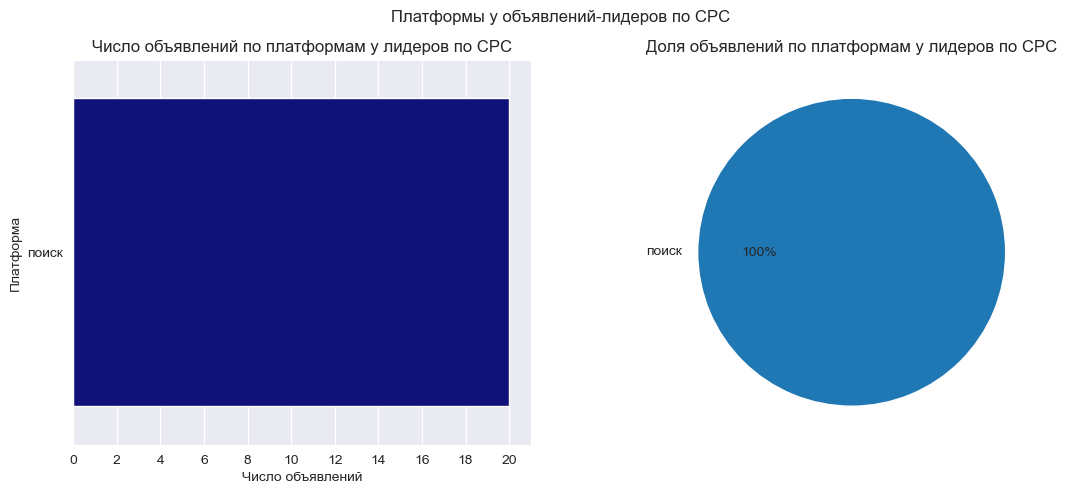

In [47]:
# посчитаем, сколько уникальных объявлений приходится на ту или иную платформу
cpc_platform_pivot = best_cpc_data.pivot_table(
    index = 'ad_platform',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(13, 5))

# зададим общее название
plt.suptitle('Платформы у объявлений-лидеров по CPC')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = cpc_platform_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'ad_platform',
    color = 'darkblue'
)
ax1.set_title('Число объявлений по платформам у лидеров по CPC')
plt.xlabel('Число объявлений')
plt.ylabel('Платформа')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(cpc_platform_pivot['ad_id'], labels=cpc_platform_pivot['ad_platform'], autopct='%1.0f%%')
plt.title('Доля объявлений по платформам у лидеров по CPC')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('cpc_target_share', dpi=600)

plt.show()

Среди объявлений у лидеров по CPC также все продвигались по поиску.    
Дополним обзор по платформам показами и кликами.

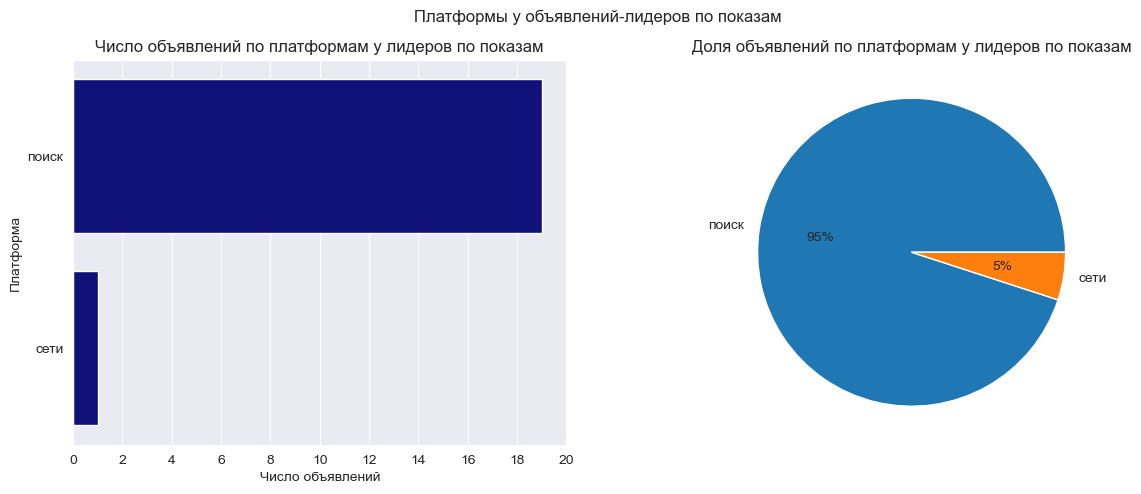

In [48]:
# посчитаем, сколько объявлений приходится на ту или иную платформу
shows_platform_pivot = best_shows_data.pivot_table(
    index = 'ad_platform',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(14, 5))

# зададим общее название
plt.suptitle('Платформы у объявлений-лидеров по показам')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = shows_platform_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'ad_platform',
    color = 'darkblue'
)
ax1.set_title('Число объявлений по платформам у лидеров по показам')
plt.xlabel('Число объявлений')
plt.ylabel('Платформа')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(shows_platform_pivot['ad_id'], labels=shows_platform_pivot['ad_platform'], autopct='%1.0f%%')
plt.title('Доля объявлений по платформам у лидеров по показам')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('shows_platform_share', dpi=600)

plt.show()

Относительно показов продвижение в поиске также наиболее распространено, однако 1 объявление среди лидеров по показам приходится на сети.
Рассмотрим, как представлены среди объявлений платформы по кликам.

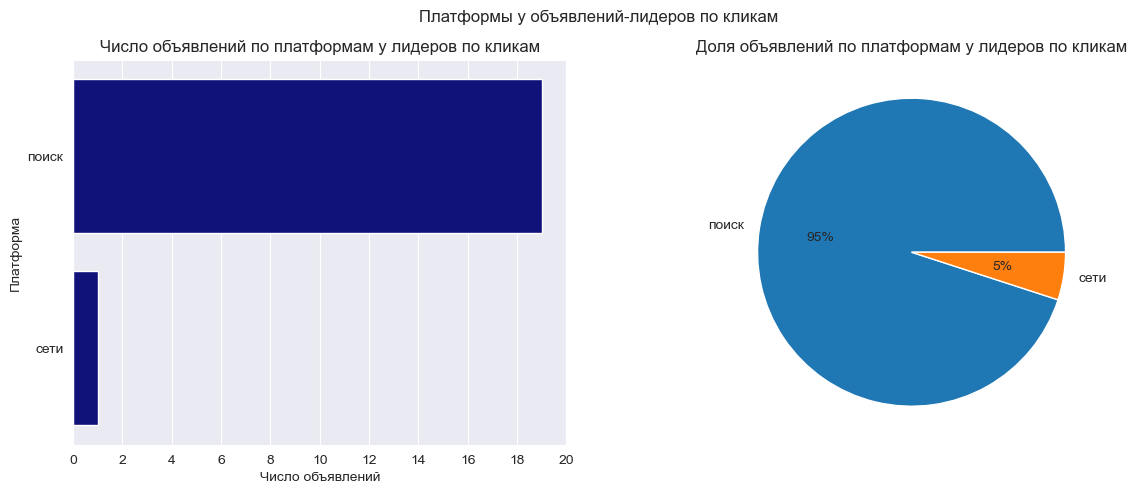

In [49]:
# посчитаем, сколько объявлений приходится на ту или иную платформу
clicks_platform_pivot = best_clicks_data.pivot_table(
    index = 'ad_platform',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(14, 5))

# зададим общее название
plt.suptitle('Платформы у объявлений-лидеров по кликам')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = clicks_platform_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'ad_platform',
    color = 'darkblue'
)
ax1.set_title('Число объявлений по платформам у лидеров по кликам')
plt.xlabel('Число объявлений')
plt.ylabel('Платформа')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(clicks_platform_pivot['ad_id'], labels=clicks_platform_pivot['ad_platform'], autopct='%1.0f%%')
plt.title('Доля объявлений по платформам у лидеров по кликам')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('clicks_platform_share', dpi=600)

plt.show()

Продвижение в поиске более распространено у лидирующих по кликам объявлений: 95% против 5% в сетях.  
Таким образом, продвижение в поисковой выдаче более предпочтительно для большей результативности рекламных объявлений по всем метрикам.  
Теперь рассмотрим, какие устройства преобладают у рекламных объявлений.

### 6.3. Фактор устройства (операционной системы)
Посмотрим, какие устройства наиболее распространены среди объявлений-лидеров по рассматриваемым метрикам.

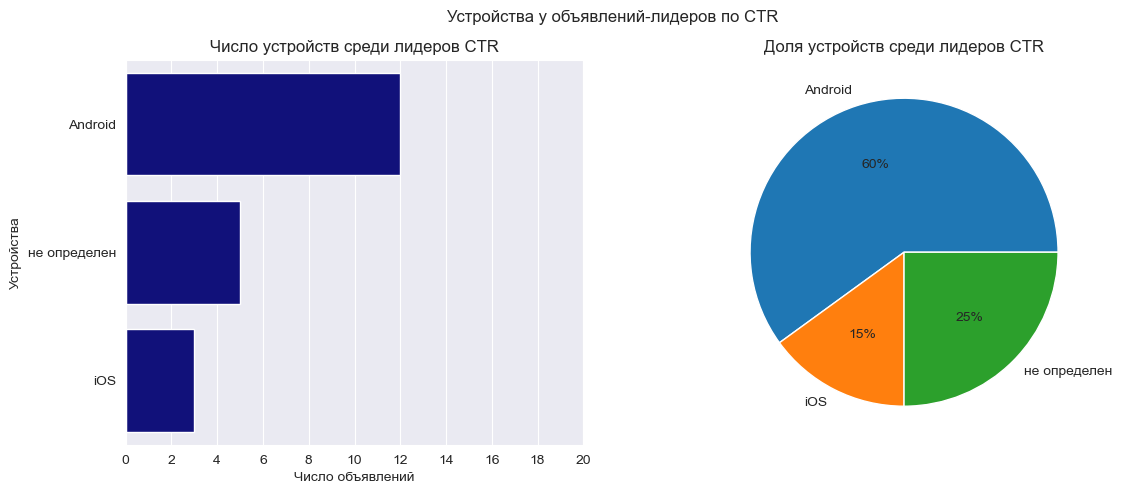

In [50]:
# посчитаем, сколько уникальных объявлений приходится на те или иные устройства
ctr_os_pivot = best_ctr_data.pivot_table(
    index = 'os',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(13, 5))

# зададим общее название
plt.suptitle('Устройства у объявлений-лидеров по CTR')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = ctr_os_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'os',
    color = 'darkblue'
)
ax1.set_title('Число устройств среди лидеров CTR')
plt.xlabel('Число объявлений')
plt.ylabel('Устройства')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(ctr_os_pivot['ad_id'], labels=ctr_os_pivot['os'], autopct='%1.0f%%')
plt.title('Доля устройств среди лидеров CTR')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('ctr_os_share', dpi=600)

plt.show()

Среди объявлений-лидеров по CTR наблюдается преобладание Android-устройств (60%), пока iOS-устрйоства занимают лишь 15% от всех лидирующих по CTR объявлений. Четверть от всех устройств относятся к неизвестным. Следовательно, по CTR предпочтительно ориентироваться на Android-устрйоства.  
Дополним наблюдениями по CPC.

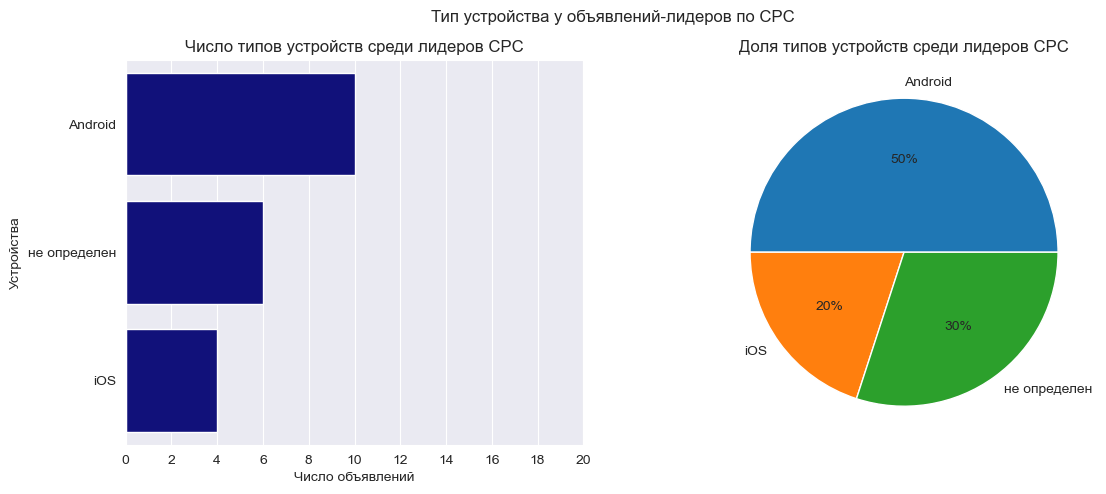

In [51]:
# посчитаем, сколько уникальных объявлений приходится на те или иные устройства
cpc_os_pivot = best_cpc_data.pivot_table(
    index = 'os',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(13, 5))

# зададим общее название
plt.suptitle('Тип устройства у объявлений-лидеров по CPC')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = cpc_os_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'os',
    color = 'darkblue'
)
ax1.set_title('Число типов устройств среди лидеров CPC')
plt.xlabel('Число объявлений')
plt.ylabel('Устройства')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(cpc_os_pivot['ad_id'], labels=cpc_os_pivot['os'], autopct='%1.0f%%')
plt.title('Доля типов устройств среди лидеров CPC')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('cpc_os_share', dpi=600)

plt.show()

Относительно лидеров по CPC мы наблюдаем схожее распределение долей: половина приходится на Android-устройства, 30% - на неизвестные, и 20% - на iOS. Большее распространение опять же наблюдается у Android.  
Дополним наблюдения показами и кликами.

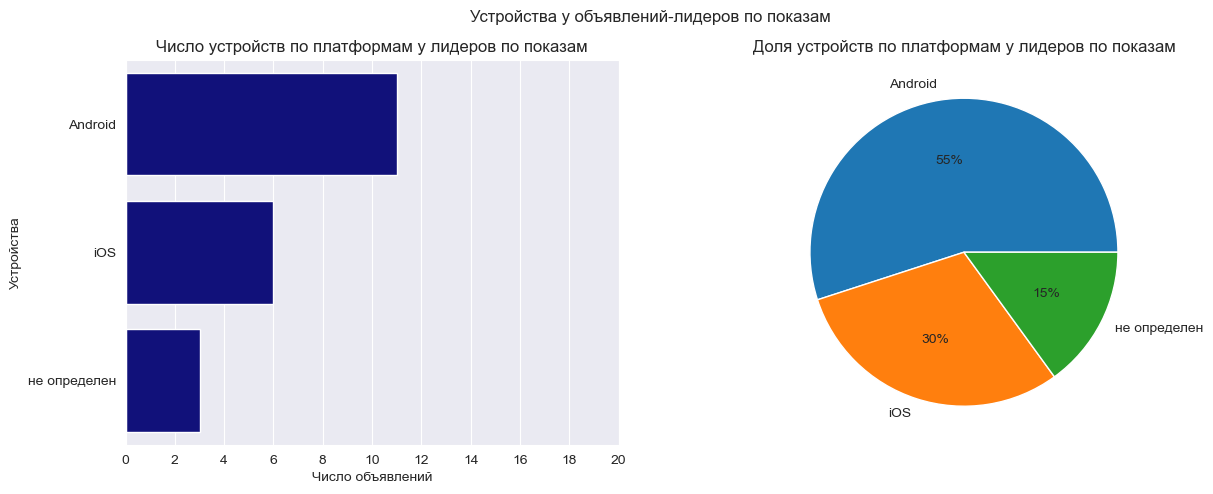

In [52]:
# посчитаем, сколько объявлений приходится на те или иные устройства
shows_os_pivot = best_shows_data.pivot_table(
    index = 'os',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(14, 5))

# зададим общее название
plt.suptitle('Устройства у объявлений-лидеров по показам')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = shows_os_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'os',
    color = 'darkblue'
)
ax1.set_title('Число устройств по платформам у лидеров по показам')
plt.xlabel('Число объявлений')
plt.ylabel('Устройства')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(shows_os_pivot['ad_id'], labels=shows_os_pivot['os'], autopct='%1.0f%%')
plt.title('Доля устройств по платформам у лидеров по показам')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('shows_os_share', dpi=600)

plt.show()

Как мы видим, среди лидирующих по показам объявлений больше всех распространены Android-устройства (55%), пока 30% от всех занимают iOS-устройства. Оставшиеся 15% приходятся на не определенные устройства.

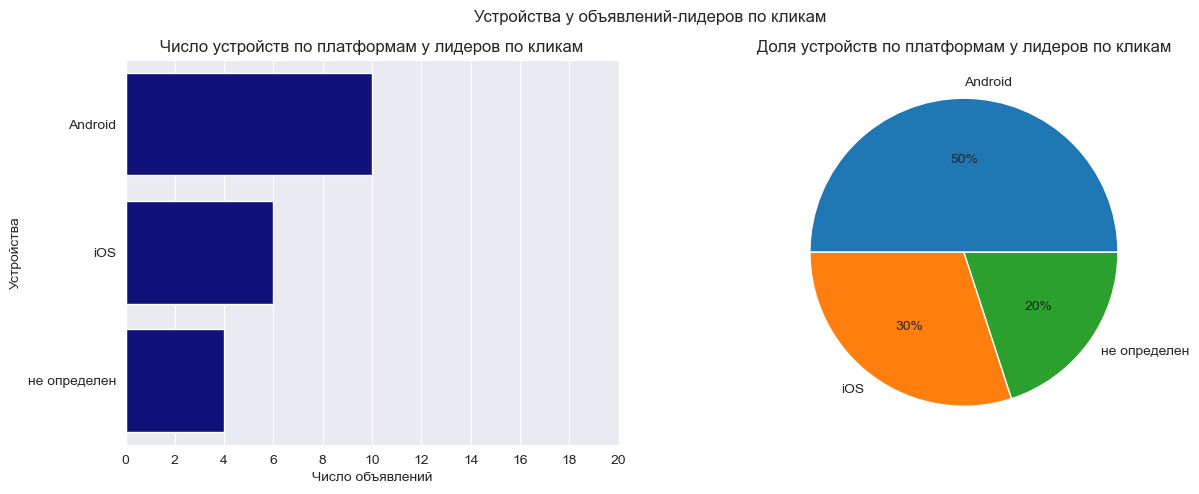

In [53]:
# посчитаем, сколько объявлений приходится на те или иные устройства
clicks_os_pivot = best_clicks_data.pivot_table(
    index = 'os',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(14, 5))

# зададим общее название
plt.suptitle('Устройства у объявлений-лидеров по кликам')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = clicks_os_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'os',
    color = 'darkblue'
)
ax1.set_title('Число устройств по платформам у лидеров по кликам')
plt.xlabel('Число объявлений')
plt.ylabel('Устройства')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(clicks_os_pivot['ad_id'], labels=clicks_os_pivot['os'], autopct='%1.0f%%')
plt.title('Доля устройств по платформам у лидеров по кликам')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('clicks_os_share', dpi=600)

plt.show()

Относительно кликов мы наблюдаем похожую ситуацию: Android получает половину ото всех лидирующих по кликам объявлений, около трети (30%) приходится на iOS-устройства и только 20% на определенные устройства.    
Таким образом, мы наблюдаем преобладание Android-устройств по всем метрикам, что делает их предпочтительными для дальнейшего таргетинга. Также отметим, что относительно CTR и CPC около трети занимают не определенные устройства, а по показам и кликам 30% занимают iOS-устройства. 
Далее рассмотрим фактор половой принадлежности в таргетинге.

### 6.4. Фактор половой принадлежности аудитории
Посмотрим, как таргетинг по половой принадлежности представлен среди лидирующих объявлений по рассматриваемым метрикам.

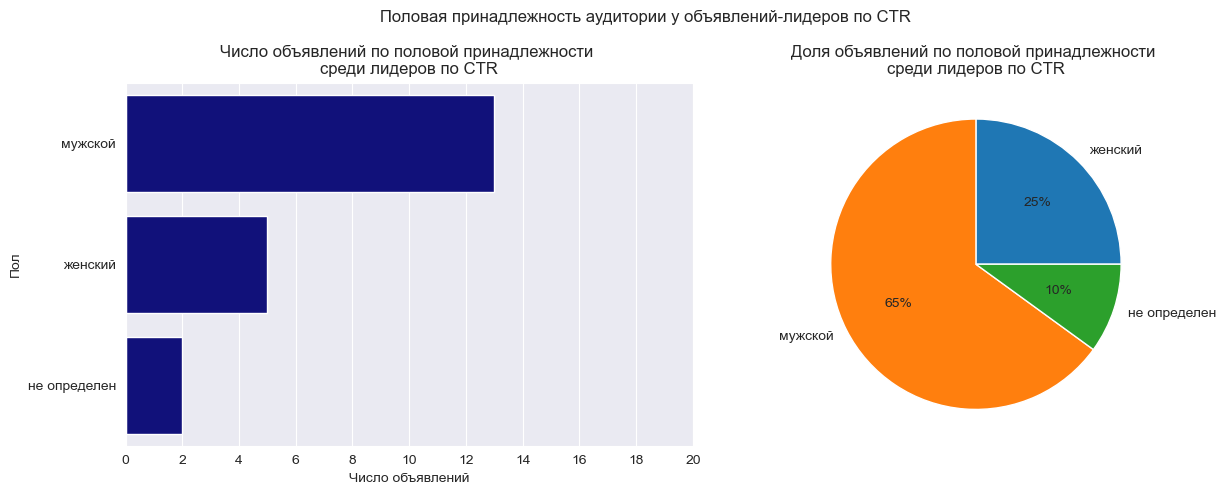

In [54]:
# посчитаем, сколько уникальных объявлений приходится на тот или иной пол по CTR
ctr_sex_pivot = best_ctr_data.pivot_table(
    index = 'sex',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(13, 5))

# зададим общее название
plt.suptitle('Половая принадлежность аудитории у объявлений-лидеров по CTR')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = ctr_sex_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'sex',
    color = 'darkblue'
)
ax1.set_title('Число объявлений по половой принадлежности \nсреди лидеров по CTR')
plt.xlabel('Число объявлений')
plt.ylabel('Пол')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(ctr_sex_pivot['ad_id'], labels=ctr_sex_pivot['sex'], autopct='%1.0f%%')
plt.title('Доля объявлений по половой принадлежности \nсреди лидеров по CTR')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('ctr_sex_share', dpi=600)

plt.tight_layout()
plt.show()

Почти у 2/3 успешных по CTR объявлений преобладает мужской пол (65%), пока женский составляет четверть (25%) от всех объявлений в топе. Оставшиеся 10% процентов не имеют точного таргета по половой принадлежности.

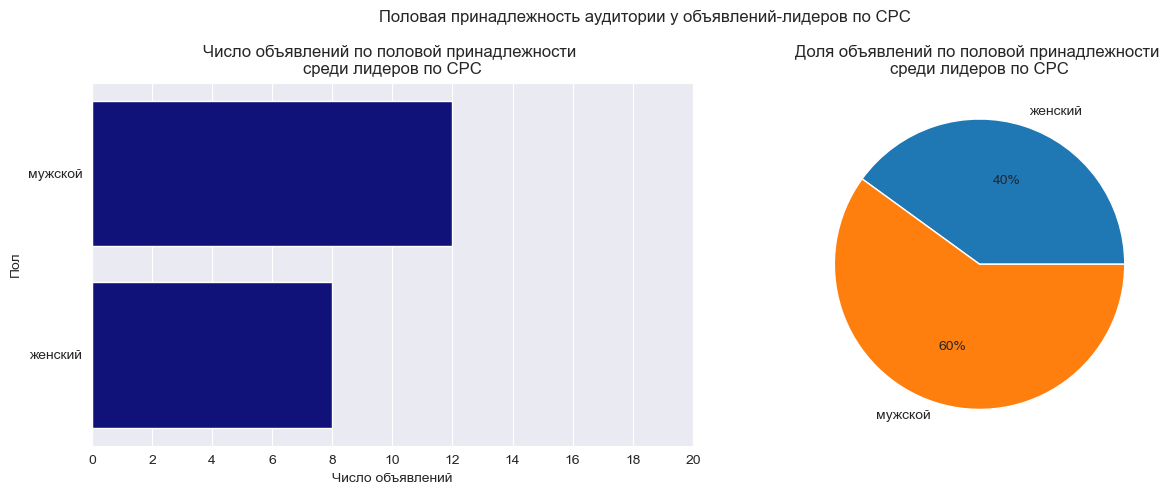

In [55]:
# посчитаем, сколько уникальных объявлений приходится на тот или иной пол по CPC
cpc_sex_pivot = best_cpc_data.pivot_table(
    index = 'sex',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(13, 5))

# зададим общее название
plt.suptitle('Половая принадлежность аудитории у объявлений-лидеров по CPC')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = cpc_sex_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'sex',
    color = 'darkblue'
)
ax1.set_title('Число объявлений по половой принадлежности \nсреди лидеров по CPC')
plt.xlabel('Число объявлений')
plt.ylabel('Пол')
plt.xticks(np.arange(0, 20.1, step=2))

# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(cpc_sex_pivot['ad_id'], labels=cpc_sex_pivot['sex'], autopct='%1.0f%%')
plt.title('Доля объявлений по половой принадлежности \nсреди лидеров по CPC')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('cpc_sex_share', dpi=600)

plt.tight_layout()
plt.show()

Как мы видим, объявления с лидерством по CPC немногим чаще имеют таргет по мужскому полу (60%), пока на женский приходится 40%. Более того, среди объявлений не представлен таргет `не определен`. Следовательно, можно предположить, что включение половой принадлежности в таргет имеет тенденцию уменьшать CPC.  
Посмотрим, как половая принадлежность таргетинга распределена по показам и кликам.

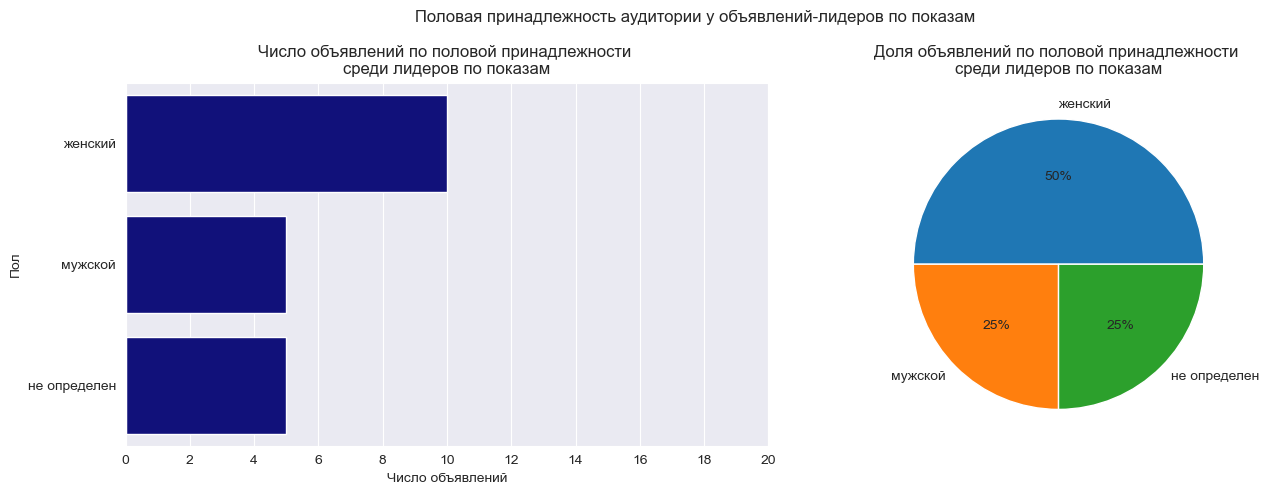

In [56]:
# посчитаем, сколько объявлений приходится на тот или иной пол по показам
shows_sex_pivot = best_shows_data.pivot_table(
    index = 'sex',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(14, 5))

# зададим общее название
plt.suptitle('Половая принадлежность аудитории у объявлений-лидеров по показам')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = shows_sex_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'sex',
    color = 'darkblue'
)
ax1.set_title('Число объявлений по половой принадлежности \nсреди лидеров по показам')
plt.xlabel('Число объявлений')
plt.ylabel('Пол')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(shows_sex_pivot['ad_id'], labels=shows_sex_pivot['sex'], autopct='%1.0f%%')
plt.title('Доля объявлений по половой принадлежности \nсреди лидеров по показам')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('shows_sex_share', dpi=600)

plt.tight_layout()
plt.show()

Среди объявлений, лидирующих по показам, половина (50%) имеет таргет по мужской аудитории, а вторая половина поровну распределена между объявлениями с таргетом на женскую аудиторию (25%) и объявлениями без определенного таргета (25%). 

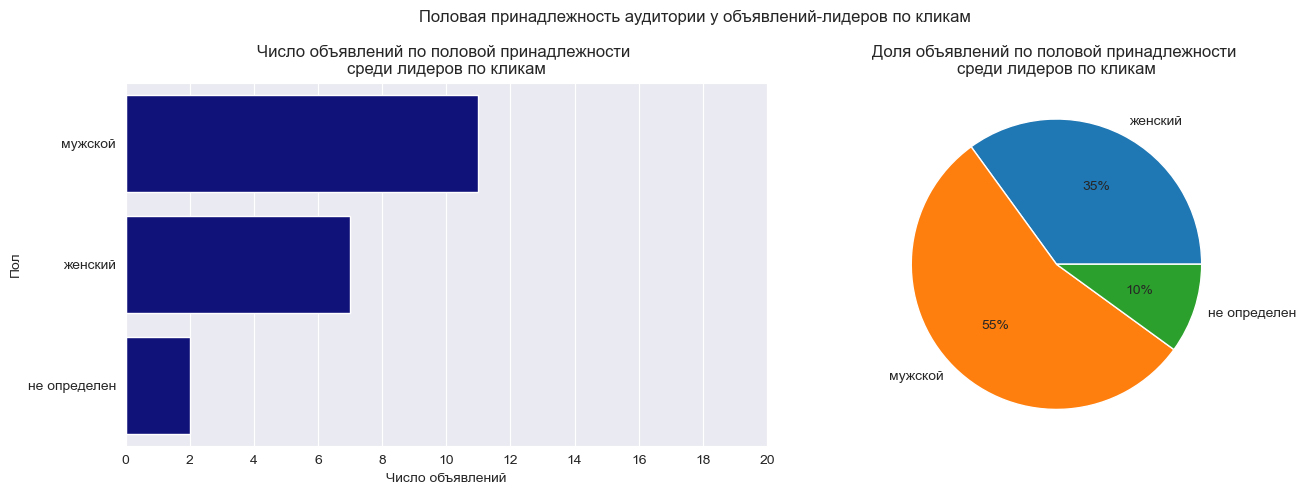

In [57]:
# посчитаем, сколько объявлений приходится на тот или иной пол по кликам
clicks_sex_pivot = best_clicks_data.pivot_table(
    index = 'sex',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(14, 5))

# зададим общее название
plt.suptitle('Половая принадлежность аудитории у объявлений-лидеров по кликам')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = clicks_sex_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'sex',
    color = 'darkblue'
)
ax1.set_title('Число объявлений по половой принадлежности \nсреди лидеров по кликам')
plt.xlabel('Число объявлений')
plt.ylabel('Пол')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(clicks_sex_pivot['ad_id'], labels=clicks_sex_pivot['sex'], autopct='%1.0f%%')
plt.title('Доля объявлений по половой принадлежности \nсреди лидеров по кликам')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('clicks_sex_share', dpi=600)

plt.tight_layout()
plt.show()

Как мы можем наблюдать, больше половины (55%) успешных по кликам объявлений имеют таргет на мужскую аудиторию, пока оставшаяся часть - на женскую (35%). Категория `не определен` среди лидирующих объявлений по кликам представлена всего парой объявлений (10%).  
Таким образом, во всех категориях (высокие показы, клики и CTR, а также низкий CPC) таргет на мужскую аудиторию встречается чаще, нежели другие цели по половой принадлежности. Отдельно отметим, что по кликам и CPC доля женского таргета немногим уступает мужскому, однако, что более заметно, таргет типа `не определен` представлен в успешных объявлениях крайне мало, поэтому таргетинг по половой принадлежности следует указывать точно.  
Рассмотрим последний признак - возрастная сегментация.

### 6.5. Фактор возраста аудитории
Посмотрим, как возрастная сегментация таргета влияет на метрики.

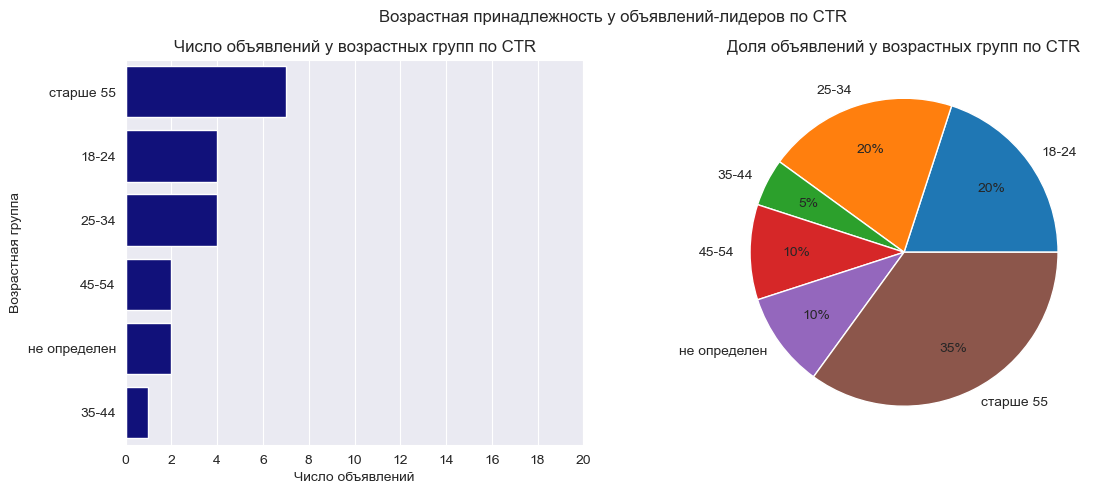

In [58]:
# посчитаем, сколько объявлений приходится на ту или иную возрастную группу
ctr_age_pivot = best_ctr_data.pivot_table(
    index = 'age',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(13, 5))

# зададим общее название
plt.suptitle('Возрастная принадлежность у объявлений-лидеров по CTR')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = ctr_age_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'age',
    color = 'darkblue'
)
ax1.set_title('Число объявлений у возрастных групп по CTR')
plt.xlabel('Число объявлений')
plt.ylabel('Возрастная группа')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(ctr_age_pivot['ad_id'], labels=ctr_age_pivot['age'], autopct='%1.0f%%', pctdistance=0.7)
plt.title('Доля объявлений у возрастных групп по CTR')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('ctr_age_share', dpi=600)

plt.show()

Относительно CTR представлены все категории возрастной сегментации, однако 3/4 от всех объявлений, лидирующих по CTR, занимают категории: `старше 55` (35%), `25-34` (20%) и `18-24` (20%). Прочие возрастные категории составляют не более 15% от всех объявлений.

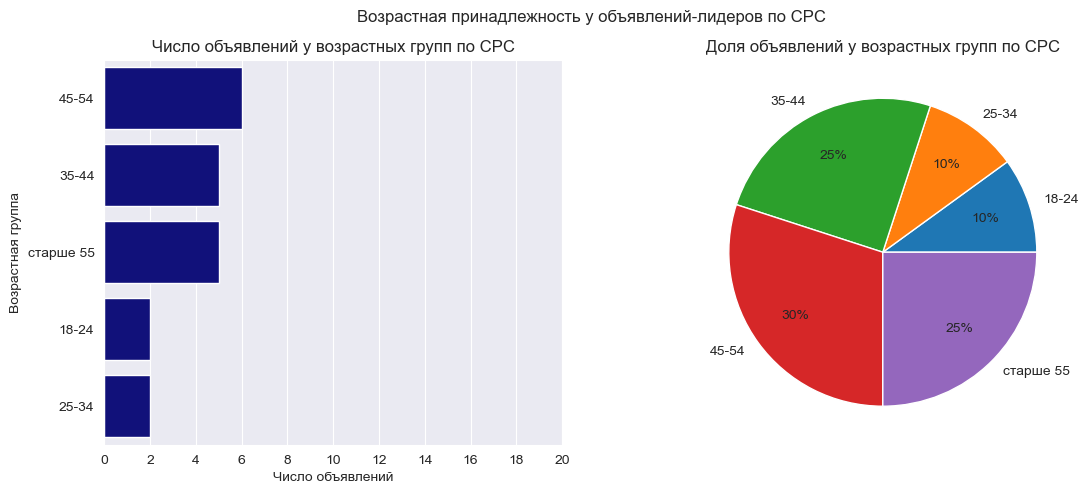

In [59]:
# посчитаем, сколько уникальных объявлений приходится на ту или иную возрастную группу по CPC
cpc_age_pivot = best_cpc_data.pivot_table(
    index = 'age',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(13, 5))

# зададим общее название
plt.suptitle('Возрастная принадлежность у объявлений-лидеров по CPC')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = cpc_age_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'age',
    color = 'darkblue'
)
ax1.set_title('Число объявлений у возрастных групп по CPC')
plt.xlabel('Число объявлений')
plt.ylabel('Возрастная группа')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(cpc_age_pivot['ad_id'], labels=cpc_age_pivot['age'], autopct='%1.0f%%', pctdistance=0.7)
plt.title('Доля объявлений у возрастных групп по CPC')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('cpc_age_share', dpi=600)

plt.show()

Относительно CPC наиболее представленной возрастной группой выступают `45-54` (30%), `35-44` (25%) и `старше 55` (25%), которые вместе составляют 80% процентов от всех лидирующих по CPC объявлений. Дополнительно отметим, что явного преобладания по CPC не прослеживается, т.к. между группами `45-54`, `35-44` и `старше 55` разница в 0-5% (0-2 объявлений). Меньше всего представлены возрастные группы `25-34` и `18-24` (обе 10%), а группа `не определен` и вовсе не представлена.  
Посмотрим, как распределены возрастные сегменты относительно лидеров по показам и кликам.

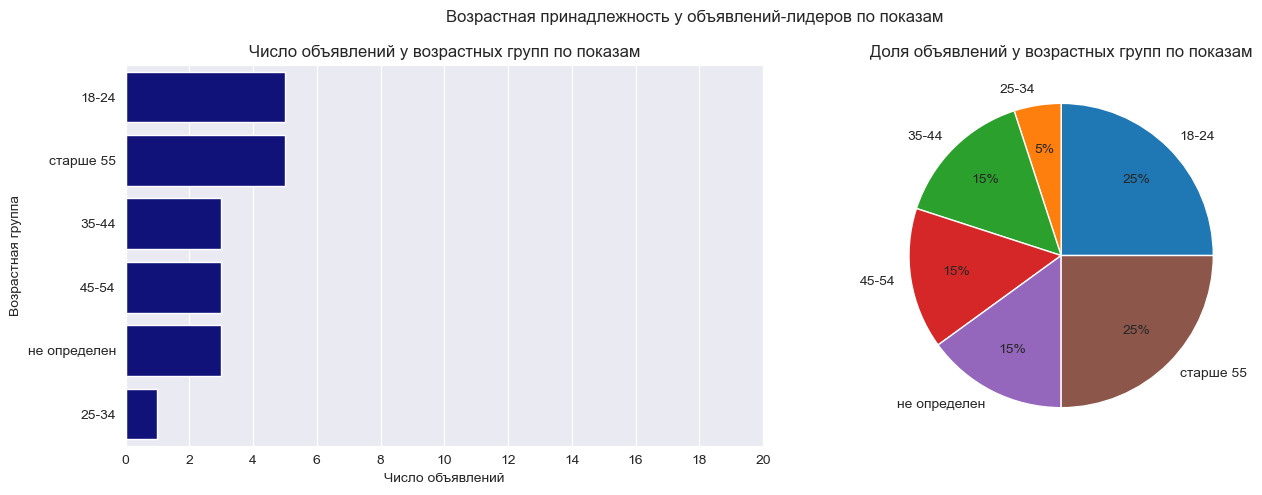

In [60]:
# посчитаем, сколько объявлений приходится на ту или иную возрастную группу по показам
shows_age_pivot = best_shows_data.pivot_table(
    index = 'age',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(14, 5))

# зададим общее название
plt.suptitle('Возрастная принадлежность у объявлений-лидеров по показам')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = shows_age_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'age',
    color = 'darkblue'
)
ax1.set_title('Число объявлений у возрастных групп по показам')
plt.xlabel('Число объявлений')
plt.ylabel('Возрастная группа')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(shows_age_pivot['ad_id'], labels=shows_age_pivot['age'], autopct='%1.0f%%', pctdistance=0.7)
plt.title('Доля объявлений у возрастных групп по показам')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('shows_age_share', dpi=600)

plt.tight_layout()
plt.show()

Так же, как и по прошлым метрикам, мы наблюдаем преобладание группы `старше 55` (25%), однако такую же долю занимает и группа `18-24` (25%). Вместе эти группы получают половину от всех объявлений, лидирующих по показам. Остальные группы получают от 5% до 15%. Дополнительно отметим, что мы и здесь не наблюдаем сильного преобладания одной группы, для выявления более успешного таргета.

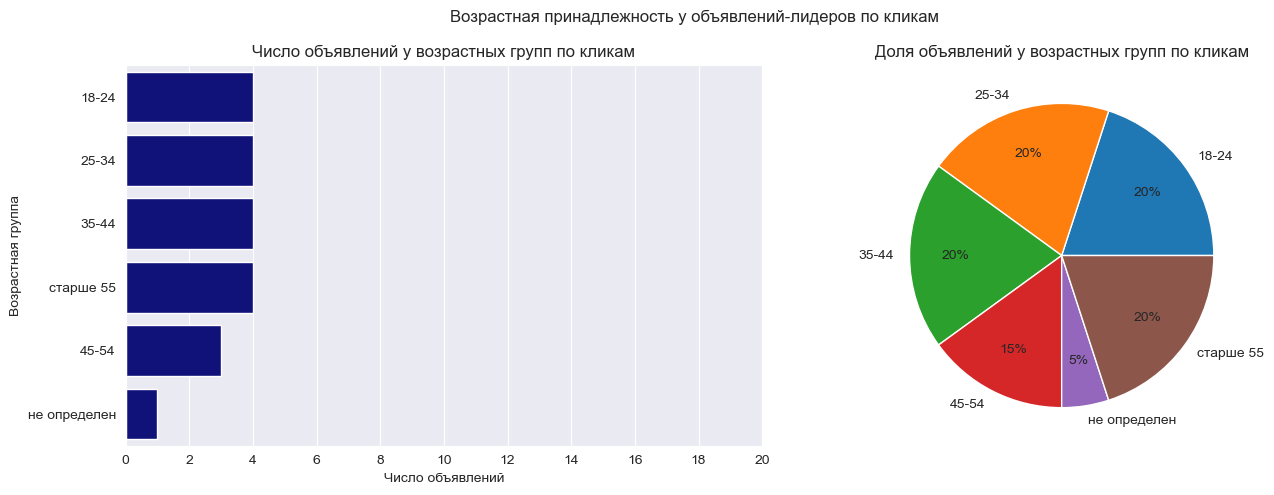

In [61]:
# посчитаем, сколько объявлений приходится на ту или иную возрастную группу по кликам
clicks_age_pivot = best_clicks_data.pivot_table(
    index = 'age',
    values = 'ad_id',
    aggfunc = 'count'
).reset_index()

# визуализируем полученные данные
# зададим размер всей области отображения
plt.figure(figsize=(14, 5))

# зададим общее название
plt.suptitle('Возрастная принадлежность у объявлений-лидеров по кликам')

# посмотрим столбиковый график
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = clicks_age_pivot.sort_values(by='ad_id', ascending=False), 
    x = 'ad_id', 
    y = 'age',
    color = 'darkblue'
)
ax1.set_title('Число объявлений у возрастных групп по кликам')
plt.xlabel('Число объявлений')
plt.ylabel('Возрастная группа')
plt.xticks(np.arange(0, 20.1, step=2))


# посмотрим piechart для отображения долей
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(clicks_age_pivot['ad_id'], labels=clicks_age_pivot['age'], autopct='%1.0f%%', pctdistance=0.7)
plt.title('Доля объявлений у возрастных групп по кликам')

# сохраним график в png-файл для дальнейшего использования в отчетности
#plt.savefig('clicks_age_share', dpi=600)

plt.tight_layout()
plt.show()

Относительно возрастной принадлежности среди объявлений, лидирующих по кликам, мы наблюдаем преобладание 4 групп, которые занимают 80% от всех объявлений-лидеров по кликам: `старше 55`, `25-34`, `35-44` и `18-24` (каждая по 20%). Оставшаяся пятая часть приходистя на группы `45-54` (15%) и `не определен` (5%). Если группа `45-54` уступает прочим на 1 объявление, то группа `не определен` представлена всего 1 объявлением, поэтому здесь следует отметить разницу между определенными и не определенными по возрасту таргетами, так как явного преобладания возрастной группы не наблюдается.  
Таким образом, относительно маркетинговых метрик наиболее результативными выступают именно определенные возрастные группы.

### Промежуточные выводы
В результате анализа факторов продвижения рекламных объявлений мы можем резюмировать следующее:
- в рамках таргетинга все рекламные объявления показывают высшие показатели при автотаргетинге;
- в подавляющем большинстве объявлений, лидирующих по метрикам, преобладает поисковая выдача над сетями;
- среди целевых устройств, ведущих к более высоким показателям маркетинговых меток, наилучшим образом себя показывает таргетинг на android-устройства;
- в подавляющем большинстве успешных рекламных объявлений фактор половой принадлежности способствует лучшим показателям при мужском таргетинге;
- не определенный таргет по половой принадлежности представлен среди успешных объявлений крайне мало, поэтому по половой принадлежности наличие таргетинга лучше способствует росту маркетинговых показателей, нежели его отсутствие (т.е. `не определен`);
- среди объявлений, лидирующих по маркетинговым метрикам, наиболее полно представлена группа `старше 55`, пока прочие группы демонстрируют неравномерную представленность среди лидирующих объявлений по метрикам.

## 7. Конверсия в запись на курс
Как уже было упомнято, заказчик добавил сторонний csv-файл, который мы уже загрузили в датафрейм `cr`, с уже подсчитанными абсолютными показателями конверсии в запись на курс. Задача заказчика состоит в том, чтобы показать динамику конверсии за весь рассматриваемый период с фокусом на события, когда владелец продукта по требованию изменял маркетинговую стратегию.  
Для наглядной демонстрации общей динамики с несколькими событиями в определенные даты нам следует построить график по временному ряду, а затем отложить по выделенным датам датафрейма `events` линии, маркирующие интересующие нас события.  
Для начала представим саму динамику конверсии со скользящим среднем.

In [62]:
# добавим скользящее среднее к датафрейму "cr"
cr['conv_rolling'] = cr['conversions'].rolling(5).mean()

# проверим результат
cr.head()

date  conversions  conv_rolling
0 2024-03-01            6           NaN
1 2024-03-02            2           NaN
2 2024-03-03            3           NaN
3 2024-03-04            0           NaN
4 2024-03-05            1           2.4

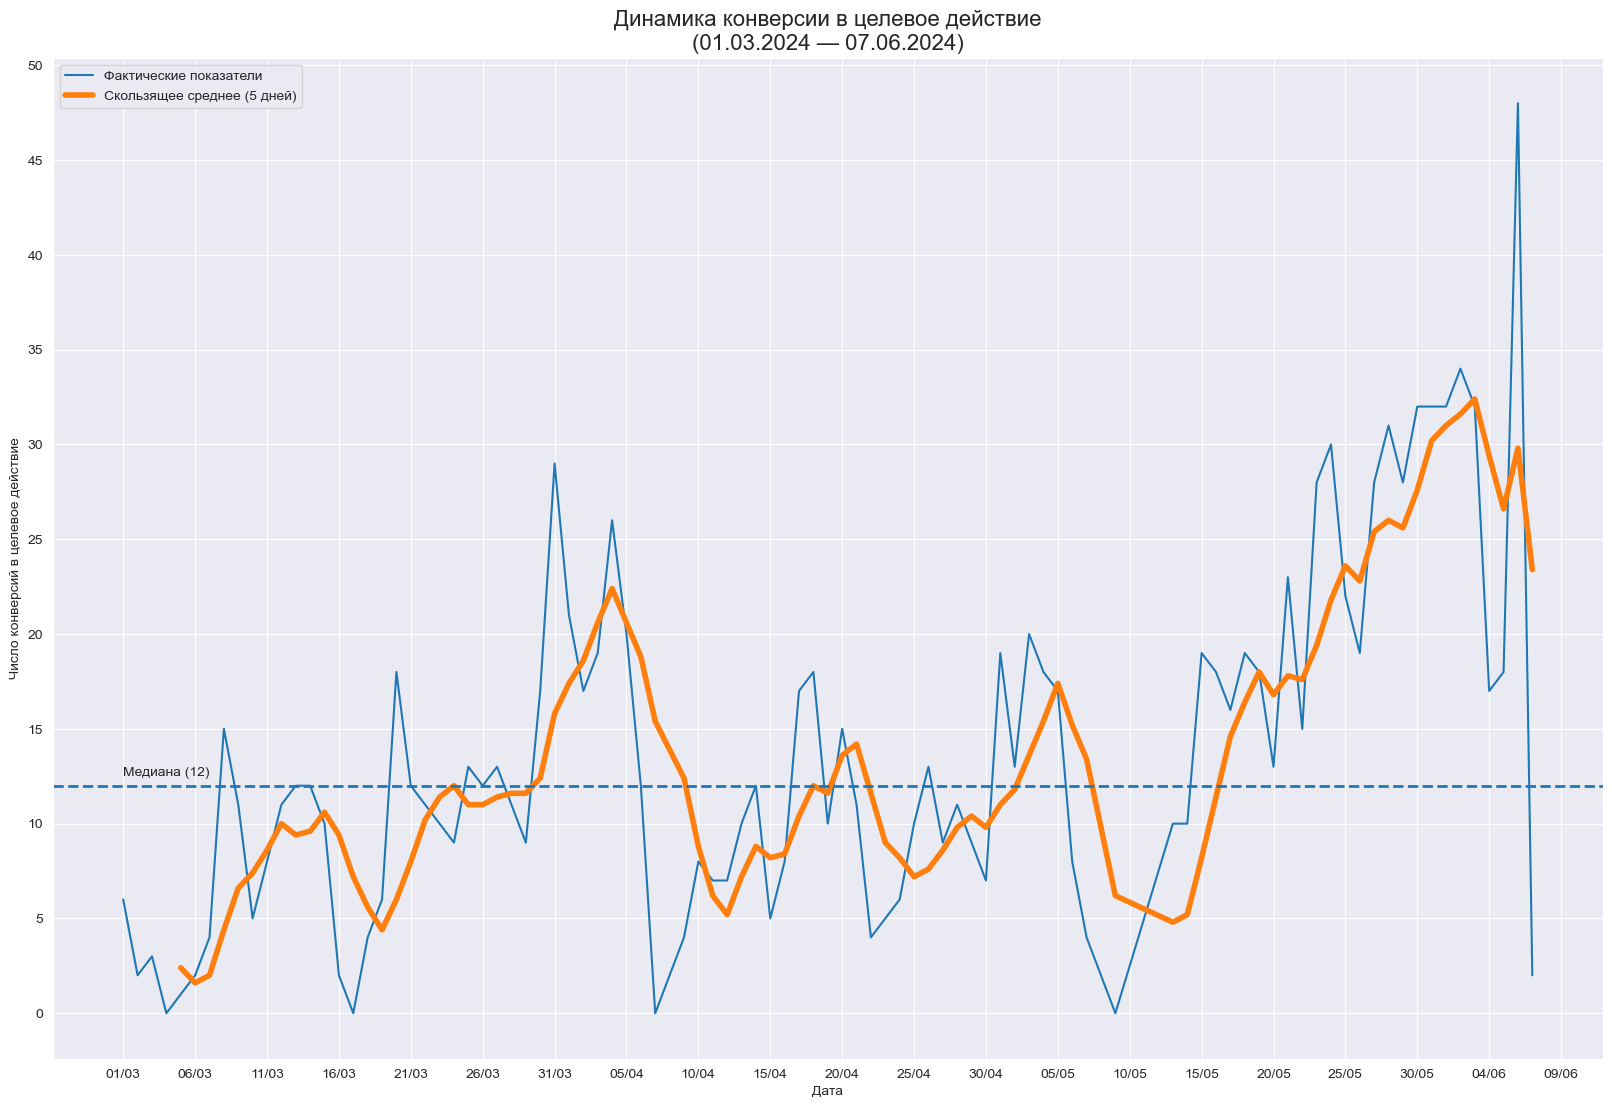

In [63]:
# построим график динамики конверсии за рассматриваемый период
# задаем размер общей области отображения
plt.figure(figsize = (20, 13))

# строим линейну диаграмму с фактическими показателями
sns.lineplot(data = cr, x = 'date', y = 'conversions', label = 'Фактические показатели')

# строим линейную диаграмму со скользящим средним
sns.lineplot(data = cr, x = 'date', y = 'conv_rolling', linewidth=4, label = 'Скользящее среднее (5 дней)')

# настраиваем сетку с более точным шагом
plt.yticks(np.arange(0, 51, step = 5))

# настроим отображение даты в формате "месяц/день" и интервал шага в 5 дней
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))

# именуем оси коордиант
plt.ylabel('Число конверсий в целевое действие')
plt.xlabel('Дата')

# зададим название
plt.title(label='Динамика конверсии в целевое действие\n(01.03.2024 — 07.06.2024)', fontdict={'fontsize': 16})

# добавим медиану на диаграмму
plt.axhline(y=cr['conversions'].median(), linestyle='--', linewidth=2)
plt.annotate(text=f'Медиана ({cr["conversions"].median():.0f})', xy=(dt(2024, 3, 1), (cr['conversions'].median()+0.5)))

# сохраним график для заказчика
# plt.savefig('cr_barplot', dpi=400)
plt.show()

Дополним диаграмму конверсии аналогичной, но с событиями, связанные с изменением маркетинговой стратегии.

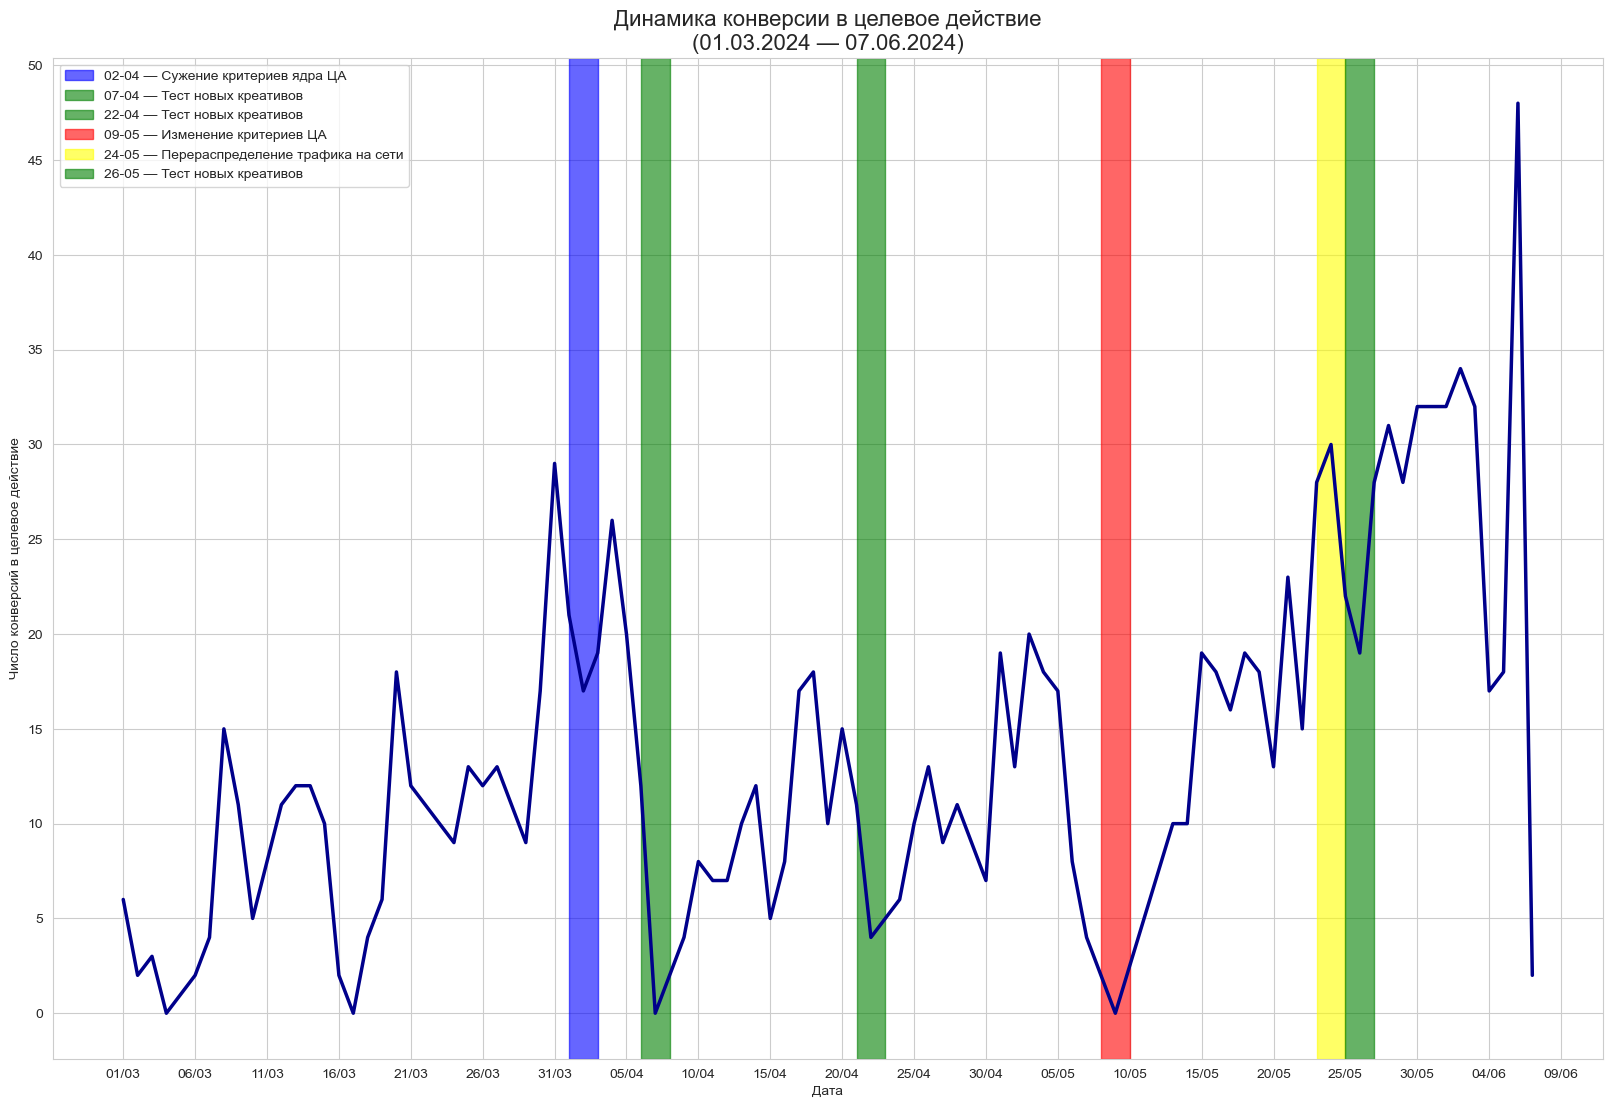

In [68]:
# построим график динамики конверсии за рассматриваемый период с маркерами событий заказчика
# задаем размер общей области отображения
plt.figure(figsize = (20, 13))

# установим стиль графиков
sns.set_style('whitegrid')

# строим линейную диаграмму
sns.lineplot(data=cr, x='date', y='conversions', linewidth=2.5, color='darkblue')

# настраиваем сетку с более точным шагом
plt.yticks(np.arange(0, 51, step = 5))

# именуем оси коордиант
plt.ylabel('Число конверсий в целевое действие')
plt.xlabel('Дата')

# зададим название
plt.title(label = 'Динамика конверсии в целевое действие\n(01.03.2024 — 07.06.2024)', fontdict = {'fontsize': 16})

# настроим отображение даты в формате "месяц/день" и интервал шага в 5 дней
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))

# зададим словарь с цветами для каждого события
event_colors = {'Сужение критериев ядра ЦА': 'blue', 
                'Тест новых креативов': 'green', 
                'Изменение критериев ЦА': 'red',
                'Перераспределение трафика на сети': 'yellow'
               }

# переберем через цикл каждую строку датафрейма и расположим даты в виде цветных зон, а события перенесем в подписи
for index, row in events.iterrows():
    plt.axvspan(
        xmin = (row['date'] - timedelta(1)), 
        xmax = (row['date'] + timedelta(1)), 
        label = f'{row["date"]:%d-%m} — {row["event"]}', 
        alpha = .6,
        color = event_colors[row['event']]
    )

# добавим подписи в легенду
plt.legend()

#plt.savefig('conv_dynamic_with_events', dpi=400)
plt.show()

Как мы видим, конверсия в переходы на курс в начале марта не превышает 6 переходов, а уже со второй недели держится на уровне до 15 переходов. К началу апреля конверсия наращивает темп до уровня 15-30 переходов. С середины апреля до конца мая уровень конверсии держится около 5-15 переходов с редкими пиками до 20. Уже в конце мая / начале июня конверсия растет до уровня 20-35 переходов с пиком 6 июня в 48 переходов, а затем происходит резкий спад до 0.  
Важно отметить то, что конверсионные показатели крайне волатильны и на каждый подъем наблюдается резкий спад, что свидетельствует об изменчивости маркетингового подхода командой. В этом отношении мы видим, что большая часть событий приходится на спад конверсии, т.е. решения скорее сказываются негативно на показатели, нежели добавляют динамики. Это справедливо при условии, что решения принимаются в начале дня, а уже измененные параметры продвижения сказываются на конверсии. В обратном случае (если решения следуют за показателями), то тогда следует отметить чувствительность владельцев продукта к ключевым метрикам, однако и здесь мы наблюдаем нерегулярный рост до тех пор, пока не вносятся изменения, которые влияют на нестабильность метрики.

Также дополнительно заказчик хочет подчеркнуть динамику конверсий по месяцам, чтобы выделить результативность за каждый месяц. Для этого добавим столбец с кумулятивной конверсией по месяцу в датафрейм `cr` и построим визуализацию.

In [65]:
# добавим столбец конверсии с накоплением в датафрейм "cr"
cr['cumulative'] = cr.groupby(cr['date'].dt.month)['conversions'].cumsum()

# проверим результат
cr.head()

date  conversions  conv_rolling  cumulative
0 2024-03-01            6           NaN           6
1 2024-03-02            2           NaN           8
2 2024-03-03            3           NaN          11
3 2024-03-04            0           NaN          11
4 2024-03-05            1           2.4          12

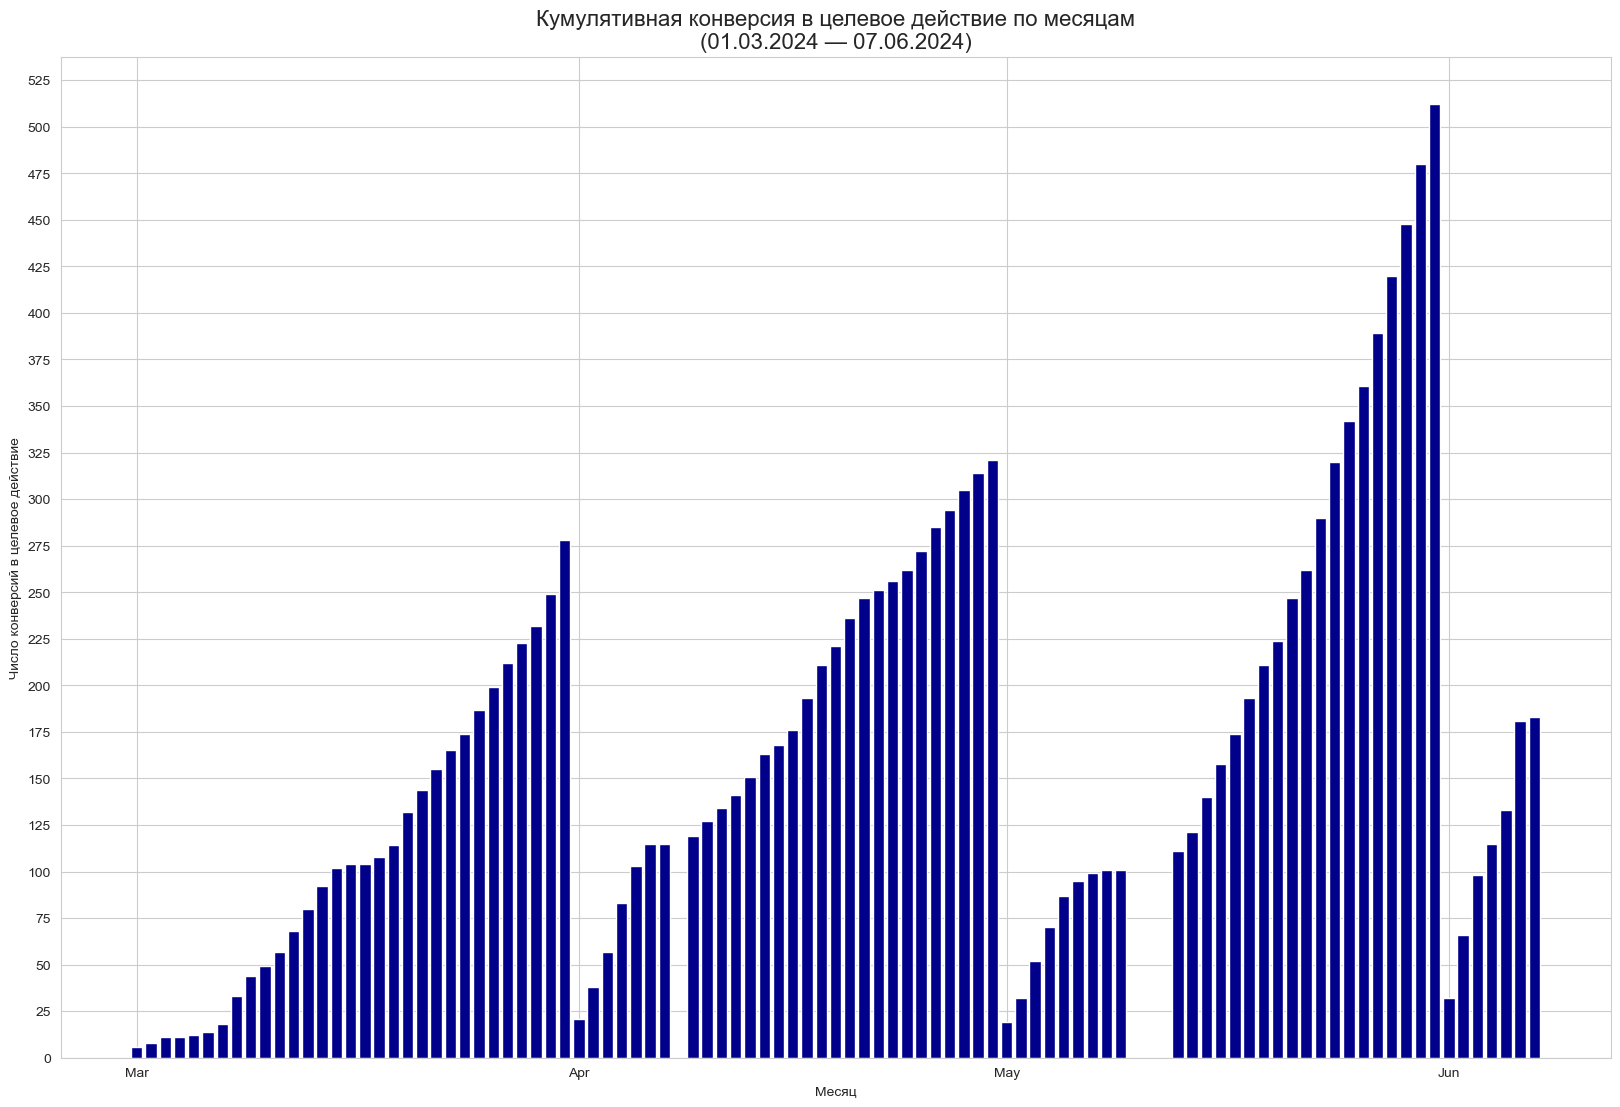

In [66]:
# построим график динамики конверсии с накоплением по месяцам за рассматриваемый период
# задаем размер общей области отображения
plt.figure(figsize = (20, 13))

# установим стиль графиков
sns.set_style('whitegrid')

# строим столбиковую диаграмму
ax = plt.bar(data=cr, x='date', height='cumulative', color='darkblue')

# настраиваем сетку с более точным шагом
plt.yticks(np.arange(0, 526, step = 25))


# детализация даты
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(2,7)))

# оси
plt.ylabel('Число конверсий в целевое действие')
plt.xlabel('Месяц')

# название
plt.title(
    label = 'Кумулятивная конверсия в целевое действие по месяцам\n(01.03.2024 — 07.06.2024)', 
    fontdict = {'fontsize': 16}
)

#plt.savefig('cumulative_months', dpi=500)
plt.show()

Как мы видим, от месяца к месяцу наблюдается положительная динамика конверсии: если за март число конверсий составляет около 275, то далее за следующие месяцы показатели конверсии растут: около 325 за апрель, свыше 500 за май и немногим более 175 за первую неделю июня. Также мы наблюдаем пробелы, которые вероятнее всего связаны с отсутствием записи на данные дни, а также идентичные по показателям столбцы 16-17 марта, 6-7 апреля и 8-9 мая. Данные горизонтали демонстрируют отсутствие роста конверсии по сравнению с предыдущим днем, что соответствует падениям до нуля на предыдущих диаграммах.

### Промежуточные выводы
В результате визуализации конверсии мы можем резюмировать следующее:
- за рассматриваемый период суммарный показатель конверсии составляет 1294 перехода в запись на курс с медианным показателем за день 12;
- общая динамика конверсии держится на уровне 5-15 переходов с повышением уровня до 25 в начале апреля и до 35 в конце мая / начале июня;
- в разрезе итога по конверсии за каждый месяц наблюдается постепенное увеличение динамики роста конверсионных показателей: на 50 с марта по апрель и на 200 с апреля по май;
- требования владельца продукта по смене характеристик целевой аудитории и изменения креативов относительно продвижения попадают на дни спада в динамике конверсии, что в зависимости от рабочих процессов маркетинговой команды либо свидетельствует о решениях, негативно сказывающихся на показателях конверсии, либо о чувствительности владельцев продукта к спадам в показателях, ввиду чего и принимаются стратегические решения;
- вне зависимости от рабочих процессов маркетинговой команды наблюдается дестабилизация роста конверсии по факту изменения маркетинговой стратегии.

## 8. Дашборд для маркетинговой команды
Помимо визуализаций и выводов аналитической части заказчик указал на необходимость BI-отчета для последующего использования как внутри команды, так и для дополнительной отчетности перед владельцами продукта.  
Для этого выгрузим предобработанные датафреймы в отдельные csv-файлы для последующего подключения BI-системы "DataLens".

In [67]:
# выгрузим предобработанные датафреймы в формате csv
# data.to_csv('eng_courses_data.csv')
# cr.to_csv('eng_courses_cr.csv')

По факту выгрузки данных в csv-формате мы загружаем их как источники в DataLens, а затем, подготовив датасеты, мы строим чарты, аналогичные представленным выше, а по готовности всех компонентов собираем их в дашборд с 3 вкладками. Каждая вкладка представляет отдельный аспект проекта:
- маркетинговые метрики;
- факторы таргетинга;
- конверсия в интенсив.

С дашбордом можно ознакомится по ссылке: [дашборд](https://datalens.yandex/wrei0n5n8po2j)

Рассмотрим каждую вкладку.

#### 8.1. Вкладка "Маркетинговые метрики"

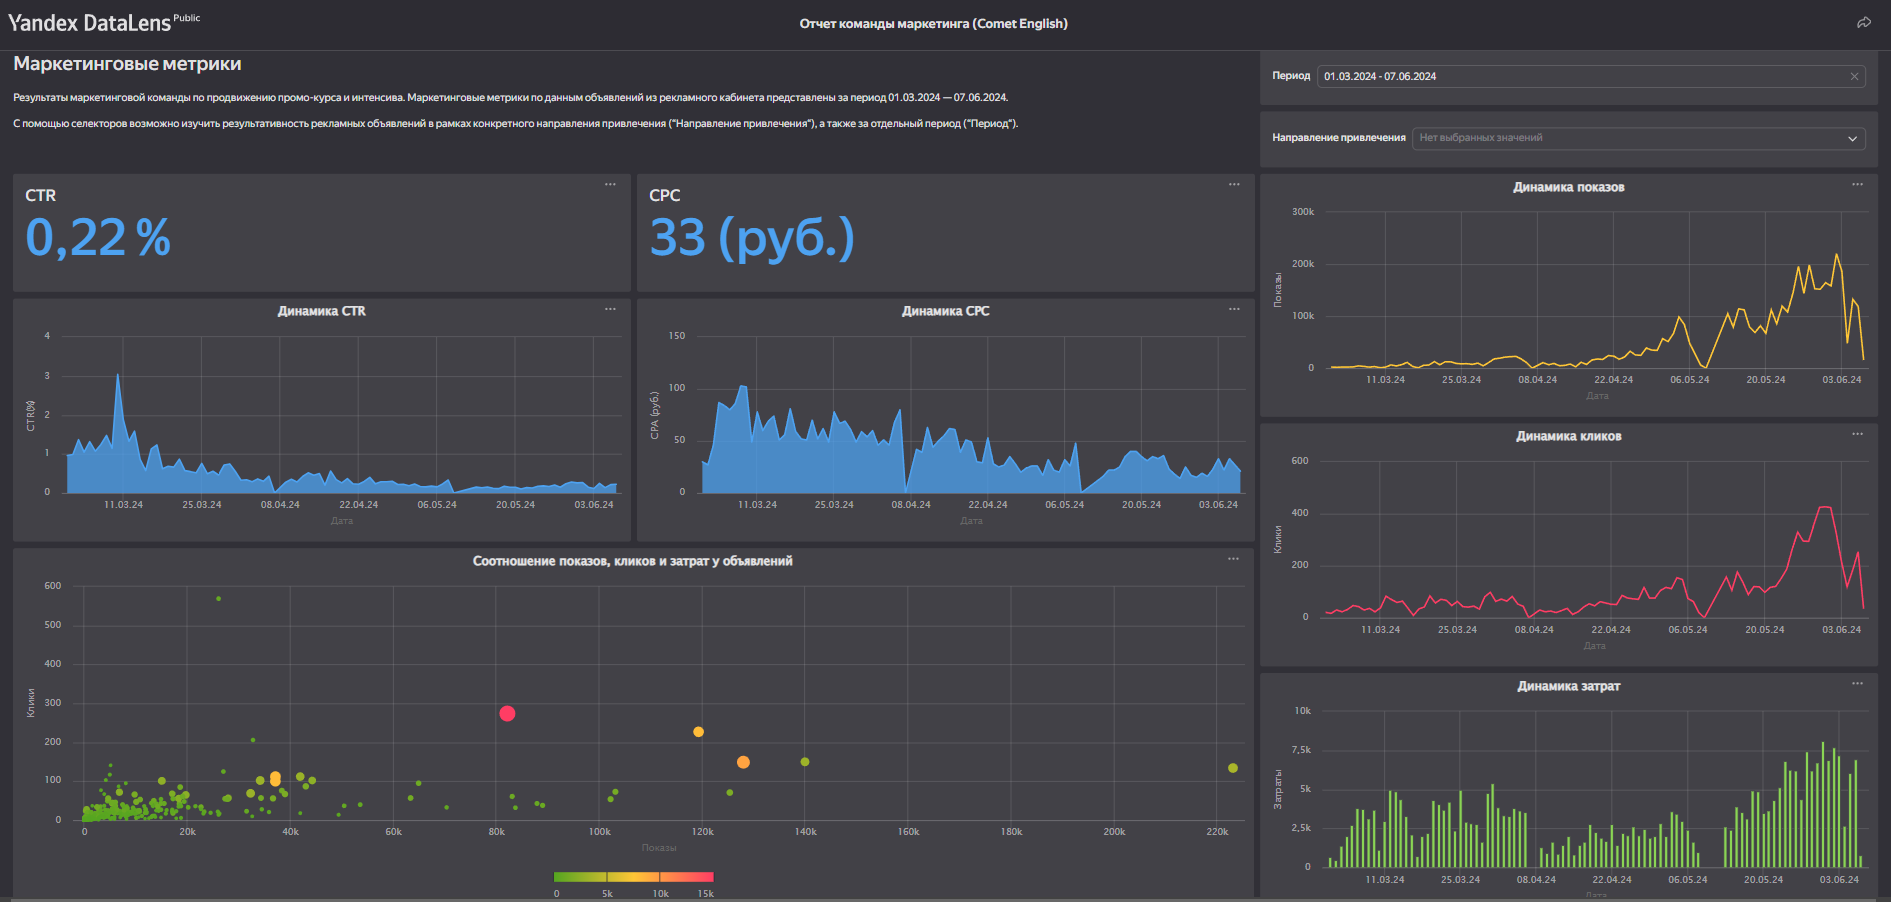

Вкладка "Маркетинговые метрики" включает следующие визуализации:
- индикатор CTR;
- индикатор CPC;
- динамика CTR;
- динамика CPC;
- диаграмма рассеяния по показам, кликам и затратам рекламных объявлений;
- динамика показов по дням;
- динамика кликов по дням;
- динамика затрат по дням.

Данные визуализации отображают маркетинговые показатели за весь период (01.03.2024 - 07.06.2024) и позволяют оценить, какова общая результативность маркетинга как в общем, так и по отдельным направлениям привлечения. Детализация даты и направления привлечения с помощью соответствующих селекторов позволяет настроить срез данных по интересующему периоду или направлению продвижения.

#### 8.2. Вкладка "Факторы таргетинга"

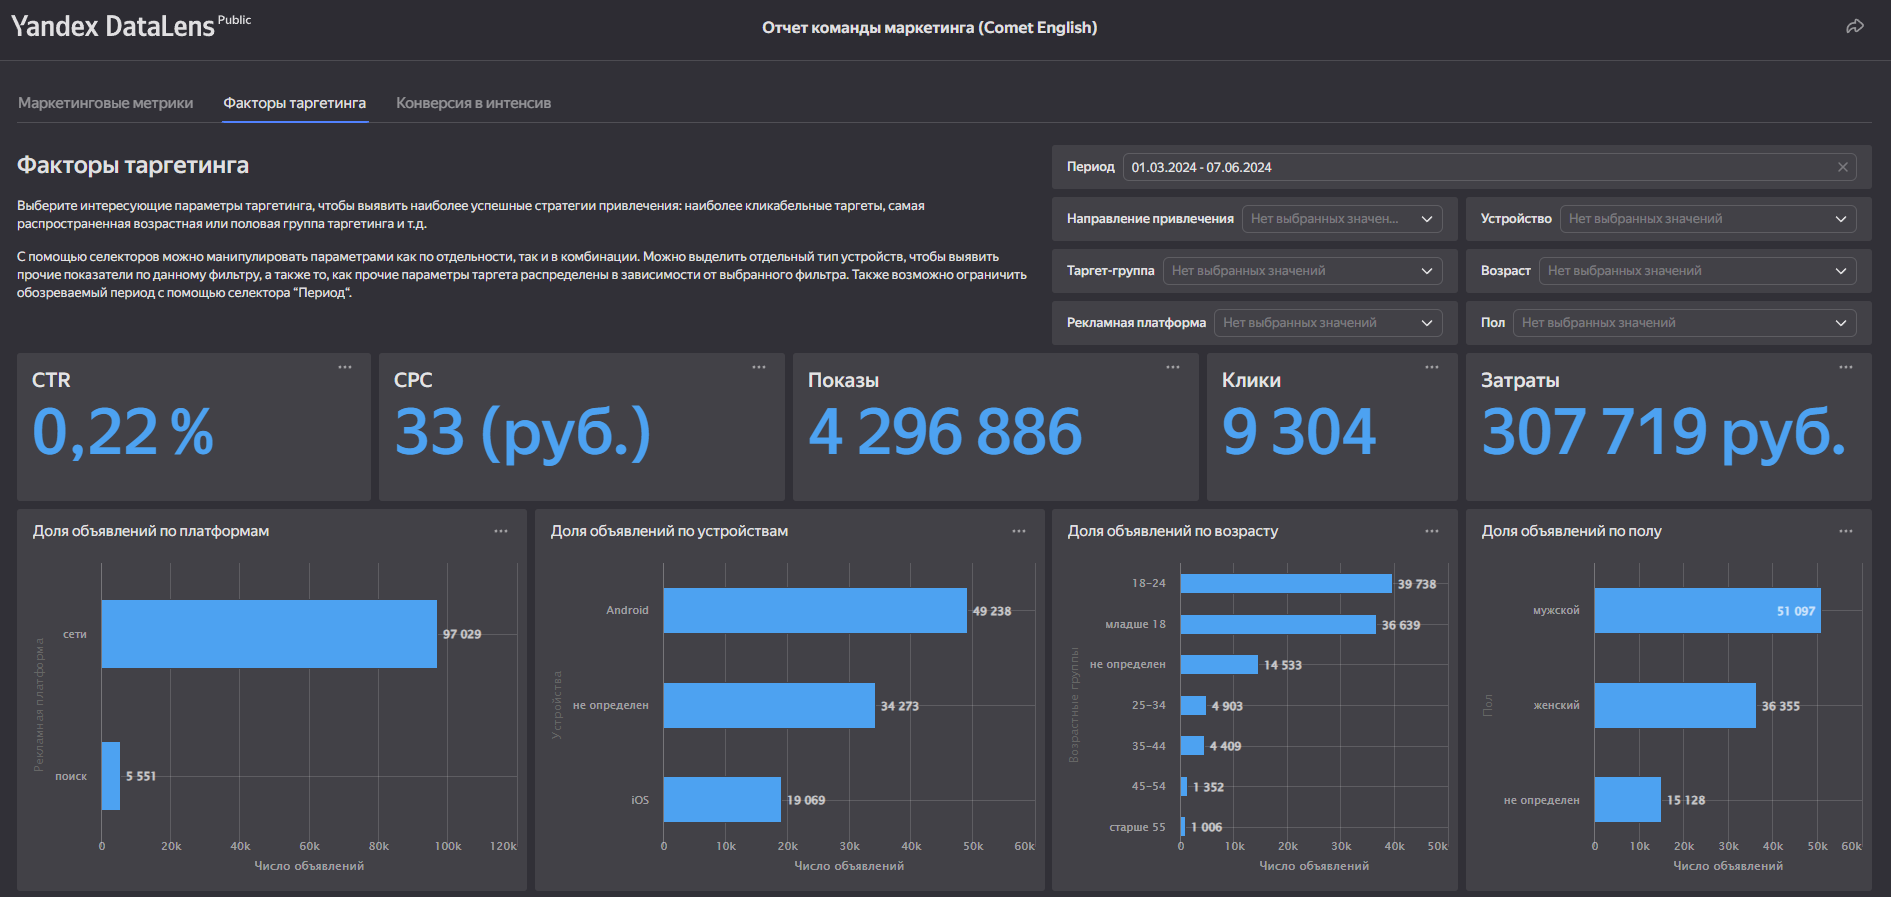

Вкладка "Факторы таргетинга" сильнее прочих отличается от аналогичного этапа проекта ввиду предоставления больших возможностей для команды маркетинга по самостоятельному исследованию различных факторов таргетинга на маркетинговые показатели. Данная вкладка включает следующие визуализации:
- индикатор CTR;
- индикатор CPC;
- индикатор показов;
- индикатор кликов;
- индикатор затрат;
- распределение устройств;
- распределение рекламных платформ;
- распределение возрастных групп;
- распределение групп по полу.

Визуализации вкладки отображают маркетинговые показатели с распределением различных признаков таргетинга, что позволяет выявить наиболее эффективные целевые признаки аудитории. Для самостоятельно исследования пользователем представлено несколько селекторов, которые позволяют детализировать обзор метрик и выявить наиболее интересные сегменты. Для этой цели представлены следующие селекторы:
- направление привлечения (срез показателей по отдельному или нескольким направлениям привлечения);
- дата (срез данных по заданному сроку);
- таргет (срез по конкретному таргету);
- возраст (срез по возрастной сегментации аудитории);
- платформа рекламных объявлений (срез по среде показов и выдачи рекламных объявлений);
- устройства (срез по целевым устройствам).

При заинтересованном использовании и комбинации селекторов можно обнаружить полезные инсайты, которые помогут скорректировать таргетинг.


#### 8.3. Вкладка "Конверсия в интенсив"

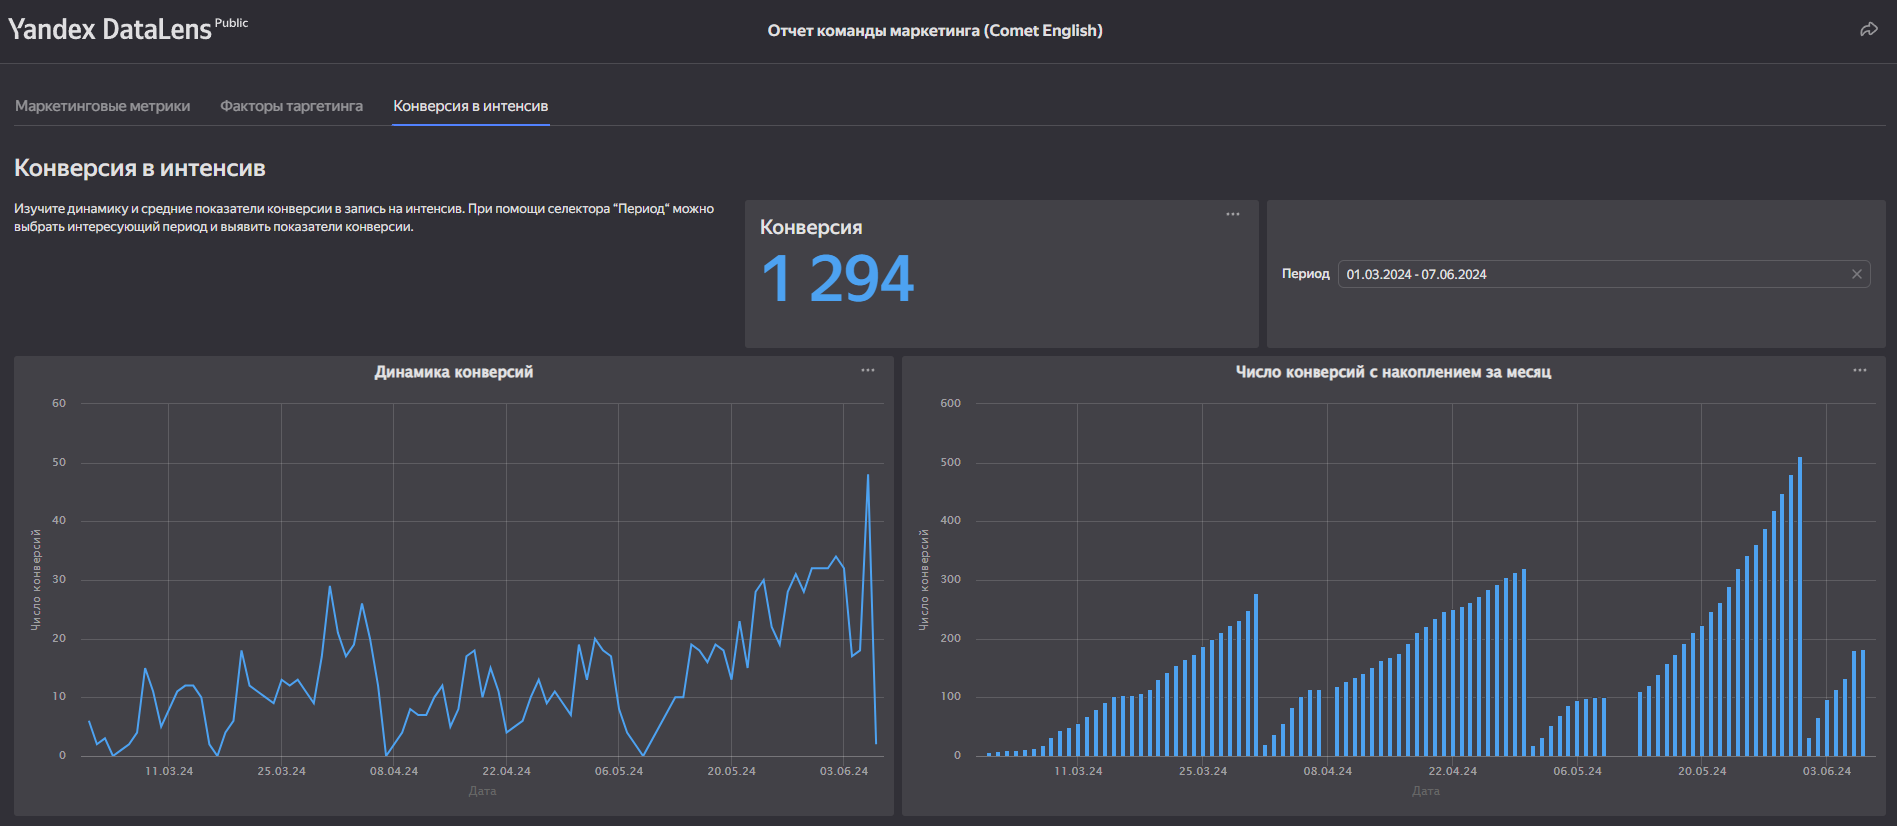

Вкладка "Конверсия в интенсив" менее прочих позволяет комплексно исследовать результативность рекламных объявлений ввиду изолированности источника данных, предоставленных заказчиком. Однако данный раздел позволяет получить обзор конверсионных показателей за интересующий период, что обеспечивается следующими визуализациями:
- индикатор среднего значения конверсии за рассматриваемый период;
- динамика конверсионных переходов за рассматриваемый период;
- конверсионные переходы с накоплением за месяц.

Для фокуса на конкретном периоде представлен селектор "Дата", позволяющий выбрать интересующий период.

## 9. Выводы и рекомендации по проекту
По факту выполнения проекта мы можем резюмировать следующее:
- за период с 1.03.24 по 07.06.24 большинство объявлений получают от 1 до 26 показов с медианой в 3 показа;
- редкие объявления по направлениям `intensive_course` и `promo_course` достигают 11000 и 14000 показов соответственно;
- подавляющее большинство объявлений не получает кликов, а среди тех, на которые кликают, большая часть по направлению `intensive_course` получает до 3 кликов, а по `promo_course` - 1 клик;
- большинство объявлений обходится стоимостью до 130 руб.
- медианные показатели затрат по направлениям привлечения различны: `intensive_course` - 28 р., `promo_course` - 34 р.;
- общая корреляция между показами и кликами имеет умеренный характер, тогда как связь между показами и затратами незначительна; коэффициенты корреляции по направлению `intensive_course` ниже из-за более низких затрат и высоких показателей кликов;
- общий CTR с медианой 0,3% имеет волатильный характер (0,1–0,75%), с пиковым значением 3% 10 марта;
- общий CPC с медианой 40,9 руб. постепенно снижается от диапазона 50-90 руб. в марте до 10-30 руб. в мае-июне с резким падением в конце апреля;
- общие показы рекламных объявлений с медианой в 17673 показов преимущественно держатся на уровне до 20000 показов;
- длительная положительная динамика в показах отмечается с конца апреля до начала июня с пиком в 220000 показов 2 июня;
- общие показатели кликов с медианой в 64 клик повторяют тренд показов, однако имеют тенденцию к росту с диапазона 20-80 кликов на февраль-март на уровень 80-160 кликов в начале июня;
- в общих показателях количества кликов наблюдается резкий положительный рост в период с середины мая до начала июня с пиком в 420 кликов, что отражает положительную динамику по показам;
- затраты на рекламные кампании за весь период составляют около 310000 руб. с медианой в 2911 руб.;
- CTR по направлениям `promo_course` и `intensive_course` на протяжении большей части периода держится на уровне до 1% с периодическим подъемом до 2%;
- CPC по направлениям `promo_course` и `intensive_course` до середины апреля имеет крайне волатильный характер с диапазоном 25-150 руб. по направлению `intensive_course` и с диапазоном 30-100 руб. по направлению `promo_course`;
- CPC по направлениям `promo_course` и `intensive_course` с середины апреля стабилизируется на уровне до 50 руб. по обоим направлениям;
- до мая показы по обоим направления `promo_course` и `intensive_course` держатся на уровне до 20000 показов, а в мае показы резко возрастают: по направлению `promo_course` показы достигают уровня 100000-170000 показов, а по направлению `intensive_course`- 20000-60000 показов;
- клики по направлениям `promo_course` и `intensive_course` до конца мая изменяются по-разному: по направлению `promo_course` фиксируется постепенный рост с уровня 20-60 в марте до уровня 70-130 кликов мае, пока по направлению `intensive_course` показы держатся на уровне до 20 показов;
- конец мая / начало июня по обоим направлениям отмечается увеличение кликов: резкий скачок по направлению `intensive_course` до уровня 250-280 кликов, и умеренный подъем по направлению `promo_course` до уровня 140-180 кликов;
- по затратам рекламные объявления в разных направлениях придерживаются разного уровня: по направлению `intensive_course` мартовский уровень в 500-2000 руб. в апреле и до середины мая сменяется уровнем до 500 руб.;
- по направлению `promo_course` мартовский уровень затрат 1000-3000 руб. сменяется уровнем 500-2500 руб. до начала мая;
- вторая половина мая демонстрирует самые высокие показатели затрат по обоим направлениям: умеренный подъем по направлению `intensive_course` на уровень 1000-2000 руб., и высокий скачок по направлению `promo_course` на уровень 5000-6000 руб.;
- за рассматриваемый период суммарный показатель конверсии составляет 1294 перехода в запись на курс с медианным показателем за день 12;
- общая динамика конверсии держится на уровне 5-15 переходов с повышением уровня до 25 в начале апреля и до 35 в конце мая / начале июня;
- в разрезе итога по конверсии за каждый месяц наблюдается постепенное увеличение динамики роста конверсионных показателей: на 50 с марта по апрель и на 200 с апреля по май.

В результате исследования факторов таргетинга на маркетинговые показатели можно предложить следующие рекомендации:
- в рамках таргетинга аудитории рекомендуется придерживаться автотаргетинга;
- по рекламной платформе рекомендуется устанавливать таргет на продвижение по поисковой выдаче;
- по устройствам, ведущим к более высоким показателям маркетинговых метрик, следует ориентироваться на android-устройства;
- не рекомендуется игнорировать таргетинг по полу, а при установке таргета лучше ориентироваться на мужскую аудиторию;
- в связи с негативным влиянием пересмотра маркетинговой стратегии рекомендуется зафиксировать целевые признаки аудитории и придерживаться их для более последовательных результатов маркетинга;
- рекомендуется увеличить рекламный бюджет ввиду положительной динамики маркетинговых показателей по факту увеличения бюджета в мае.